In [ ]:
# pass to ccqe_notebook_tools

In [15]:
pair_types = ['all'   ,'1mu-1p'   ,'other pairs','cosmic' ,'CC 1p 0pi'    ]
labels     = ['all'   ,'1$\\mu$1p','other pairs','cosmic' ,'CC 1p 0$\\pi$']
colors     = ['black' ,'green'    ,'red'        ,'magenta','blue'         ]
cmaps      = ['Grays' , 'Greens'  ,'Reds'       ,'Purples','Blues'        ]

In [2]:
#---------------------------------------------------------------------------------------------
# April-30, 2017
def plot_feature_2tracks_clusters(samples=None,labels=None,colors=None,
                                  var='l_long',
                                  x_label='$l_{long}$ [cm]',mul=1,
                                  bins=np.linspace(0,300,100),fontsize=figures_fontsize,
                                  fig=None,do_add_legend=False,figsize=figures_size,legend_fontsize=25,
                                  Nh=2,Nw=2,i=None,ticks_color='white',legend_loc='upper center'):
    if i is not None and fig is not None:
        ax = fig.add_subplot(Nh,Nw,i)
    else:
        fig,ax = plt.subplots(figsize=figsize)
    max_h=0
    for sample,label,color in zip(samples,labels,colors):
        h,bins,_=plt.hist(mul*sample[var],normed=1,label=label,bins=bins,histtype='step',linewidth=3,color=color)
        if np.max(h)>max_h:
            max_h=np.max(h)
    if do_add_legend:
        ax.legend(fontsize=legend_fontsize,loc=legend_loc)
    set_axes(ax,x_label=x_label,fontsize=fontsize,ticks_color=ticks_color)
    ax.set_xlim(np.min(bins),np.max(bins))
    ax.set_ylim(0,1.05*max_h)
    ax.grid(linestyle='--',alpha=0.75)
    ax.xaxis.set_major_locator(LinearLocator(5));ax.yaxis.set_major_locator(LinearLocator(4))
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
    plt.tight_layout()
    return ax
#---------------------------------------------------------------------------------------------


#---------------------------------------------------------------------------------------------
# April-30, 2017
def plot_cut_samples (samples=None,labels=None,colors=None,
                      cut_name='maximal distance between tracks',mul=1,
                      cut_var ='distance',
                      cut_type= 'max',
                      x_label = 'maximal tracks distance [cm]', y_label='% of sample',
                      xcenter=0,figsize=figures_size,fontsize=35,
                      xmin=0.1, xmax=10 , Nbins=10, do_add_legend=True, legend_loc='best',legend_fontsize=35,
                      ax=None,ticks_color='white'):
    do_return_fig = False
    if ax is None:
        do_return_fig = True
        fig,ax=plt.subplots(figsize=figsize)
    for sample,label,color in zip(samples,labels,colors):
        if cut_type=='max' or cut_type=='min':
            x , frac , frac_err = get_fraction_in_cut( data=sample , cut_var=cut_var , mul=mul , cut_type=cut_type , xmin=xmin, xmax=xmax , Nbins=Nbins )
        elif cut_type=='symmetric':
            x , frac , frac_err = get_fraction_in_symmetriccut( data=sample , cut_var=cut_var , mul=mul , xcenter=xcenter, delta_x_min=xmin, delta_x_max=xmax , Nbins=Nbins )
        plt.errorbar(x , y=frac, yerr=frac_err , fmt='o' , markersize=markers_size , label=label, color=color)
    if do_add_legend:
        ax.legend(fontsize=legend_fontsize,loc=legend_loc)
    ax.set_ylim(0,101)
    ax.set_xlim(xmin,xmax)
    set_axes(ax,x_label=x_label,y_label=y_label,fontsize=fontsize,ticks_color=ticks_color,yticks=[20,40,60,80,100])
    ax.grid(linestyle='--',alpha=0.75)
    plt.tight_layout()
    return ax
#---------------------------------------------------------------------------------------------



# Selection and Analysis of v-Ar 1mu-1p with enhanced CCQE 
July 9, 2017

In [1]:
import sys; sys.path.insert(0, '../../../AnaTreesPackage/notebooks'); sys.path.insert(0, '../');
from ccqe_notebook_tools import *
from tracking_tools import *
from notebooks_tools import * 
%matplotlib inline

In [3]:
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/mupClassification/Figures/'

# pairs of 2-tracks at close proximity

In [36]:
pairs = pd.read_csv('/Users/erezcohen/Desktop/uBoone/analysis/ccqe_candidates/ccqe_candidates_Topology_MCC8_MC_BNB_extBNB.csv')
pairsFV = sample_in_FV(pairs)
print len(pairs),'pairs from MC-BNB + cosmic DATA overlay'
print len(pairsFV),'pairs in FV'

20099 pairs from MC-BNB + cosmic DATA overlay
12989 pairs in FV


In [37]:
samples=dict()
for pair_type in pair_types:
    samples[pair_type] = pairsFV[pairsFV[pair_type]==True]
    Ntype = len(samples[pair_type])
    if pair_type=='CC 1p 0pi': print_line()
    print Ntype,'are '+pair_type+', %.1f'%(100.*float(Ntype)/len(pairsFV))+'%'

12989 are all, 100.0%
1623 are 1mu-1p, 12.5%
1579 are other pairs, 12.2%
9787 are cosmic, 75.3%
--------------------------------------------------------------
266 are CC 1p 0pi, 2.0%


# other-pairs (non 1µ-1p) contributions

40.5 %  $\mu-\mu$
18.9 %  $\mu-\pi$
21.8 %  $p-p$
9.8 %  $\pi-p$
4.1 %  $\pi-\pi$
non categorized 5.0


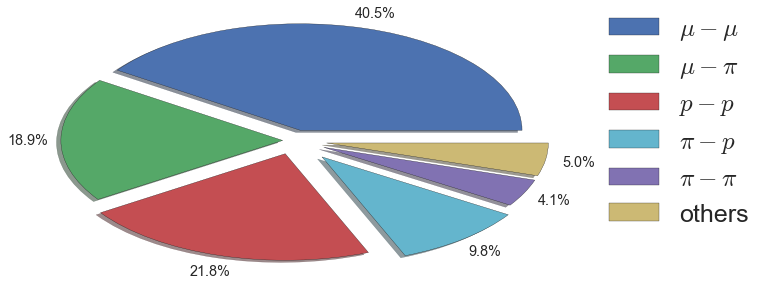

In [35]:
all_other_pairs = samples['other pairs']
other_pairs_labels       = ['$\mu-\mu$','$\mu-\pi$','$p-p$'    ,'$\pi-p$' ,'$\pi-\pi$'] # ,'$\mu-e$','$\mu-\gamma$'
other_pairs_pdg_products = [13*13      , 13*211    , 2212*2212 , 211*2212 , 211*211   ] # , 13*11   , 13*22
explode                  = [0.1        , 0.05      , 0.13      , 0.2      ,0.15       ] # ,0.1      ,0.1

other_pairs = dict()
all_other_pairs_big_contribution = 0
len_other_pairs = []
for key,product in zip(other_pairs_labels,other_pairs_pdg_products):    
    other_pairs[key] = all_other_pairs[np.abs(all_other_pairs['pdg_short']*all_other_pairs['pdg_long']) == product]
    print '%.1f'%(100.*float(len(other_pairs[key]))/len(all_other_pairs)),'% ',key
    all_other_pairs_big_contribution += len(other_pairs[key])
    len_other_pairs.append(len(other_pairs[key]))
len_non_categorized = len(all_other_pairs) - all_other_pairs_big_contribution
frac_non_categorized = 100.0 - 100.*float(all_other_pairs_big_contribution)/len(all_other_pairs)
print 'non categorized %.1f'%frac_non_categorized
other_pairs_labels.append('others')
len_other_pairs.append(len_non_categorized)
explode.append(0.15)

# plot
fig=plt.figure(figsize=figures_size)
patches, texts, autotexts = plt.pie( len_other_pairs, pctdistance=1.15,
                                    explode=explode,autopct='%1.1f%%',shadow=True);
for t in texts: t.set_size('xx-large')
for t in autotexts: t.set_size('x-large')
lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,labels=other_pairs_labels,fontsize=25)
plt.tight_layout()
fig.savefig(figures_path+'pieChartOtherPairs.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')

In [12]:
pureff_df = pd.DataFrame(columns=['cut','$\mu-p$ pur.','$\mu-p$ eff.','CC1p pur.','CC1p eff.'])

# samples_after_cuts = [sample for sample in samples]
reduced_samples = dict()
reduced_samples['no cuts'] = [sample for sample in samples]
# cut 1 
# ------------
# cuts on PIDa
print '------------'
print 'cut 1: PIDa(µ) vs PIDa(p)'
samples_after_cuts,frac,number = [],[],[]
for i,sample,original_sample,label in zip(range(4),reduced_samples['no cuts'],samples,labels):
    reduced = sample
    reduced = reduced[(((reduced['PIDA_assigned_muon']<-2.000000*reduced['PIDA_assigned_proton']+(22.000000))                               
                      &(reduced['PIDA_assigned_muon']<1.142857*reduced['PIDA_assigned_proton'])                     
                      &(reduced['PIDA_assigned_muon']>0))==False)]
    reduced_len = float(len(reduced))
    number.append(reduced_len)
    frac.append(100.0 * reduced_len / len(original_sample))
    print label,"retained %.1f"%frac[-1] + "% "+"in this cut (%d"%int(reduced_len)+")"
    samples_after_cuts.append(reduced)
print 'efficiency:%.1f'%frac[0], ', purity:%.1f'%(100.*float(number[0])/np.sum(number) if np.sum(number) else 0)
print 'mu-p eff.:%.1f'%(100.*float(number[0]+number[1])/(len(samples[0])+len(samples[1]))), ', mu-p pur.:%.1f'%(100.*float(number[0]+number[1])/np.sum(number) if np.sum(number) else 0)
reduced_samples['cut 1'] = samples_after_cuts



# cut 2
# ------------
# lµ vs lp
print '------------'
print 'cut 2: l(µ) vs l(p)'
samples_after_cuts,frac,number = [],[],[]
for i,sample,original_sample,label in zip(range(4),reduced_samples['cut 1'],samples,labels):
    reduced=sample
    reduced=reduced[reduced['l_small_pida']>4]
    reduced=reduced[reduced['l_large_pida']<120]
    reduced=reduced[reduced['l_large_pida']>8]
    reduced_len = float(len(reduced))
    number.append(reduced_len)
    frac.append(100.0 * reduced_len / len(original_sample))
    print label,"retained %.1f"%frac[-1] + "% "+"in this cut (%d"%int(reduced_len)+")"
    samples_after_cuts.append(reduced)
print 'efficiency:%.1f'%frac[0], ', purity:%.1f'%(100.*float(number[0])/np.sum(number) if np.sum(number) else 0)
print 'mu-p eff.:%.1f'%(100.*float(number[0]+number[1])/(len(samples[0])+len(samples[1]))), ', mu-p pur.:%.1f'%(100.*float(number[0]+number[1])/np.sum(number) if np.sum(number) else 0)
reduced_samples['cut 2'] = samples_after_cuts



# cut 3
# ------------
# no-collinearity: cut on angle between tracks
print '------------'
print 'cut 3: no-collinearity'
samples_after_cuts,frac,number = [],[],[]
for i,sample,original_sample,label in zip(range(4),reduced_samples['cut 2'],samples,labels):
    reduced = sample[np.abs(180./np.pi*sample['2_tracks_angle']-90)<60]
    reduced_len = float(len(reduced))
    number.append(reduced_len)
    frac.append(100.0 * reduced_len / len(original_sample))
    print label,"retained %.1f"%frac[-1] + "% "+"in this cut (%d"%int(reduced_len)+")"
    samples_after_cuts.append(reduced)
print 'efficiency:%.1f'%frac[0], ', purity:%.1f'%(100.*float(number[0])/np.sum(number) if np.sum(number) else 0),'%'
print 'mu-p eff.:%.1f'%(100.*float(number[0]+number[1])/(len(samples[0])+len(samples[1]))), ', mu-p pur.:%.1f'%(100.*float(number[0]+number[1])/np.sum(number) if np.sum(number) else 0)
reduced_samples['cut 3'] = samples_after_cuts




# cut 4
# ------------
# Delta-Q
print '------------'
print 'cut 4: dQ_tracks/dQ_tot(u) vs dQ_tracks/dQ_tot(u)'
samples_after_cuts,frac,number = [],[],[]
for i,sample,original_sample,label in zip(range(4),reduced_samples['cut 3'],samples,labels):
    reduced=sample
    reduced=reduced[reduced['ratio_dQassociated_dQtot_ROI_20x40_AroundVertex_v']>-1.000000*reduced['ratio_dQassociated_dQtot_ROI_20x40_AroundVertex_u']+1.500000]
    reduced_len = float(len(reduced))
    number.append(reduced_len)
    frac.append(100.0 * reduced_len / len(original_sample))
    print label,"retained %.1f"%frac[-1] + "% "+"in this cut (%d"%int(reduced_len)+")"
    samples_after_cuts.append(reduced)
print 'efficiency:%.1f'%frac[0], ', purity:%.1f'%(100.*float(number[0])/np.sum(number) if np.sum(number) else 0)
print 'mu-p eff.:%.1f'%(100.*float(number[0]+number[1])/(len(samples[0])+len(samples[1]))), ', mu-p pur.:%.1f'%(100.*float(number[0]+number[1])/np.sum(number) if np.sum(number) else 0)
reduced_samples['cut 4'] = samples_after_cuts



# cut 5
# ------------
# Delta-phi vs. theta_pq
print '------------'
print 'cut 5: |Delta-phi-180|<30'
samples_after_cuts,frac,number = [],[],[]
for i,sample,original_sample,label in zip(range(4),reduced_samples['cut 4'],samples,labels):
    reduced=sample
    reduced=reduced[np.abs(reduced['delta_phi']-180.000)<30]
    reduced_len = float(len(reduced))
    number.append(reduced_len)
    frac.append(100.0 * reduced_len / len(original_sample))
    print label,"retained %.1f"%frac[-1] + "% "+"in this cut (%d"%int(reduced_len)+")"
    samples_after_cuts.append(reduced)
print 'efficiency:%.1f'%frac[0], ', purity:%.1f'%(100.*float(number[0])/np.sum(number) if np.sum(number) else 0)
print 'mu-p eff.:%.1f'%(100.*float(number[0]+number[1])/(len(samples[0])+len(samples[1]))), ', mu-p pur.:%.1f'%(100.*float(number[0]+number[1])/np.sum(number) if np.sum(number) else 0)
reduced_samples['cut 5'] = samples_after_cuts



# cut 5
# ------------
# Delta-phi vs. theta_pq
print '------------'
print 'cut 6: theta_pq<25'
samples_after_cuts,frac,number = [],[],[]
for i,sample,original_sample,label in zip(range(4),reduced_samples['cut 5'],samples,labels):
    reduced=sample
    reduced=reduced[reduced['reco_CC1p_theta_pq_fromE']<25]
    reduced_len = float(len(reduced))
    number.append(reduced_len)
    frac.append(100.0 * reduced_len / len(original_sample))
    print label,"retained %.1f"%frac[-1] + "% "+"in this cut (%d"%int(reduced_len)+")"
    samples_after_cuts.append(reduced)
print 'efficiency:%.1f'%frac[0], ', purity:%.1f'%(100.*float(number[0])/np.sum(number) if np.sum(number) else 0)
print 'mu-p eff.:%.1f'%(100.*float(number[0]+number[1])/(len(samples[0])+len(samples[1]))), ', mu-p pur.:%.1f'%(100.*float(number[0]+number[1])/np.sum(number) if np.sum(number) else 0)
reduced_samples['cut 6'] = samples_after_cuts







# modified cut 5
# ------------
# Delta-phi vs. p_t
print '------------'
print 'modified cut 5: Delta-phi vs. p_t'
samples_after_cuts,frac,number = [],[],[]
for i,sample,original_sample,label in zip(range(4),reduced_samples['cut 4'],samples,labels):
    reduced=sample
    reduced=reduced[np.abs(reduced['delta_phi']-180.000)<30]
    reduced=reduced[reduced['reco_CC1p_Pt']<0.35]
    reduced_len = float(len(reduced))
    number.append(reduced_len)
    frac.append(100.0 * reduced_len / len(original_sample))
    print label,"retained %.1f"%frac[-1] + "% "+"in this cut (%d"%int(reduced_len)+")"
    samples_after_cuts.append(reduced)
print 'efficiency:%.1f'%frac[0], ', purity:%.1f'%(100.*float(number[0])/np.sum(number) if np.sum(number) else 0)
print 'mu-p eff.:%.1f'%(100.*float(number[0]+number[1])/(len(samples[0])+len(samples[1]))), ', mu-p pur.:%.1f'%(100.*float(number[0]+number[1])/np.sum(number) if np.sum(number) else 0)
reduced_samples['modified cut 5'] = samples_after_cuts




# tight Pt cut for good Ev reconstruction
# ------------
# p_t
print '------------'
print 'cut 6: tight Pt cut for good Ev reconstruction'
samples_after_cuts,frac,number = [],[],[]
for i,sample,original_sample,label in zip(range(4),reduced_samples['cut 6'],samples,labels):
    reduced=sample
    reduced=reduced[reduced['reco_CC1p_Pt']<0.15]
    reduced_len = float(len(reduced))
    number.append(reduced_len)
    frac.append(100.0 * reduced_len / len(original_sample))
    print label,"retained %.1f"%frac[-1] + "% "+"in this cut (%d"%int(reduced_len)+")"
    samples_after_cuts.append(reduced)
print 'efficiency:%.1f'%frac[0], ', purity:%.1f'%(100.*float(number[0])/np.sum(number) if np.sum(number) else 0)
print 'mu-p eff.:%.1f'%(100.*float(number[0]+number[1])/(len(samples[0])+len(samples[1]))), ', mu-p pur.:%.1f'%(100.*float(number[0]+number[1])/np.sum(number) if np.sum(number) else 0)
reduced_samples['cut 7'] = samples_after_cuts




# W2 vs. Pt cut for good Ev reconstruction
# ------------
print '------------'
print 'modified cut 6: W2 vs. Pt cut for good Ev reconstruction'
samples_after_cuts,frac,number = [],[],[]
for i,sample,original_sample,label in zip(range(4),reduced_samples['cut 6'],samples,labels):
    reduced=sample
    reduced=reduced[(reduced['reco_CC1p_W2_fromE'] > -18.33 * reduced['reco_CC1p_Pt'] + 3.6 )
                   &(reduced['reco_CC1p_W2_fromE'] < 1.33 * reduced['reco_CC1p_Pt'] + 1.24 )
                   &(reduced['reco_CC1p_W2_fromE'] < -18.33 * reduced['reco_CC1p_Pt'] + 15.4 )
                   &(reduced['reco_CC1p_W2_fromE'] > 1.33 * reduced['reco_CC1p_Pt'] + 0.65 )]
    reduced_len = float(len(reduced))
    number.append(reduced_len)
    frac.append(100.0 * reduced_len / len(original_sample))
    print label,"retained %.1f"%frac[-1] + "% "+"in this cut (%d"%int(reduced_len)+")"
    samples_after_cuts.append(reduced)
print 'efficiency:%.1f'%frac[0], ', purity:%.1f'%(100.*float(number[0])/np.sum(number) if np.sum(number) else 0)
print 'mu-p eff.:%.1f'%(100.*float(number[0]+number[1])/(len(samples[0])+len(samples[1]))), ', mu-p pur.:%.1f'%(100.*float(number[0]+number[1])/np.sum(number) if np.sum(number) else 0)
reduced_samples['modified cut 7'] = samples_after_cuts

------------
cut 1: PIDa(µ) vs PIDa(p)
true CC1p retained 94.7% in this cut (649)
1$\mu$1p non CC1p retained 94.6% in this cut (2419)
non 1$\mu$1p retained 59.1% in this cut (1896)
cosmic data retained 23.0% in this cut (4463)
efficiency:94.7 , purity:6.9
mu-p eff.:94.6 , mu-p pur.:32.5
------------
cut 2: l(µ) vs l(p)
true CC1p retained 77.8% in this cut (533)
1$\mu$1p non CC1p retained 72.1% in this cut (1844)
non 1$\mu$1p retained 43.9% in this cut (1409)
cosmic data retained 14.7% in this cut (2848)
efficiency:77.8 , purity:8.0
mu-p eff.:73.3 , mu-p pur.:35.8
------------
cut 3: no-collinearity
true CC1p retained 74.9% in this cut (513)
1$\mu$1p non CC1p retained 65.7% in this cut (1681)
non 1$\mu$1p retained 26.2% in this cut (840)
cosmic data retained 2.8% in this cut (538)
efficiency:74.9 , purity:14.4 %
mu-p eff.:67.7 , mu-p pur.:61.4
------------
cut 4: dQ_tracks/dQ_tot(u) vs dQ_tracks/dQ_tot(u)
true CC1p retained 67.2% in this cut (460)
1$\mu$1p non CC1p retained 36.9% in thi

In [13]:
def do_graphical_cut(xy_pts,varx='x',vary='y'):
    '''
    input: 
    xy_pts array of points in (x,y) plane
    
    return: 
    lines for the cuts
    to plot them use
    for line in lines: plt.plot(line[0],line[1],'--',color='black',linewidth=1)
    '''
    # create the boundary lines
    lines = []
    for i in range(1,len(xy_pts)):
        x_array,y_array = [xy_pts[i-1][0],xy_pts[i][0]],[xy_pts[i-1][1],xy_pts[i][1]]
        lines.append([x_array,y_array])
        
        #  show the boundary lines
        slope,intercept = find_a_straight_line(x_array,y_array)  
        print 'line ',[xy_pts[i-1][0],xy_pts[i-1][1]],'=>',[xy_pts[i][0],xy_pts[i][1]]
        if varx=='x' and vary=='y':
            print "y = %f*x + %f"%(slope,intercept)
        else:
            print "reduced=reduced[reduced['%s']=%f*reduced['%s']+(%f)]"%(vary,slope,varx,intercept)
    return lines

# Enhance contribtion from true CC1p pairs while suppresing non-CC1p reconstructed pairs as well as cosmic background ?
We should look at all possible features of 2-tracks clusters and try to find 'money' cuts that kill background. Then, we can later on take care of maximizing efficiency and purity 

## detection cuts

### PIDa 

In [18]:
reduced_this_cut,reduced_anti_cut,frac,frac_anti=[],[],[],[]
for i,sample,label,cmap,color in zip(range(4),samples,labels,cmaps,colors):
    # triangle
    reduced = sample
    reduced=reduced[reduced['PIDA_assigned_muon']<-2.000000*reduced['PIDA_assigned_proton']+(22.000000)]
    reduced=reduced[reduced['PIDA_assigned_muon']<1.142857*reduced['PIDA_assigned_proton']+(0.000000)]
    reduced=reduced[reduced['PIDA_assigned_muon']>=0.]

    reduced_anti = sample
    reduced_anti=reduced_anti[((
                               (reduced_anti['PIDA_assigned_muon']<-2.000000*reduced_anti['PIDA_assigned_proton']+(22.000000))
                               &(reduced_anti['PIDA_assigned_muon']<1.142857*reduced_anti['PIDA_assigned_proton']+(0.000000))
                               &(reduced_anti['PIDA_assigned_muon']>0))==False)
                             ]
    # box
#     reduced = sample
#     reduced=reduced[reduced['PIDA_assigned_muon']>1]
#     reduced=reduced[reduced['PIDA_assigned_muon']<20]
#     reduced=reduced[reduced['PIDA_assigned_proton']>8]
#     reduced=reduced[reduced['PIDA_assigned_proton']<100]
#     reduced_anti = sample
#     reduced_anti=reduced_anti[((
#                                (reduced_anti['PIDA_assigned_muon']>1) & (reduced_anti['PIDA_assigned_muon']<20)
#                                &(reduced_anti['PIDA_assigned_proton']>8) &(reduced_anti['PIDA_assigned_proton']<100))==False)
#                              ]


    f = 100.*float(len(reduced))/len(sample)
    reduced_this_cut.append(reduced)
    frac.append(f)
    print len(reduced),'in sample',i,', %.f '%(100.*float(len(reduced))/len(sample)),'%'
    f_anti = 100.*float(len(reduced_anti))/len(sample)
    reduced_anti_cut.append(reduced_anti)
    frac_anti.append(f_anti)
    print len(reduced_anti),'not in sample',i,', %.f '%(100.*float(len(reduced_anti))/len(sample)),'%'
purity = 100.*float(len(reduced_this_cut[0]))/(len(reduced_this_cut[0])+len(reduced_this_cut[1])+len(reduced_this_cut[2])+len(reduced_this_cut[3]))
print 'efficiency: %.1f'%frac[0],'%'
print 'purity: %.1f'%purity,'%'
purity_anti = 100.*float(len(reduced_anti_cut[0]))/(len(reduced_anti_cut[0])+len(reduced_anti_cut[1])+len(reduced_anti_cut[2])+len(reduced_anti_cut[3]))
print 'efficiency anti-cut: %.1f'%frac_anti[0],'%'
print 'purity anti-cut: %.1f'%purity_anti,'%'

37 in sample 0 , 5  %
649 not in sample 0 , 95  %
149 in sample 1 , 6  %
2419 not in sample 1 , 95  %
1324 in sample 2 , 41  %
1896 not in sample 2 , 59  %
15075 in sample 3 , 78  %
4463 not in sample 3 , 23  %
efficiency: 5.4 %
purity: 0.2 %
efficiency anti-cut: 94.7 %
purity anti-cut: 6.9 %


line  [11.0, 0.0] => [7.0, 8.0]
reduced=reduced[reduced['PIDA_assigned_muon']=-2.000000*reduced['PIDA_assigned_proton']+(22.000000)]
line  [7.0, 8.0] => [0.0, 0.0]
reduced=reduced[reduced['PIDA_assigned_muon']=1.142857*reduced['PIDA_assigned_proton']+(0.000000)]
line  [0.0, 0.0] => [11.0, 0.0]
reduced=reduced[reduced['PIDA_assigned_muon']=0.000000*reduced['PIDA_assigned_proton']+(0.000000)]


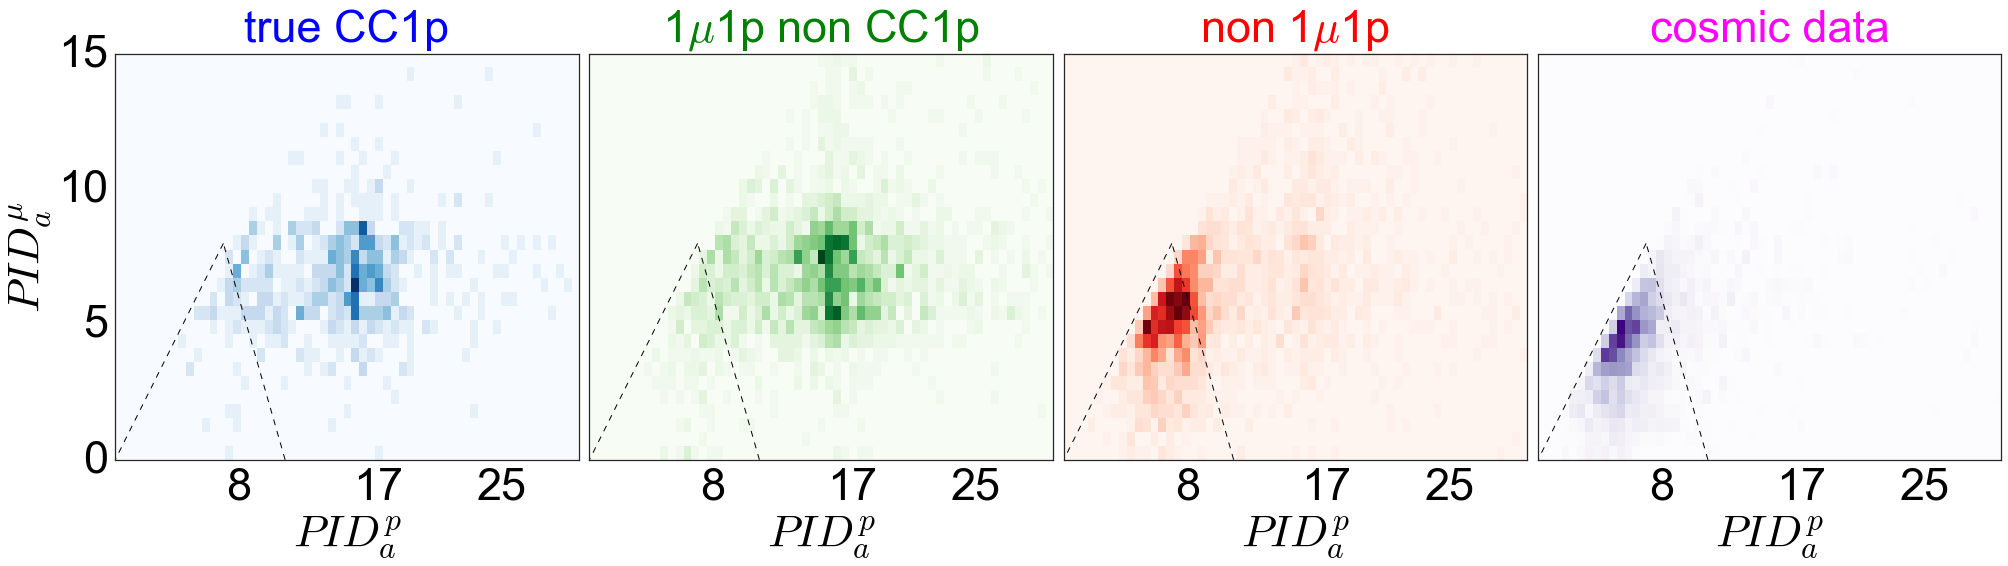

In [19]:
#traingle
lines_graphical_cut = do_graphical_cut(xy_pts = [[11.,0.],
                                                 [7.,8.],
                                                 [0.,0.], 
                                                 [11.,0.],
                                                ],varx='PIDA_assigned_proton',vary='PIDA_assigned_muon')
# box
# lines_graphical_cut = do_graphical_cut(xy_pts = [[8.,2.],
#                                                  [8.,12.],
#                                                  [35.,12.], 
#                                                  [35.,2.], 
#                                                  [8.,2.],
#                                                 ],varx='PIDA_assigned_proton',vary='PIDA_assigned_muon')


fig = plt.figure(figsize=(28,8))
bins=(np.linspace(0,30,60),np.linspace(0,15,30))
x_label,y_label='$PID_{a}^{p}$','$PID_{a}^{\\mu}$'
for i,sample,label,cmap,color in zip(range(4),samples,labels,cmaps,colors):
    ax = fig.add_subplot(1,4,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    plot_2d_hist(sample['PIDA_assigned_proton'], sample['PIDA_assigned_muon'], ax=ax,fontsize=figures_fontsize,ticks_color='white',bins=bins,cmap=cmap,norm='')            

    for i_line,line in enumerate(lines_graphical_cut):
        plt.plot(line[0],line[1],'--',color='black',linewidth=1)
    set_axes(ax,x_label=x_label, y_label=y_label if i==0 else '',ticks_color='black',fontsize=45)
    ax.xaxis.set_ticks([8,17,25])
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f') if i==0 else ticker.NullFormatter())    
plt.tight_layout()
fig.savefig(figures_path+'PIDa_mu_p.pdf')

##### length

558 in sample 0 , 81  %
1933 in sample 1 , 76  %
2171 in sample 2 , 68  %
11963 in sample 3 , 62  %


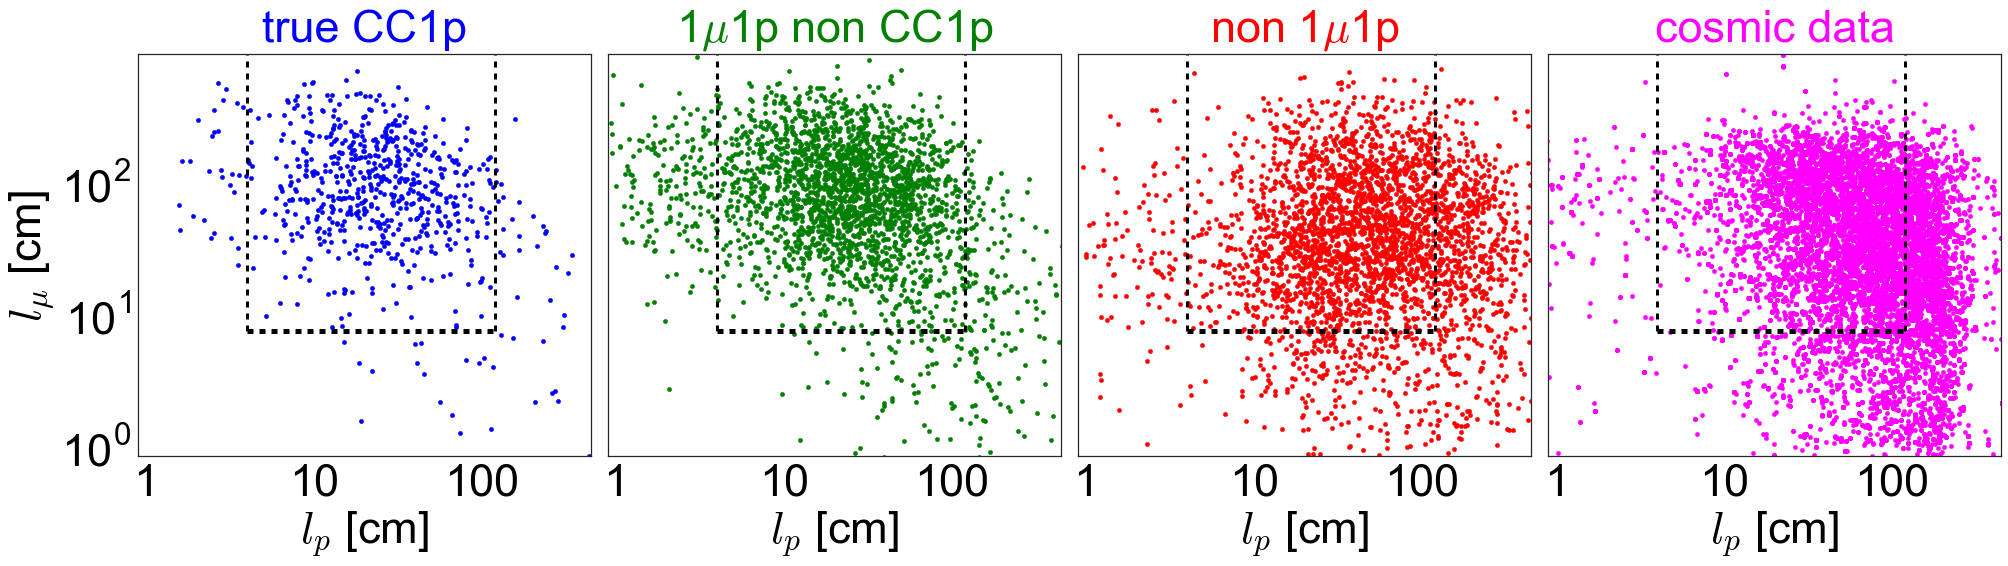

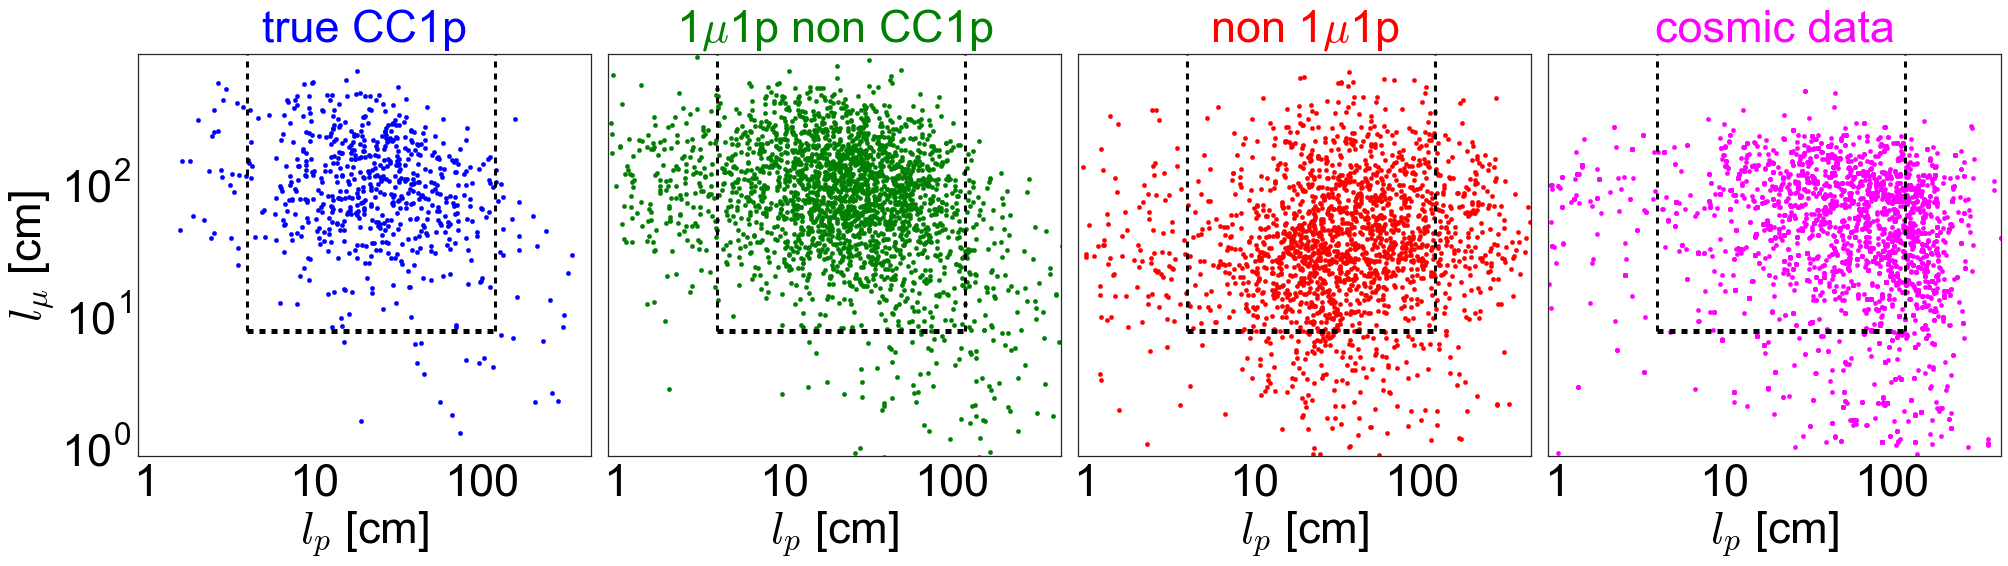

In [20]:
reduced_this_cut,frac=[],[]
fig = plt.figure(figsize=(28,8))
bins=(np.linspace(0,150,50),np.linspace(0,450,50))
x_label,y_label='$l_{p}$ [cm]','$l_{\\mu}$ [cm]'
for i,sample,label,cmap,color in zip(range(4),reduced_samples['no cuts'],labels,cmaps,colors):
    ax = fig.add_subplot(1,4,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    #     plot_2d_hist(sample['l_large_pida'], sample['l_small_pida'], ax=ax,fontsize=figures_fontsize,bins=bins,cmap=cmap,norm='log')        
    ax.scatter(sample['l_large_pida'], sample['l_small_pida'],color=color)
    ax.set_xlim(0.9,450);ax.set_xscale('log')
    ax.set_ylim(0.9,1000);ax.set_yscale('log')
    red = sample
    plt.plot([4.,4.],[8,np.max(ax.get_ylim())],'--',color='black',linewidth=3)
    red=red[red['l_small_pida']>4]
    plt.plot([120.,120.],[8,np.max(ax.get_ylim())],'--',color='black',linewidth=3)
    red=red[red['l_large_pida']<120]
    plt.plot([4,120],[8,8],'--',color='black',linewidth=5)
    red=red[red['l_large_pida']>8]
    f = 100.*float(len(red))/len(sample)
    reduced_this_cut.append(red)
    frac.append(f)
    print len(red),'in sample',i,', %.f '%(100.*float(len(red))/len(sample)),'%'
    set_axes(ax,x_label=x_label, y_label=y_label if i==0 else '',fontsize=45)    
    ax.xaxis.set_ticks([1,10,100])
    ax.yaxis.set_ticks([1,10,100])
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    if i>0:
        ax.yaxis.set_major_formatter(ticker.NullFormatter())    
plt.tight_layout()
fig.savefig(figures_path+'l_mu_p.pdf')

# after cut-1
fig = plt.figure(figsize=(28,8))
for i,sample,label,cmap,color in zip(range(4),reduced_samples['cut 1'],labels,cmaps,colors):
    ax = fig.add_subplot(1,4,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    ax.scatter(sample['l_large_pida'], sample['l_small_pida'],color=color)
    ax.set_xlim(0.9,450);ax.set_xscale('log')
    ax.set_ylim(0.9,1000);ax.set_yscale('log')
    red = sample
    plt.plot([4.,4.],[8,np.max(ax.get_ylim())],'--',color='black',linewidth=3)
    red=red[red['l_small_pida']>4]
    plt.plot([120.,120.],[8,np.max(ax.get_ylim())],'--',color='black',linewidth=3)
    red=red[red['l_large_pida']<120]
    plt.plot([4,120],[8,8],'--',color='black',linewidth=5)
    red=red[red['l_large_pida']>8]
    f = 100.*float(len(red))/len(sample)
    set_axes(ax,x_label=x_label, y_label=y_label if i==0 else '',fontsize=45)    
    ax.xaxis.set_ticks([1,10,100])
    ax.yaxis.set_ticks([1,10,100])
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    if i>0:
        ax.yaxis.set_major_formatter(ticker.NullFormatter())    
plt.tight_layout()
fig.savefig(figures_path+'l_mu_p_after_cut_1.pdf')

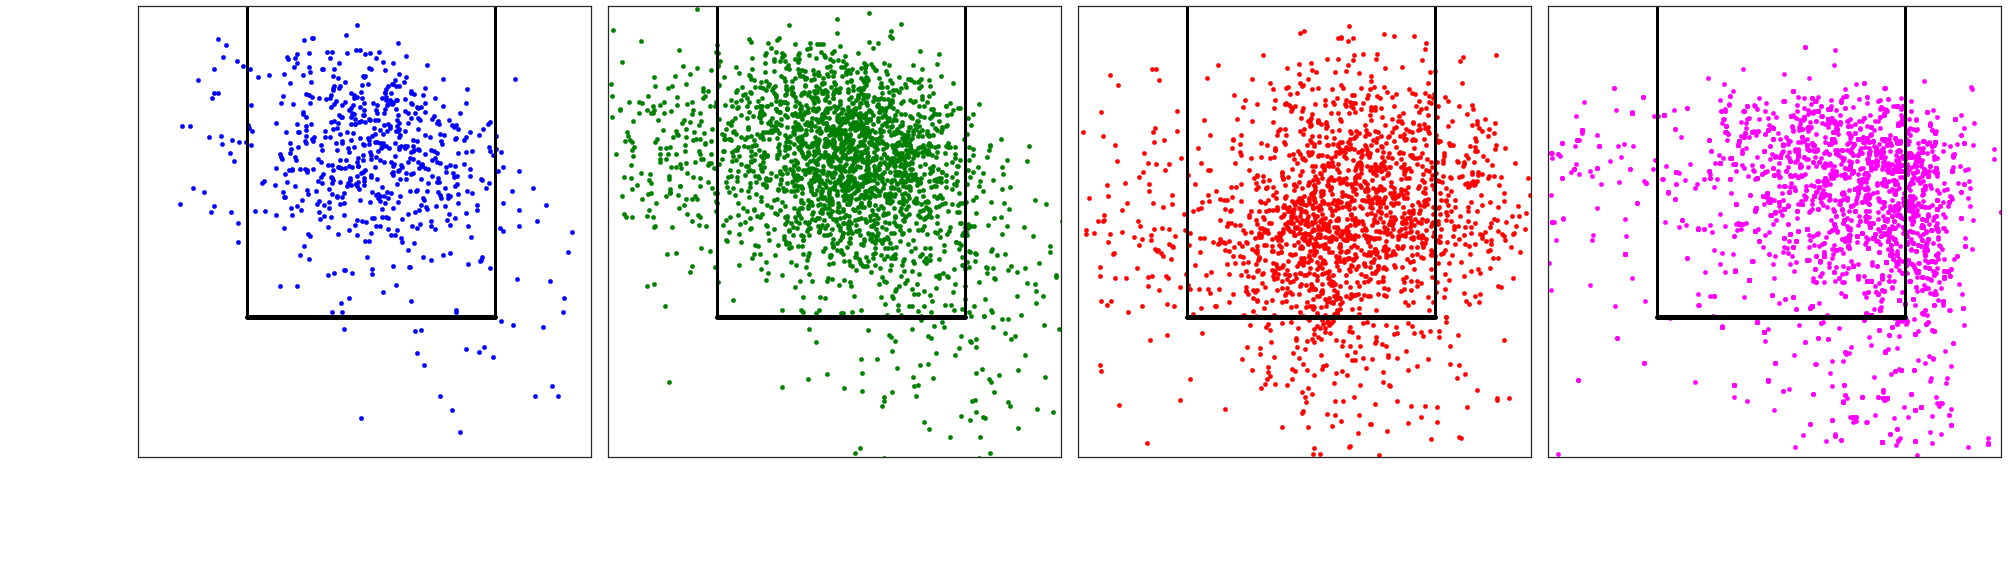

In [23]:
# after cut-1
fig = plt.figure(figsize=(28,8))
for i,sample,label,cmap,color in zip(range(4),reduced_samples['cut 1'],labels,cmaps,colors):
    ax = fig.add_subplot(1,4,i+1)
    ax.scatter(sample['l_large_pida'], sample['l_small_pida'],color=color)
    ax.set_xlim(0.9,450);ax.set_xscale('log')
    ax.set_ylim(0.9,1000);ax.set_yscale('log')
    red = sample
    set_axes(ax,x_label=x_label, y_label=y_label if i==0 else '',fontsize=45,ticks_color='white')    
    ax.xaxis.set_ticks([1,10,100])
    ax.yaxis.set_ticks([1,10,100])
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    plt.plot([4.,4.],[8,np.max(ax.get_ylim())],'-',color='black',linewidth=3)
    plt.plot([120.,120.],[8,np.max(ax.get_ylim())],'-',color='black',linewidth=3)
    plt.plot([4,120],[8,8],'-',color='black',linewidth=5)    
    if i>0:
        ax.yaxis.set_major_formatter(ticker.NullFormatter())    
plt.tight_layout()

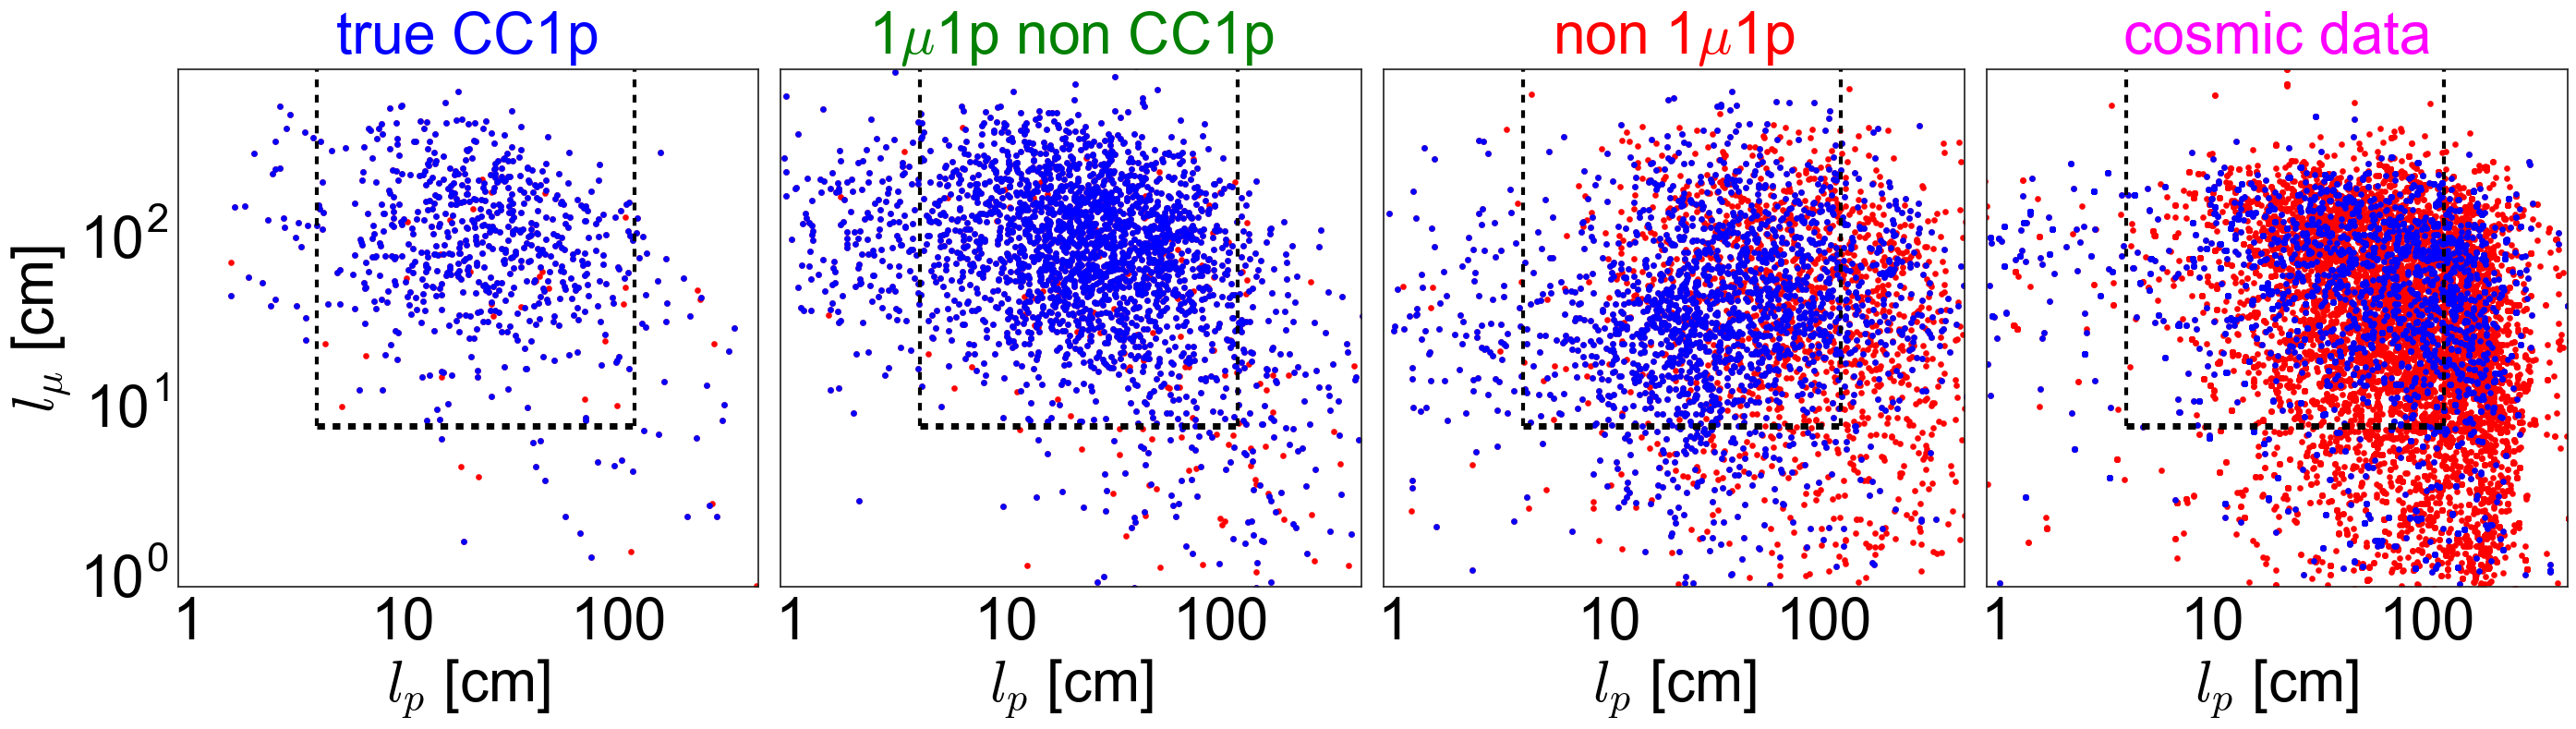

In [48]:
fig = plt.figure(figsize=(28,8))
bins=(np.linspace(0,150,50),np.linspace(0,450,50))
x_label,y_label='$l_{p}$ [cm]','$l_{\\mu}$ [cm]'
for i,label,cmap,color in zip(range(4),labels,cmaps,colors):
    ax = fig.add_subplot(1,4,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)

    for sample,scatter_color in zip([reduced_samples['no cuts'][i],reduced_samples['cut 1'][i]]
                                    ,['red','blue']):
        ax.scatter(sample['l_large_pida'], sample['l_small_pida'],color=scatter_color)
        
    ax.set_xlim(0.9,450);ax.set_xscale('log')
    ax.set_ylim(0.9,1000);ax.set_yscale('log')
    red = sample
    plt.plot([4.,4.],[8,np.max(ax.get_ylim())],'--',color='black',linewidth=3)
    plt.plot([120.,120.],[8,np.max(ax.get_ylim())],'--',color='black',linewidth=3)
    plt.plot([4,120],[8,8],'--',color='black',linewidth=5)
    set_axes(ax,x_label=x_label, y_label=y_label if i==0 else '',fontsize=45)    
    ax.xaxis.set_ticks([1,10,100])
    ax.yaxis.set_ticks([1,10,100])
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    if i>0:
        ax.yaxis.set_major_formatter(ticker.NullFormatter())    
plt.tight_layout()
fig.savefig(figures_path+'l_mu_p_before_after_cut_1.pdf')

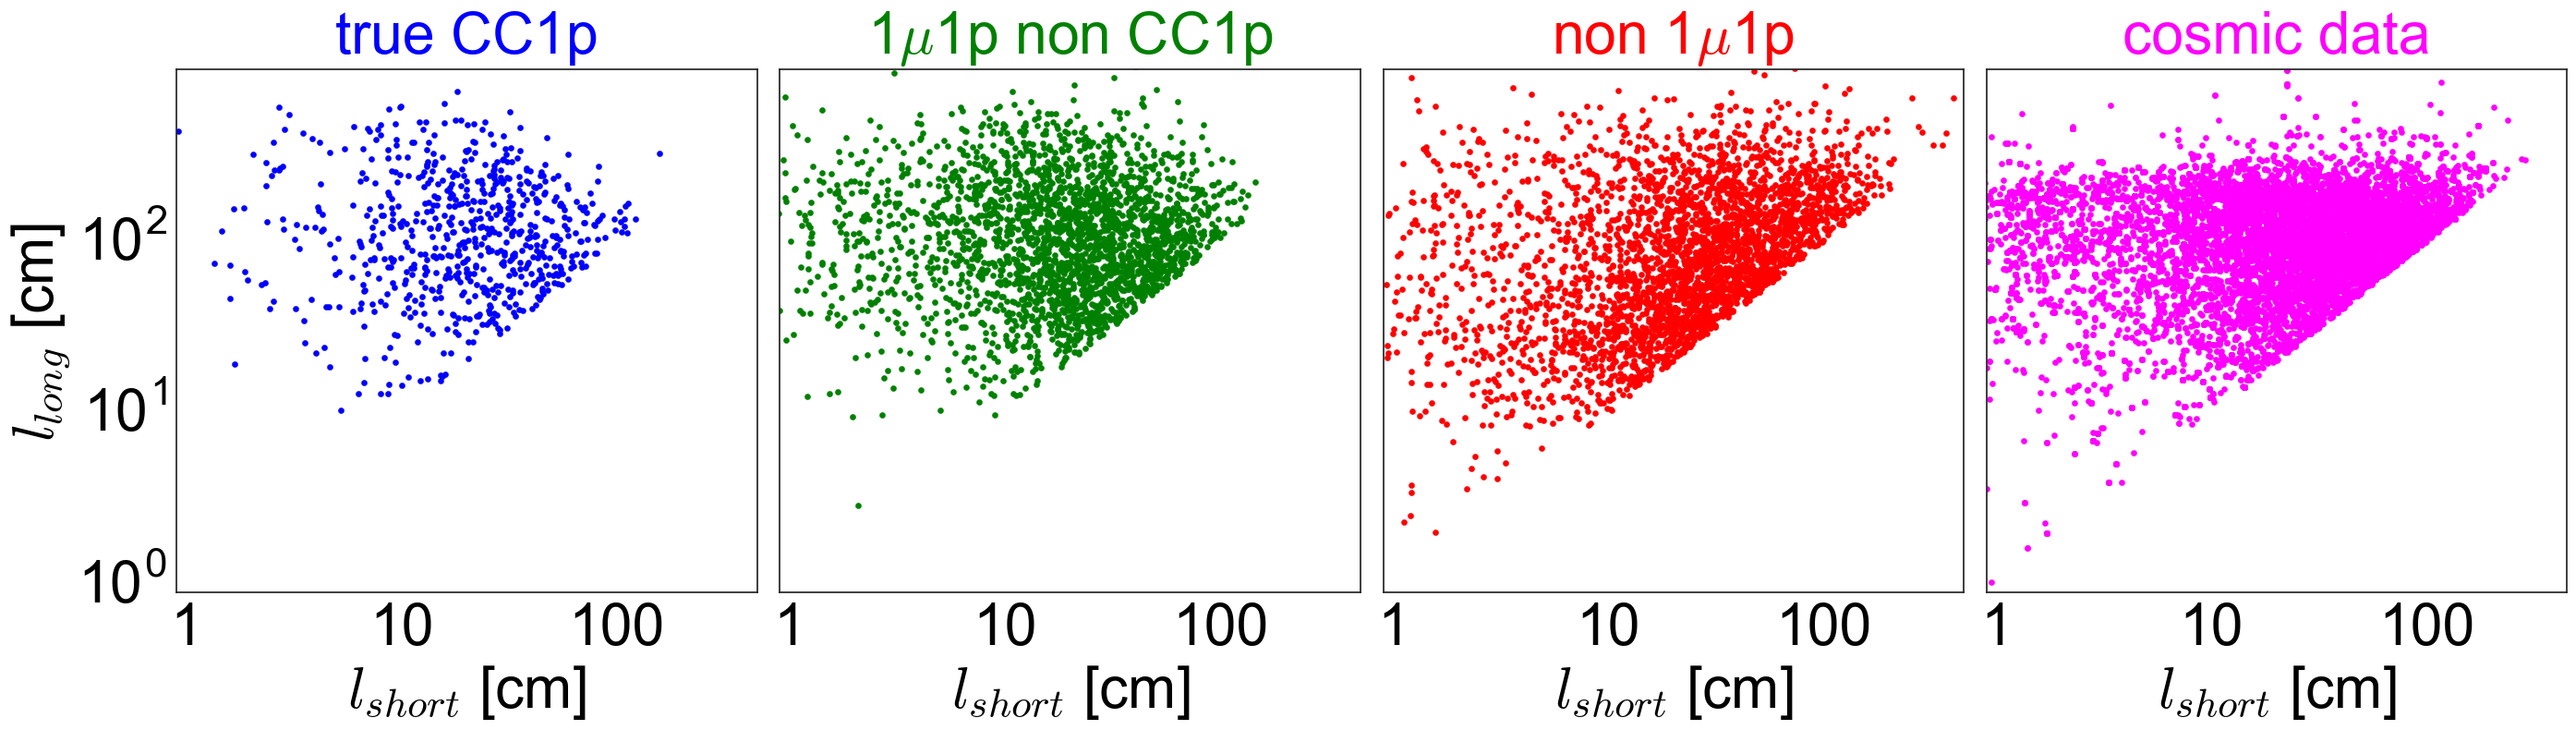

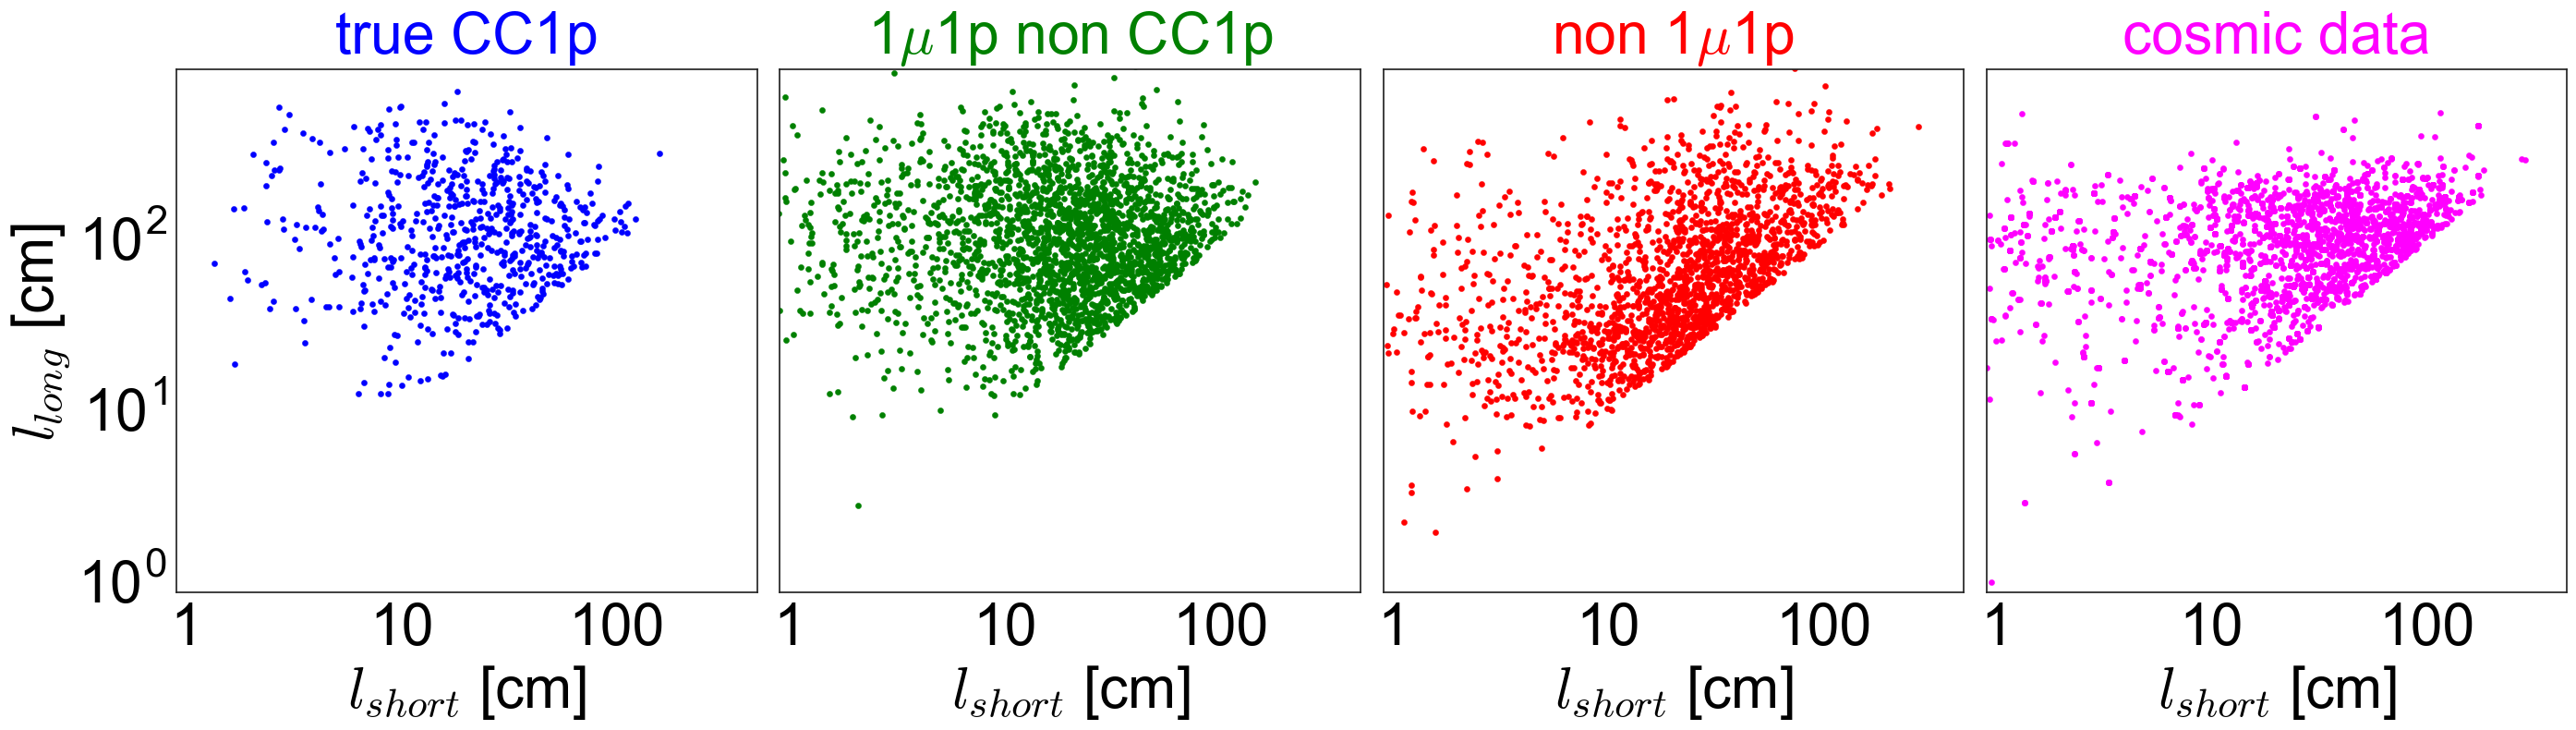

In [34]:
reduced_this_cut,frac=[],[]
fig = plt.figure(figsize=(28,8))
bins=(np.linspace(0,150,50),np.linspace(0,450,50))
x_label,y_label='$l_{short}$ [cm]','$l_{long}$ [cm]'
for i,sample,label,cmap,color in zip(range(4),reduced_samples['no cuts'],labels,cmaps,colors):
    ax = fig.add_subplot(1,4,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    ax.scatter(sample['l_short'], sample['l_long'],color=color)
    ax.set_xlim(0.9,450);ax.set_xscale('log')
    ax.set_ylim(0.9,1000);ax.set_yscale('log')
    red = sample
    set_axes(ax,x_label=x_label, y_label=y_label if i==0 else '',fontsize=45)    
    ax.xaxis.set_ticks([1,10,100])
    ax.yaxis.set_ticks([1,10,100])
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    if i>0:
        ax.yaxis.set_major_formatter(ticker.NullFormatter())    
plt.tight_layout()
fig.savefig(figures_path+'l_long_short.pdf')

reduced_this_cut,frac=[],[]
fig = plt.figure(figsize=(28,8))
bins=(np.linspace(0,150,50),np.linspace(0,450,50))
x_label,y_label='$l_{short}$ [cm]','$l_{long}$ [cm]'
for i,sample,label,cmap,color in zip(range(4),reduced_samples['cut 1'],labels,cmaps,colors):
    ax = fig.add_subplot(1,4,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    ax.scatter(sample['l_short'], sample['l_long'],color=color)
    ax.set_xlim(0.9,450);ax.set_xscale('log')
    ax.set_ylim(0.9,1000);ax.set_yscale('log')
    red = sample
    set_axes(ax,x_label=x_label, y_label=y_label if i==0 else '',fontsize=45)    
    ax.xaxis.set_ticks([1,10,100])
    ax.yaxis.set_ticks([1,10,100])
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    if i>0:
        ax.yaxis.set_major_formatter(ticker.NullFormatter())    
plt.tight_layout()
fig.savefig(figures_path+'l_long_short_after_cut_1.pdf')

### no collinearity

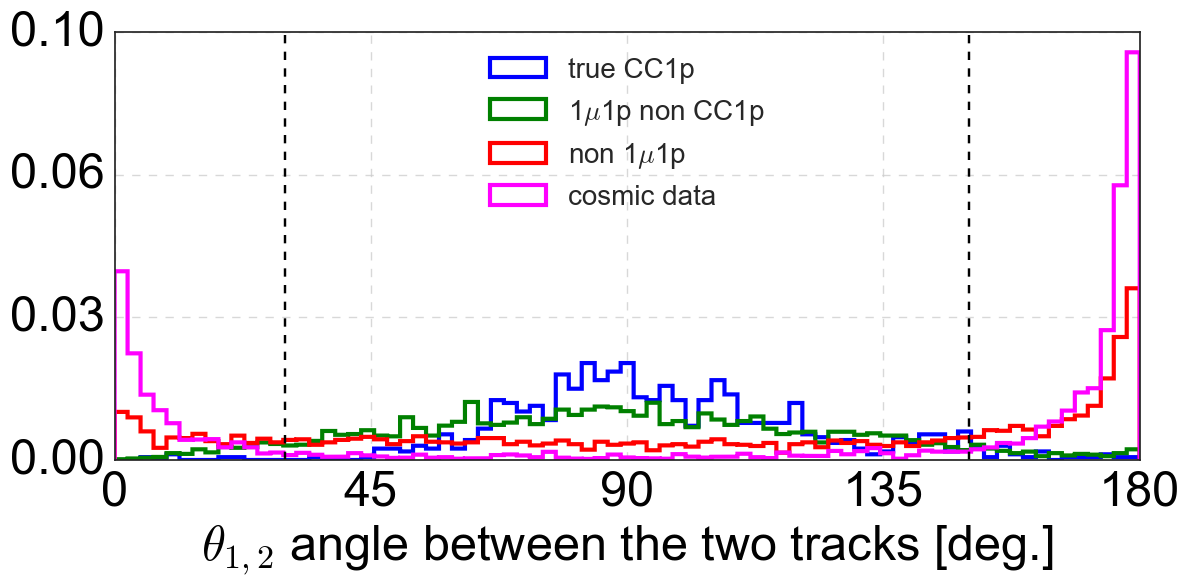

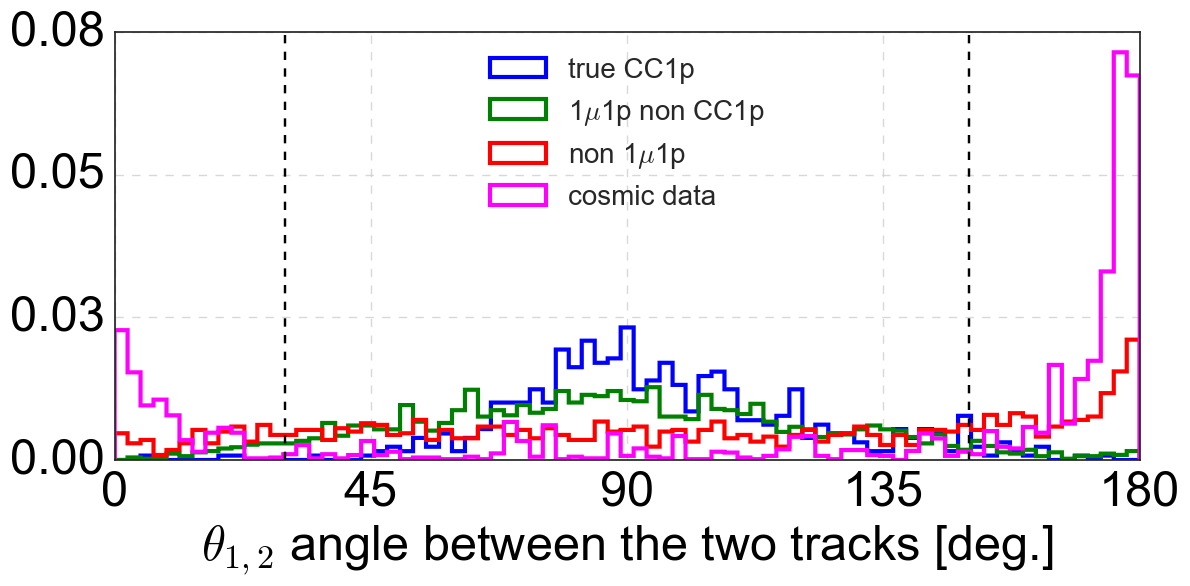

In [60]:
plot_feature_2tracks_clusters(samples=samples,labels=labels,colors=colors,var='2_tracks_angle',x_label='$\\theta_{1,2}$ angle between the two tracks [deg.]'
                              ,mul=180./np.pi,bins=np.linspace(0,180,80),do_add_legend=True
                              ,figsize=(12,6),ticks_color='black',fontsize=35,legend_fontsize=20)
plt.plot([30,30],ax.get_ylim(),'--',color='black')
plt.plot([150,150],ax.get_ylim(),'--',color='black')
plt.savefig(figures_path+'angle_between_tracks.pdf')
# after cut 2
plot_feature_2tracks_clusters(samples=reduced_samples['cut 2'],labels=labels,colors=colors,var='2_tracks_angle',x_label='$\\theta_{1,2}$ angle between the two tracks [deg.]'
                              ,mul=180./np.pi,bins=np.linspace(0,180,80),do_add_legend=True
                              ,figsize=(12,6),ticks_color='black',fontsize=35,legend_fontsize=20)
plt.plot([30,30],ax.get_ylim(),'--',color='black')
plt.plot([150,150],ax.get_ylim(),'--',color='black')
plt.savefig(figures_path+'angle_between_tracks_after_cut_2.pdf')

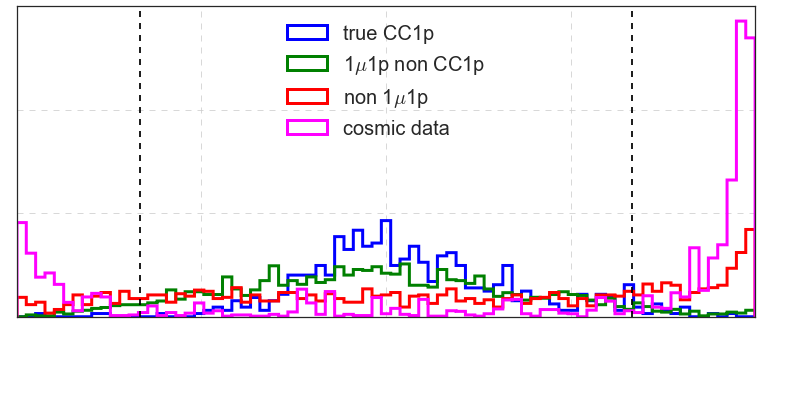

In [30]:
# after cut 2
ax=plot_feature_2tracks_clusters(samples=reduced_samples['cut 2'],labels=labels,colors=colors,var='2_tracks_angle'
                              ,x_label='$\\theta_{1,2}$ [deg.]'
                              ,mul=180./np.pi,bins=np.linspace(0,180,80),do_add_legend=True
                              ,figsize=(12,6),ticks_color='white',fontsize=35,legend_fontsize=20)
ax.yaxis.set_major_formatter(ticker.NullFormatter())
plt.plot([30,30],ax.get_ylim(),'--',color='black')
plt.plot([150,150],ax.get_ylim(),'--',color='black')

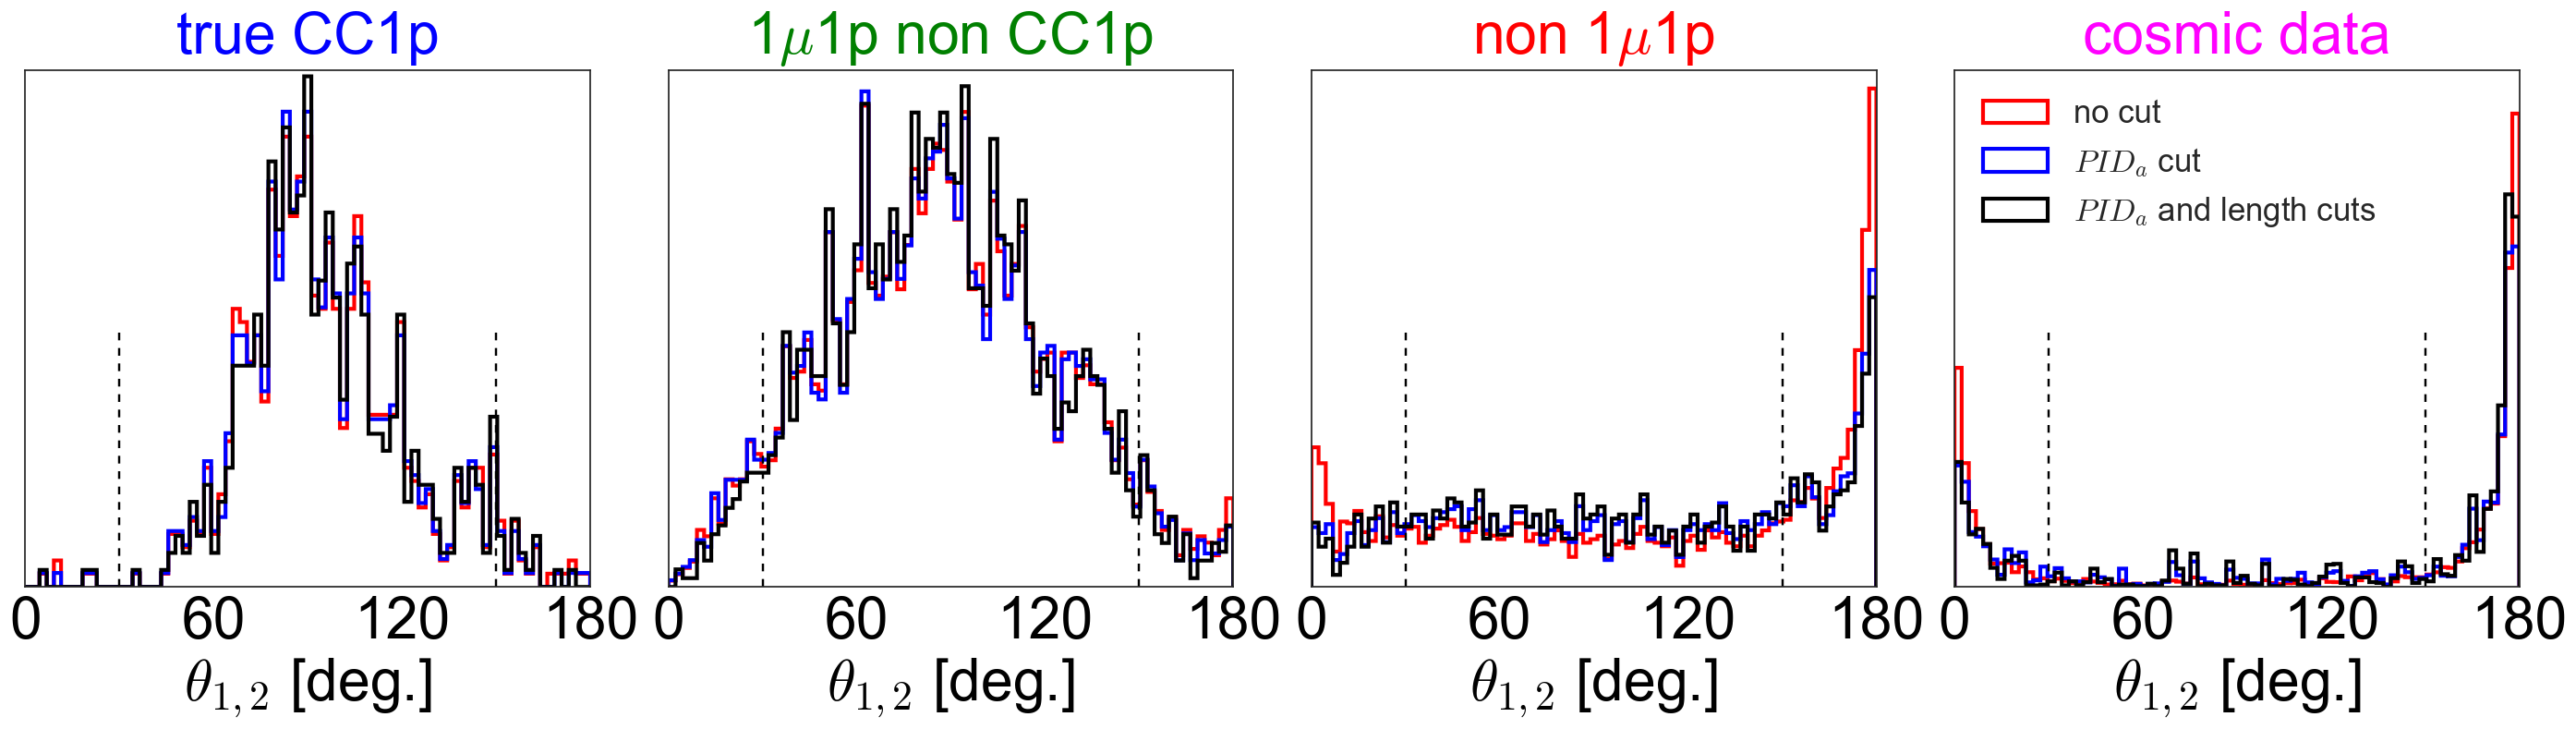

In [70]:
fig = plt.figure(figsize=(28,8))
bins=np.linspace(0,180,80)
x_label='$\\theta_{1,2}$ [deg.]'
for i,label,cmap,color in zip(range(4),labels,cmaps,colors):
    ax = fig.add_subplot(1,4,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)

    for sample,s_color,s_label in zip([reduced_samples['no cuts'][i],reduced_samples['cut 1'][i],reduced_samples['cut 2'][i]]
                                      ,['red','blue','black']
                                      ,['no cut','$PID_a$ cut','$PID_a$ and length cuts']):
        ax.hist(180./np.pi*sample['2_tracks_angle'],bins=bins,color=s_color,histtype='step',linewidth=3,label=s_label,normed=1)
        
    set_axes(ax,x_label=x_label, y_label='',fontsize=45)    
    ax.yaxis.set_major_formatter(ticker.NullFormatter())
    if i==3:
        ax.legend(fontsize=25,loc='upper left')

    ax.plot([30,30],[np.min(ax.get_ylim()),0.5*np.max(ax.get_ylim())],'--',color='black')
    ax.plot([150,150],[np.min(ax.get_ylim()),0.5*np.max(ax.get_ylim())],'--',color='black')


plt.tight_layout()
fig.savefig(figures_path+'angle_between_tracks_before_after_cut_1_2.pdf')

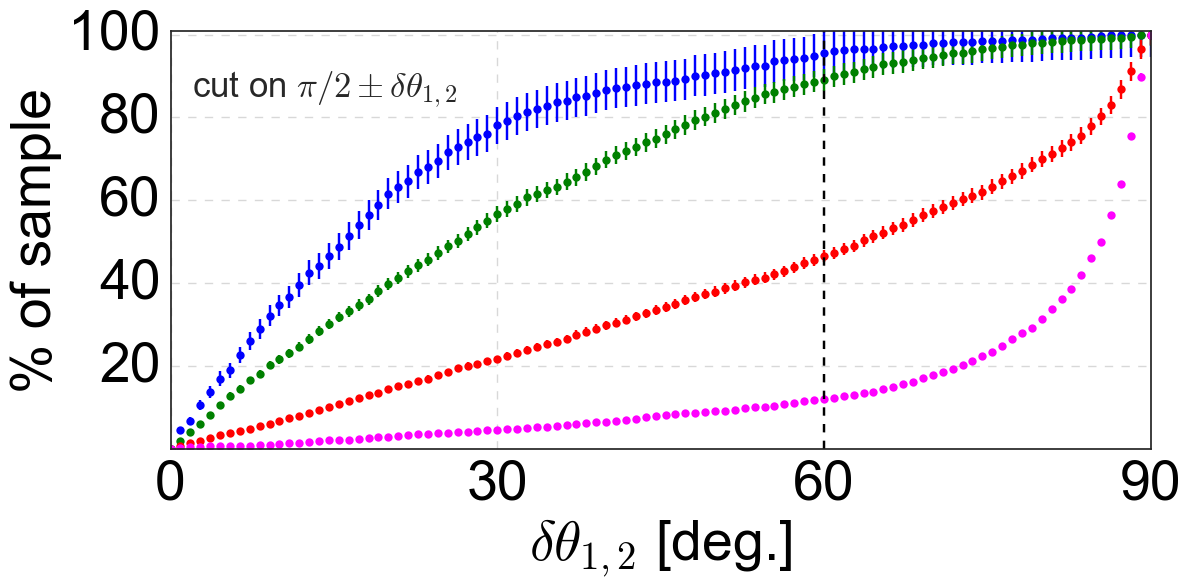

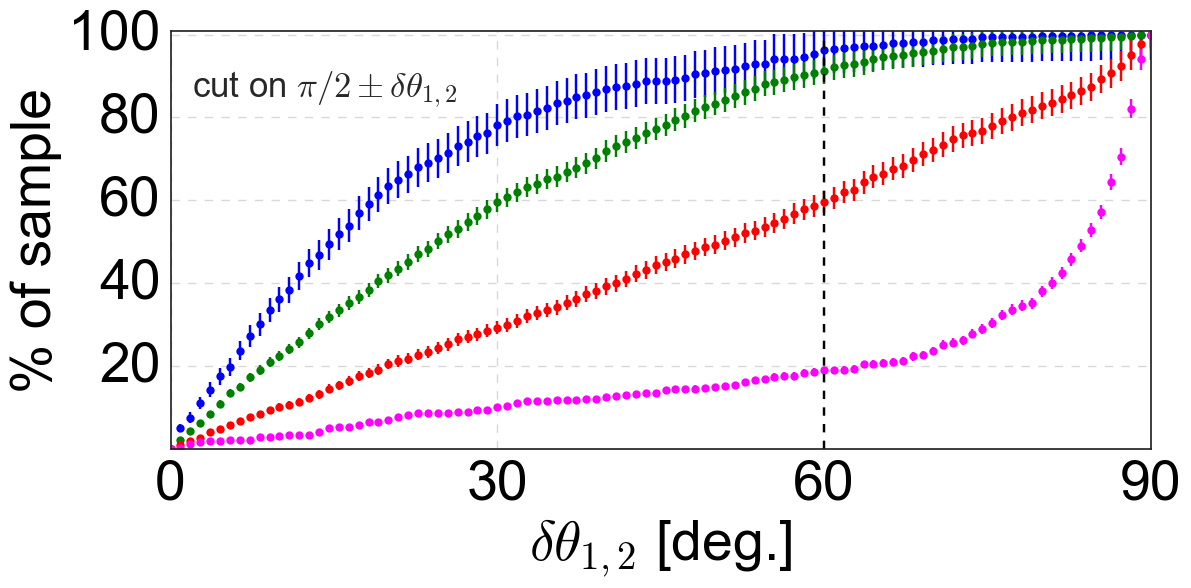

In [79]:
#reduced_samples['cut 3']
ax=plot_cut_samples(samples=reduced_samples['no cuts'],labels=labels,colors=colors,
                     cut_var ='2_tracks_angle',mul=180./np.pi,do_add_legend=False,ticks_color='black',
                     cut_type= 'symmetric',fontsize=40,figsize=(12,6),
                     x_label = '$\\delta \\theta_{1,2}$ [deg.]',
                     xcenter=90,
                     xmin=0., xmax=90 , Nbins=100)
plt.text(2,85,'cut on $\\pi/2 \\pm \\delta \\theta_{1,2}$',fontsize=25)
plt.plot([60,60],ax.get_ylim(),'--',color='black')
plt.savefig(figures_path+'angle_between_tracks_cuts.pdf')

# after cut 2
ax=plot_cut_samples(samples=reduced_samples['cut 2'],labels=labels,colors=colors,
                     cut_var ='2_tracks_angle',mul=180./np.pi,do_add_legend=False,ticks_color='black',
                     cut_type= 'symmetric',fontsize=40,figsize=(12,6),
                     x_label = '$\\delta \\theta_{1,2}$ [deg.]',
                     xcenter=90,
                     xmin=0., xmax=90 , Nbins=100)
plt.text(2,85,'cut on $\\pi/2 \\pm \\delta \\theta_{1,2}$',fontsize=25)
plt.plot([60,60],ax.get_ylim(),'--',color='black')
plt.savefig(figures_path+'angle_between_tracks_cuts_after_cut_2.pdf')

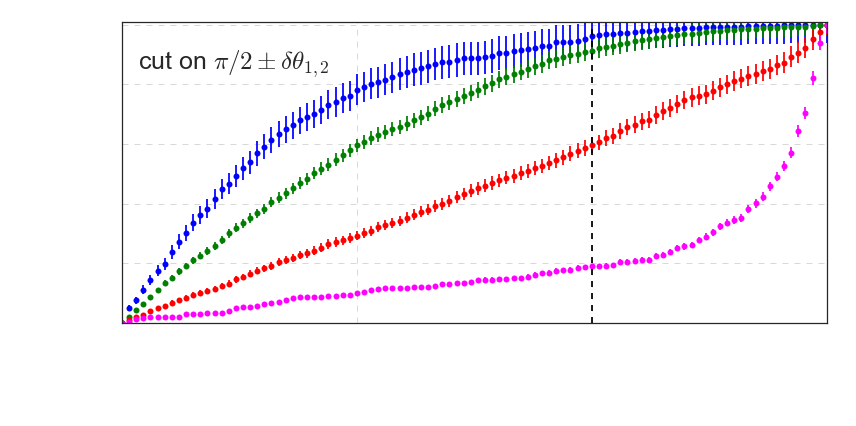

In [25]:
# after cut 2
ax=plot_cut_samples(samples=reduced_samples['cut 2'],labels=labels,colors=colors,
                     cut_var ='2_tracks_angle',mul=180./np.pi,do_add_legend=False,ticks_color='white',
                     cut_type= 'symmetric',fontsize=40,figsize=(12,6),
                     x_label = '$ \\pi/2 \\pm \\delta \\theta_{1,2}$ [deg.]',
                     xcenter=90,
                     xmin=0., xmax=90 , Nbins=100)
plt.text(2,85,'cut on $\\pi/2 \\pm \\delta \\theta_{1,2}$',fontsize=25)
plt.plot([60,60],ax.get_ylim(),'--',color='black')

reduced=reduced[reduced['ratio_dQassociated_dQtot_ROI_20x40_AroundVertex_v']>-1.000000*reduced['ratio_dQassociated_dQtot_ROI_20x40_AroundVertex_u']+1.500000]
602 in sample 0 , 88  %
1318 in sample 1 , 52  %
1687 in sample 2 , 53  %
8563 in sample 3 , 44  %


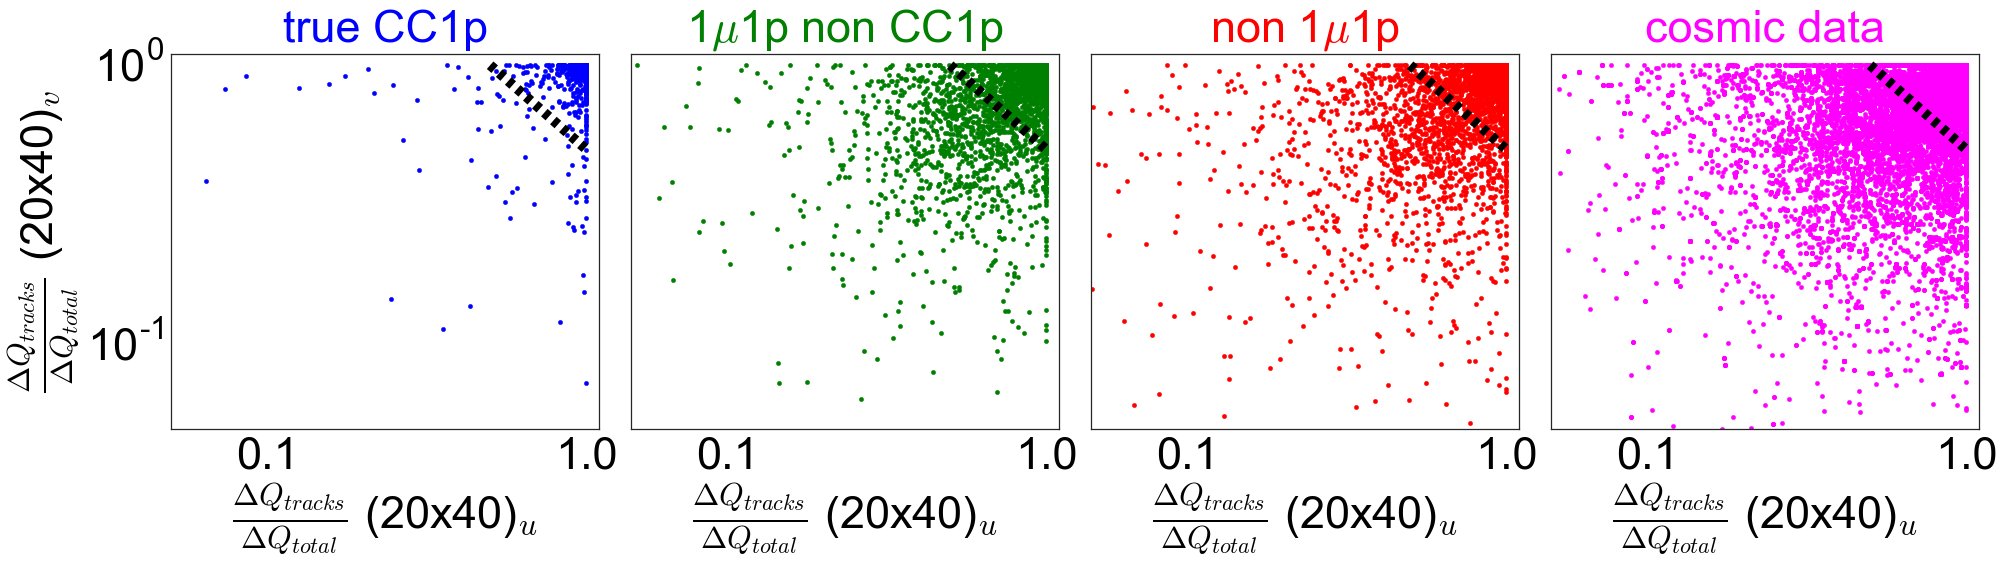

In [31]:
reduced_this_cut,frac=[],[]
x_label='$ \\frac{\\Delta Q_{tracks}}{\\Delta Q_{total}}$ (20x40)$_u$'
y_label='$ \\frac{\\Delta Q_{tracks}}{\\Delta Q_{total}}$ (20x40)$_v$'
varx , vary = 'ratio_dQassociated_dQtot_ROI_20x40_AroundVertex_u','ratio_dQassociated_dQtot_ROI_20x40_AroundVertex_v'
fig = plt.figure(figsize=(28,8))
for i,sample,label,cmap,color,original_sample in zip(range(len(samples)),reduced_samples['no cuts'],labels,cmaps,colors,samples):
    ax = fig.add_subplot(1,4,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    ax.scatter(sample[varx], sample[vary],color=color)
    set_axes(ax,x_label=x_label, y_label=y_label if i==0 else '',ticks_color='black',fontsize=45)    
    ax.set_xlim(0.05,1.1);ax.set_xscale('log')
    ax.set_ylim(0.05,1.1);ax.set_yscale('log')
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
    x_array,y_array=[0.5,1.],[1.,0.5]
    slope,intercept = find_a_straight_line(x_array,y_array)
    plt.plot(x_array,y_array,'--',color='black',linewidth=10)
    if i>0: ax.yaxis.set_major_formatter(ticker.NullFormatter())    
    if i==0: print "reduced=reduced[reduced['%s']>%f*reduced['%s']+%f]"%(vary,slope,varx,intercept)
    red = sample
    red=red[red[vary]>slope*red[varx]+intercept]
    f = 100.*float(len(red))/len(sample)
    reduced_this_cut.append(red)
    frac.append(f)
    print len(red),'in sample',i,', %.f '%(100.*float(len(red))/len(sample)),'%'
plt.tight_layout()
fig.savefig(figures_path+'ratio_dQassociated_dQtot_ROI_20x40_AroundVertex_uv.pdf')

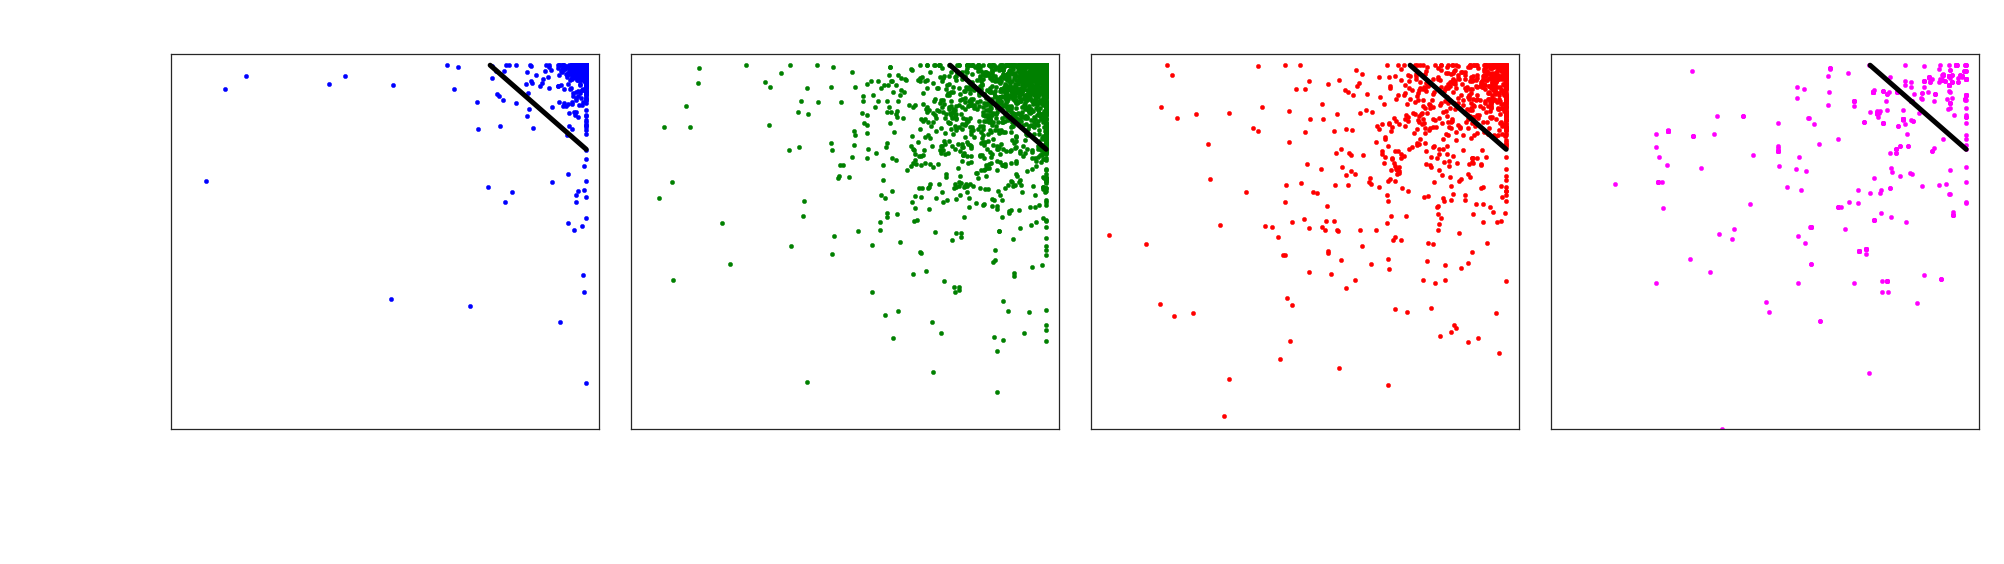

In [36]:
reduced_this_cut,frac=[],[]
x_label='$ \\frac{\\Delta Q_{tracks}}{\\Delta Q_{total}}$ (20x40)$_u$'
y_label='$ \\frac{\\Delta Q_{tracks}}{\\Delta Q_{total}}$ (20x40)$_v$'
varx , vary = 'ratio_dQassociated_dQtot_ROI_20x40_AroundVertex_u','ratio_dQassociated_dQtot_ROI_20x40_AroundVertex_v'
fig = plt.figure(figsize=(28,8))
for i,sample,label,cmap,color,original_sample in zip(range(len(samples)),reduced_samples['cut 3'],labels,cmaps,colors,samples):
    ax = fig.add_subplot(1,4,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color='white')
    ax.scatter(sample[varx], sample[vary],color=color)
    set_axes(ax,x_label=x_label, y_label=y_label if i==0 else '',ticks_color='white',fontsize=45)    
    ax.set_xlim(0.05,1.1);ax.set_xscale('log')
    ax.set_ylim(0.05,1.1);ax.set_yscale('log')
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
    x_array,y_array=[0.5,1.],[1.,0.5]
    slope,intercept = find_a_straight_line(x_array,y_array)
    plt.plot(x_array,y_array,'-',color='black',linewidth=5)
    if i>0: ax.yaxis.set_major_formatter(ticker.NullFormatter())    
plt.tight_layout()

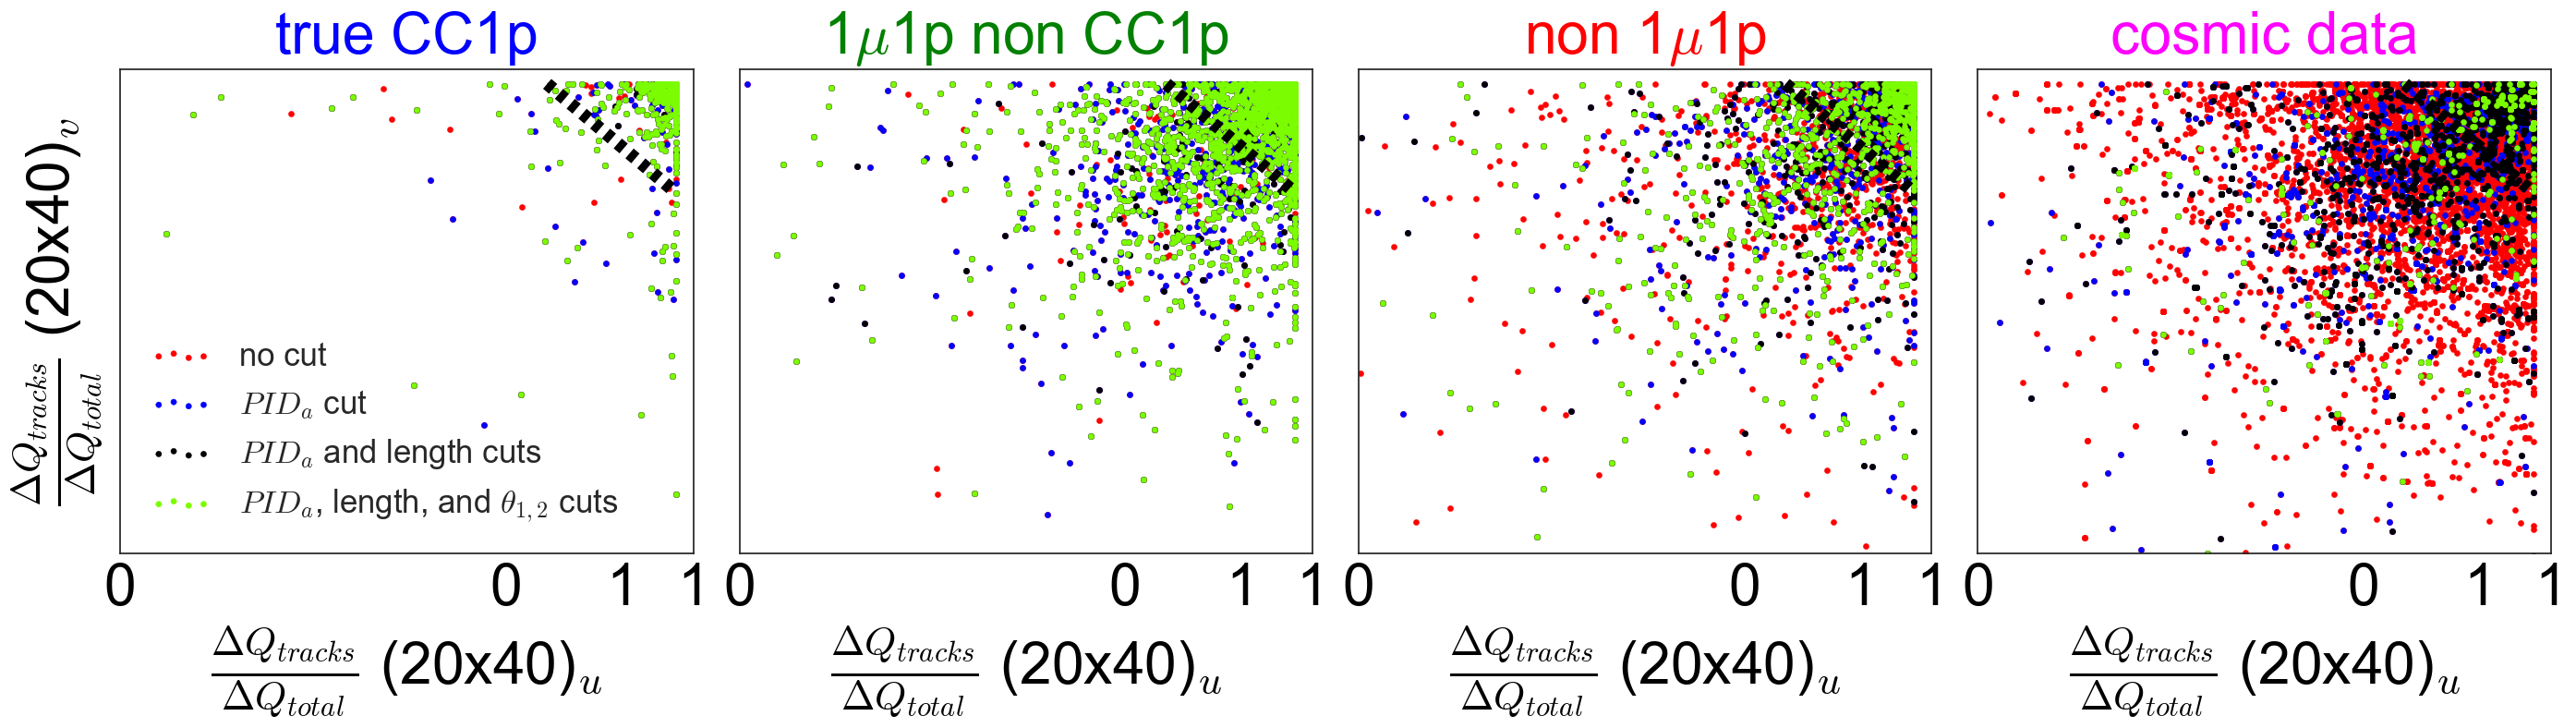

In [92]:
fig = plt.figure(figsize=(28,8))
x_label='$ \\frac{\\Delta Q_{tracks}}{\\Delta Q_{total}}$ (20x40)$_u$'
y_label='$ \\frac{\\Delta Q_{tracks}}{\\Delta Q_{total}}$ (20x40)$_v$'
varx , vary = 'ratio_dQassociated_dQtot_ROI_20x40_AroundVertex_u','ratio_dQassociated_dQtot_ROI_20x40_AroundVertex_v'

for i,label,cmap,color in zip(range(4),labels,cmaps,colors):
    ax = fig.add_subplot(1,4,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)

    for sample,s_color,s_label in zip([reduced_samples['no cuts'][i],reduced_samples['cut 1'][i],reduced_samples['cut 2'][i],reduced_samples['cut 3'][i]]
                              ,['red','blue','black','lawngreen']
                              ,['no cut','$PID_a$ cut','$PID_a$ and length cuts','$PID_a$, length, and $\\theta_{1,2}$ cuts']):
        ax.scatter(sample[varx], sample[vary],color=s_color,label=s_label)

    ax.set_xlim(0.05,1.1);ax.set_xscale('log')
    ax.set_ylim(0.05,1.1);ax.set_yscale('log')
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
    set_axes(ax,x_label=x_label, y_label=y_label if i==0 else '',fontsize=45)    
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    
    plt.plot(x_array,y_array,'--',color='black',linewidth=10)
    
    if i>0:
        ax.yaxis.set_major_formatter(ticker.NullFormatter())    
    else:
        ax.legend(fontsize=25,loc='lower left',scatterpoints=4)
plt.tight_layout()
fig.savefig(figures_path+'ratio_dQassociated_dQtot_ROI_20x40_AroundVertex_uv_before_after_cuts_123.pdf')

## theta_pq and \Delta \phi

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexin

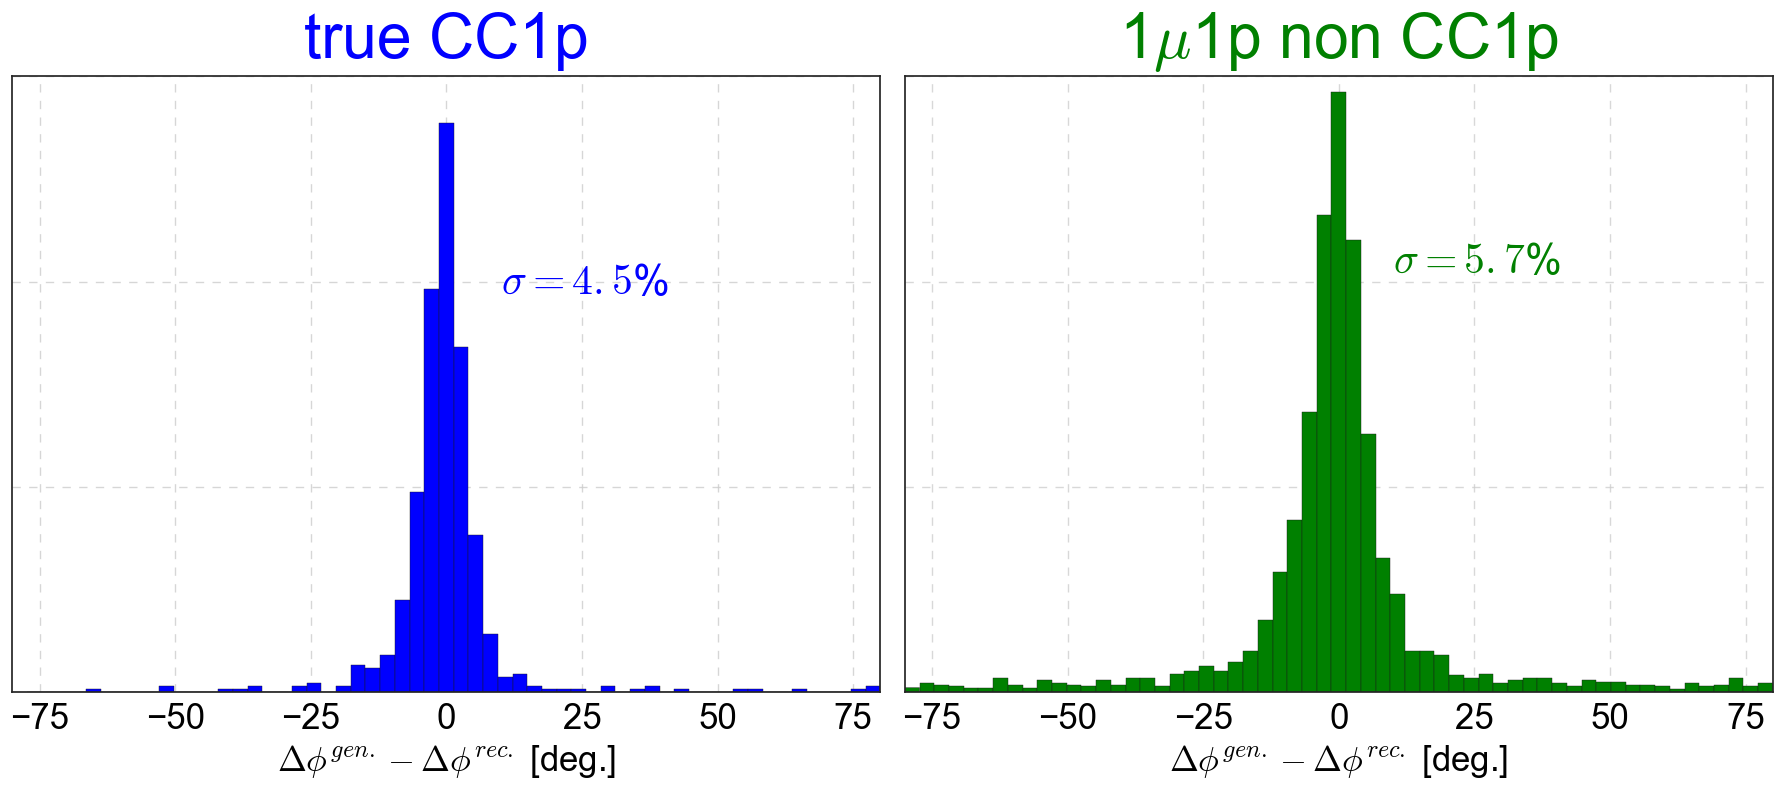

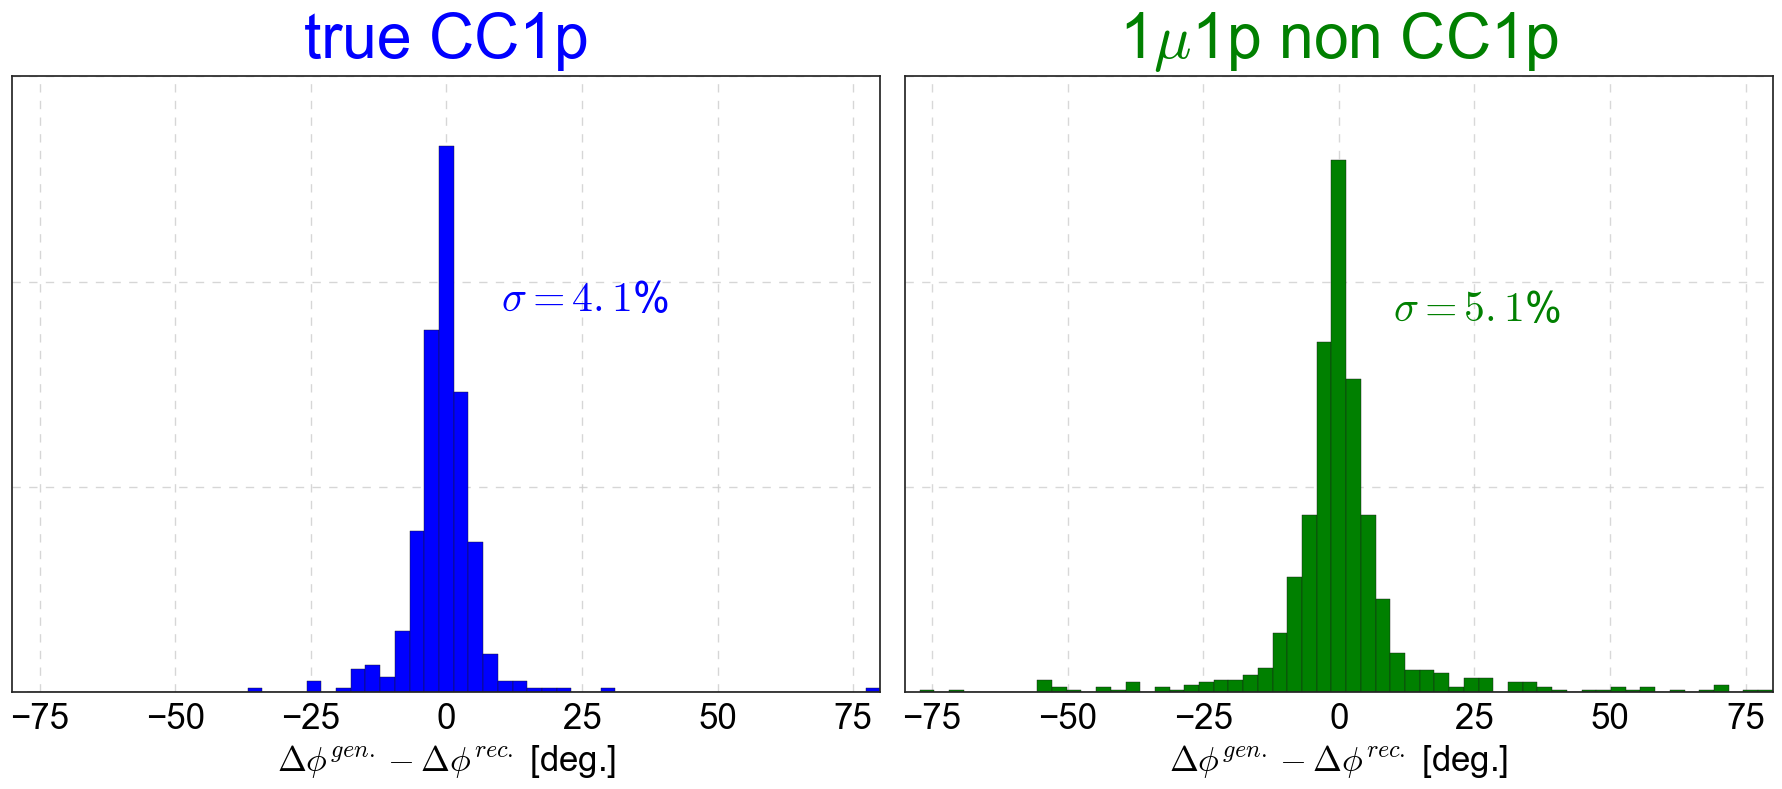

In [35]:
fig=plt.figure(figsize=(18,8))
for i,sample,label,cmap,color in zip(range(2),reduced_samples['no cuts'],labels,cmaps,colors):
    sample['truth_phi_mu'] = np.arctan2( sample['truth_Pmu_y'] , sample['truth_Pmu_x'] )
    sample['truth_phi_p'] = np.arctan2( sample['truth_Pp_y'] , sample['truth_Pp_x'] )
    sample['truth_delta_phi'] = 180/np.pi * np.abs( sample['truth_phi_mu'] - sample['truth_phi_p'])
    ax = fig.add_subplot(1,2,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    h,bins,_=ax.hist(sample['truth_delta_phi']-sample['delta_phi'],bins=np.linspace(-80,80,60),color=color);
    ax.yaxis.set_major_formatter(ticker.NullFormatter())    
    set_axes(ax,'$\\Delta \\phi^{gen.}-\\Delta \\phi^{rec.}$ [deg.]' , '', fontsize=25,do_add_grid=True
             ,xticks=[-75,-50,-25,0,25,50,75])
    small_sample = sample[np.abs(sample['truth_delta_phi']-sample['delta_phi'])<15]
    sigma = np.std(small_sample['truth_delta_phi']-small_sample['delta_phi'])
    plt.text(10,0.7*np.max(h),'$\\sigma=%.1f$'%sigma+'%',color=color,fontsize=30)
ax.grid(linestyle='--',alpha=0.75)
plt.tight_layout()
fig.savefig(figures_path+'delta_phi_gen_reco.pdf')

fig=plt.figure(figsize=(18,8))
for i,sample,label,cmap,color in zip(range(2),reduced_samples['cut 4'],labels,cmaps,colors):
    sample['truth_phi_mu'] = np.arctan2( sample['truth_Pmu_y'] , sample['truth_Pmu_x'] )
    sample['truth_phi_p'] = np.arctan2( sample['truth_Pp_y'] , sample['truth_Pp_x'] )
    sample['truth_delta_phi'] = 180/np.pi * np.abs( sample['truth_phi_mu'] - sample['truth_phi_p'])

    ax = fig.add_subplot(1,2,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    h,bins,_=ax.hist(sample['truth_delta_phi']-sample['delta_phi'],bins=np.linspace(-80,80,60),color=color);
    ax.yaxis.set_major_formatter(ticker.NullFormatter())    
    set_axes(ax,'$\\Delta \\phi^{gen.}-\\Delta \\phi^{rec.}$ [deg.]' , '', fontsize=25,do_add_grid=True
             ,xticks=[-75,-50,-25,0,25,50,75])
    small_sample = sample[np.abs(sample['truth_delta_phi']-sample['delta_phi'])<15]
    sigma = np.std(small_sample['truth_delta_phi']-small_sample['delta_phi'])
    plt.text(10,0.7*np.max(h),'$\\sigma=%.1f$'%sigma+'%',color=color,fontsize=30)
ax.grid(linestyle='--',alpha=0.75)
plt.tight_layout()
fig.savefig(figures_path+'delta_phi_gen_reco_after_cut_4.pdf')

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexin

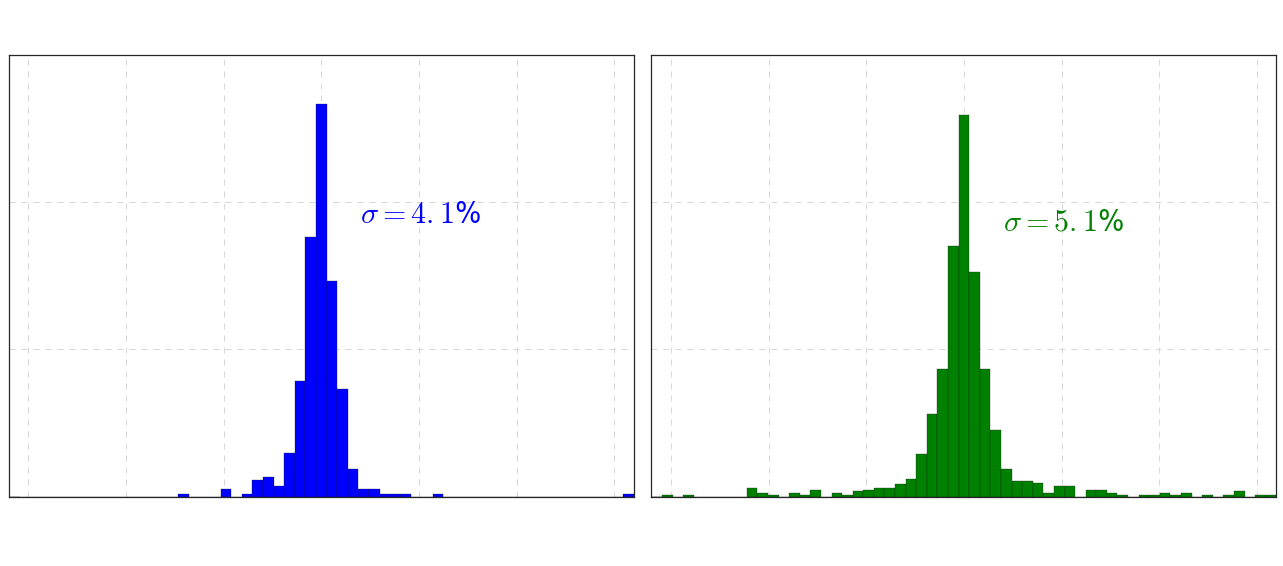

In [38]:
fig=plt.figure(figsize=(18,8))
for i,sample,label,cmap,color in zip(range(2),reduced_samples['cut 4'],labels,cmaps,colors):
    sample['truth_phi_mu'] = np.arctan2( sample['truth_Pmu_y'] , sample['truth_Pmu_x'] )
    sample['truth_phi_p'] = np.arctan2( sample['truth_Pp_y'] , sample['truth_Pp_x'] )
    sample['truth_delta_phi'] = 180/np.pi * np.abs( sample['truth_phi_mu'] - sample['truth_phi_p'])
    ax = fig.add_subplot(1,2,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color='white')
    h,bins,_=ax.hist(sample['truth_delta_phi']-sample['delta_phi'],bins=np.linspace(-80,80,60),color=color);
    ax.yaxis.set_major_formatter(ticker.NullFormatter())    
    set_axes(ax,'$\\Delta \\phi^{gen.}-\\Delta \\phi^{rec.}$ [deg.]' , '', fontsize=25,do_add_grid=True
             ,ticks_color='white'
             ,xticks=[-75,-50,-25,0,25,50,75])
    small_sample = sample[np.abs(sample['truth_delta_phi']-sample['delta_phi'])<15]
    sigma = np.std(small_sample['truth_delta_phi']-small_sample['delta_phi'])
    plt.text(10,0.7*np.max(h),'$\\sigma=%.1f$'%sigma+'%',color=color,fontsize=30)
ax.grid(linestyle='--',alpha=0.75)
plt.tight_layout()

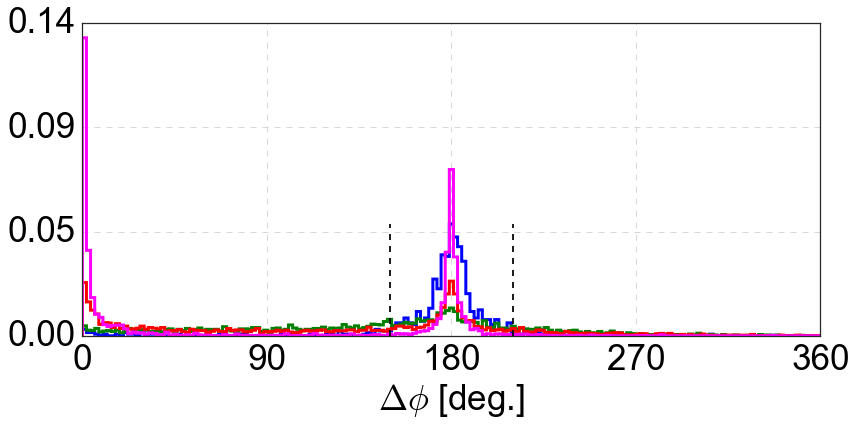

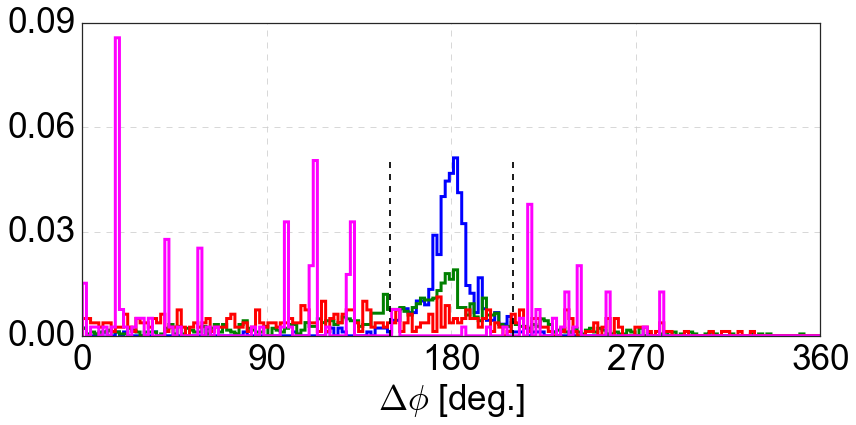

In [24]:
plot_feature_2tracks_clusters(samples=reduced_samples['no cuts'],labels=labels,colors=colors,var='delta_phi',x_label='$\\Delta \\phi$ [deg.]'
                              ,bins=np.linspace(0,360,180),figsize=(12,6),ticks_color='black',fontsize=35,legend_fontsize=20)
plt.plot([150,150],[0,0.05],'--',color='black')
plt.plot([210,210],[0,0.05],'--',color='black')
plt.savefig(figures_path+'DeltaPhi.pdf')


# after cut 4
plot_feature_2tracks_clusters(samples=reduced_samples['cut 4'],labels=labels,colors=colors,var='delta_phi',x_label='$\\Delta \\phi$ [deg.]'
                              ,bins=np.linspace(0,360,180),figsize=(12,6),ticks_color='black',fontsize=35,legend_fontsize=20)
plt.plot([150,150],[0,0.05],'--',color='black')
plt.plot([210,210],[0,0.05],'--',color='black')
plt.savefig(figures_path+'DeltaPhi_after_cut_4.pdf')

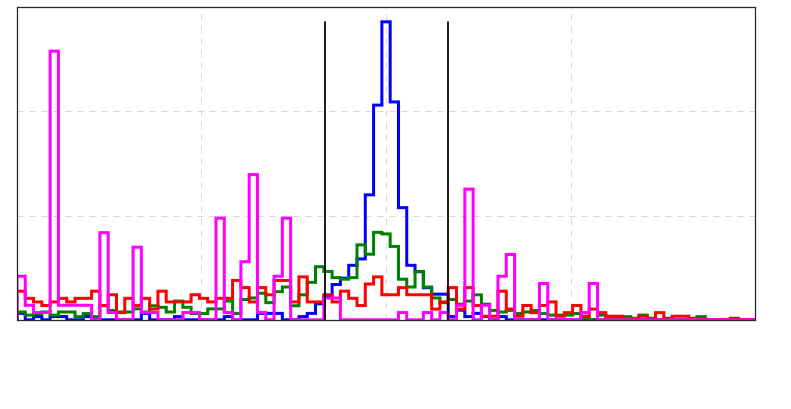

In [40]:

# after cut 4
ax=plot_feature_2tracks_clusters(samples=reduced_samples['cut 4'],labels=labels,colors=colors,var='delta_phi',x_label='$\\Delta \\phi$ [deg.]'
                              ,bins=np.linspace(0,360,90),figsize=(12,6),ticks_color='white',fontsize=35,legend_fontsize=20)
plt.plot([150,150],[0,0.05],'-',color='black')
plt.plot([210,210],[0,0.05],'-',color='black')
ax.yaxis.set_major_formatter(ticker.NullFormatter())

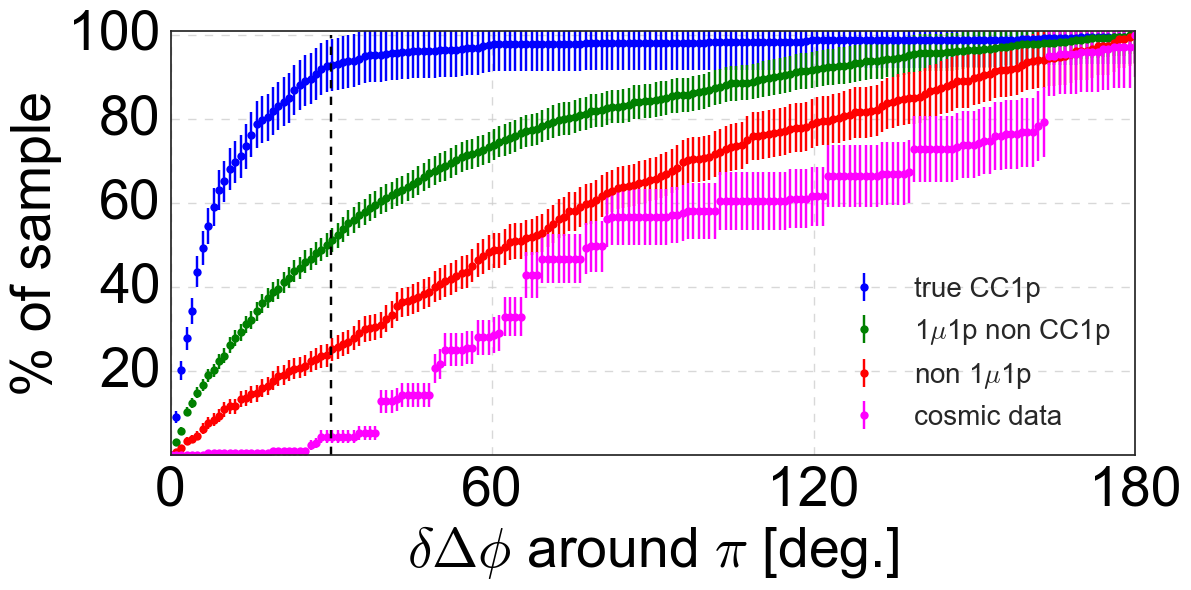

In [101]:
fig=plot_cut_samples(samples=reduced_samples['cut 4'],labels=labels,colors=colors,do_add_legend=True,legend_loc='lower right',legend_fontsize=20,
                     cut_var ='delta_phi',cut_type= 'symmetric',x_label = '$\\delta \\Delta \\phi$ around $\\pi$ [deg.]',ticks_color='black',
                 xcenter=180, xmin=0., xmax=180 , Nbins=180,fontsize=40,figsize=(12,6))
plt.plot([30,30],[0,100],'--',color='black')
plt.savefig(figures_path+'DeltaPhi_cuts.pdf')

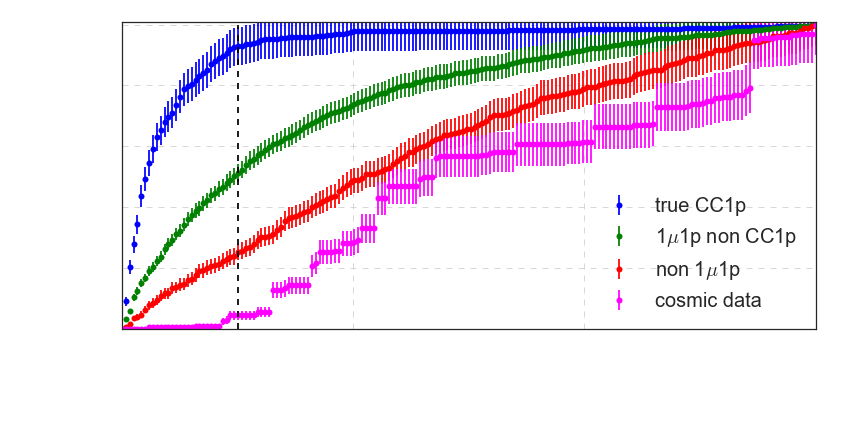

In [41]:
fig=plot_cut_samples(samples=reduced_samples['cut 4'],labels=labels,colors=colors,do_add_legend=True,legend_loc='lower right',legend_fontsize=20,
                     cut_var ='delta_phi',cut_type= 'symmetric',x_label = '$\\delta \\Delta \\phi$ around $\\pi$ [deg.]',ticks_color='white',
                 xcenter=180, xmin=0., xmax=180 , Nbins=180,fontsize=40,figsize=(12,6))
plt.plot([30,30],[0,100],'--',color='black')

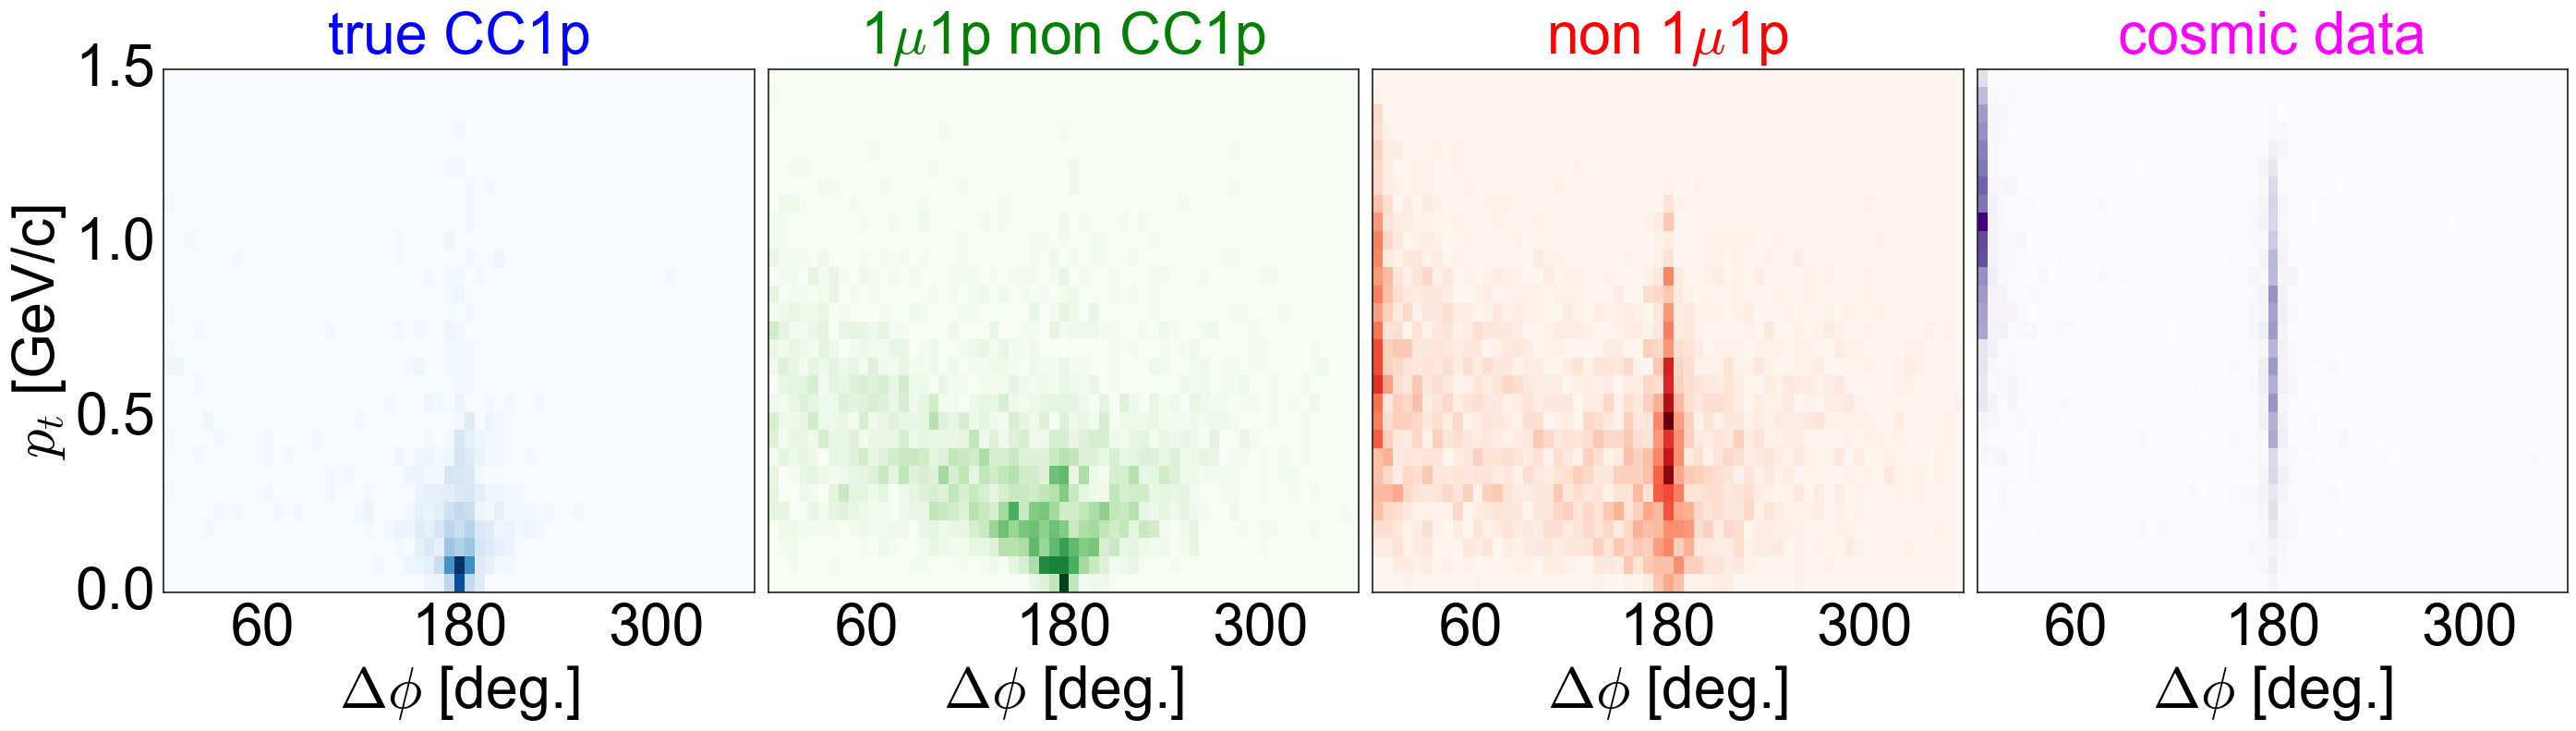

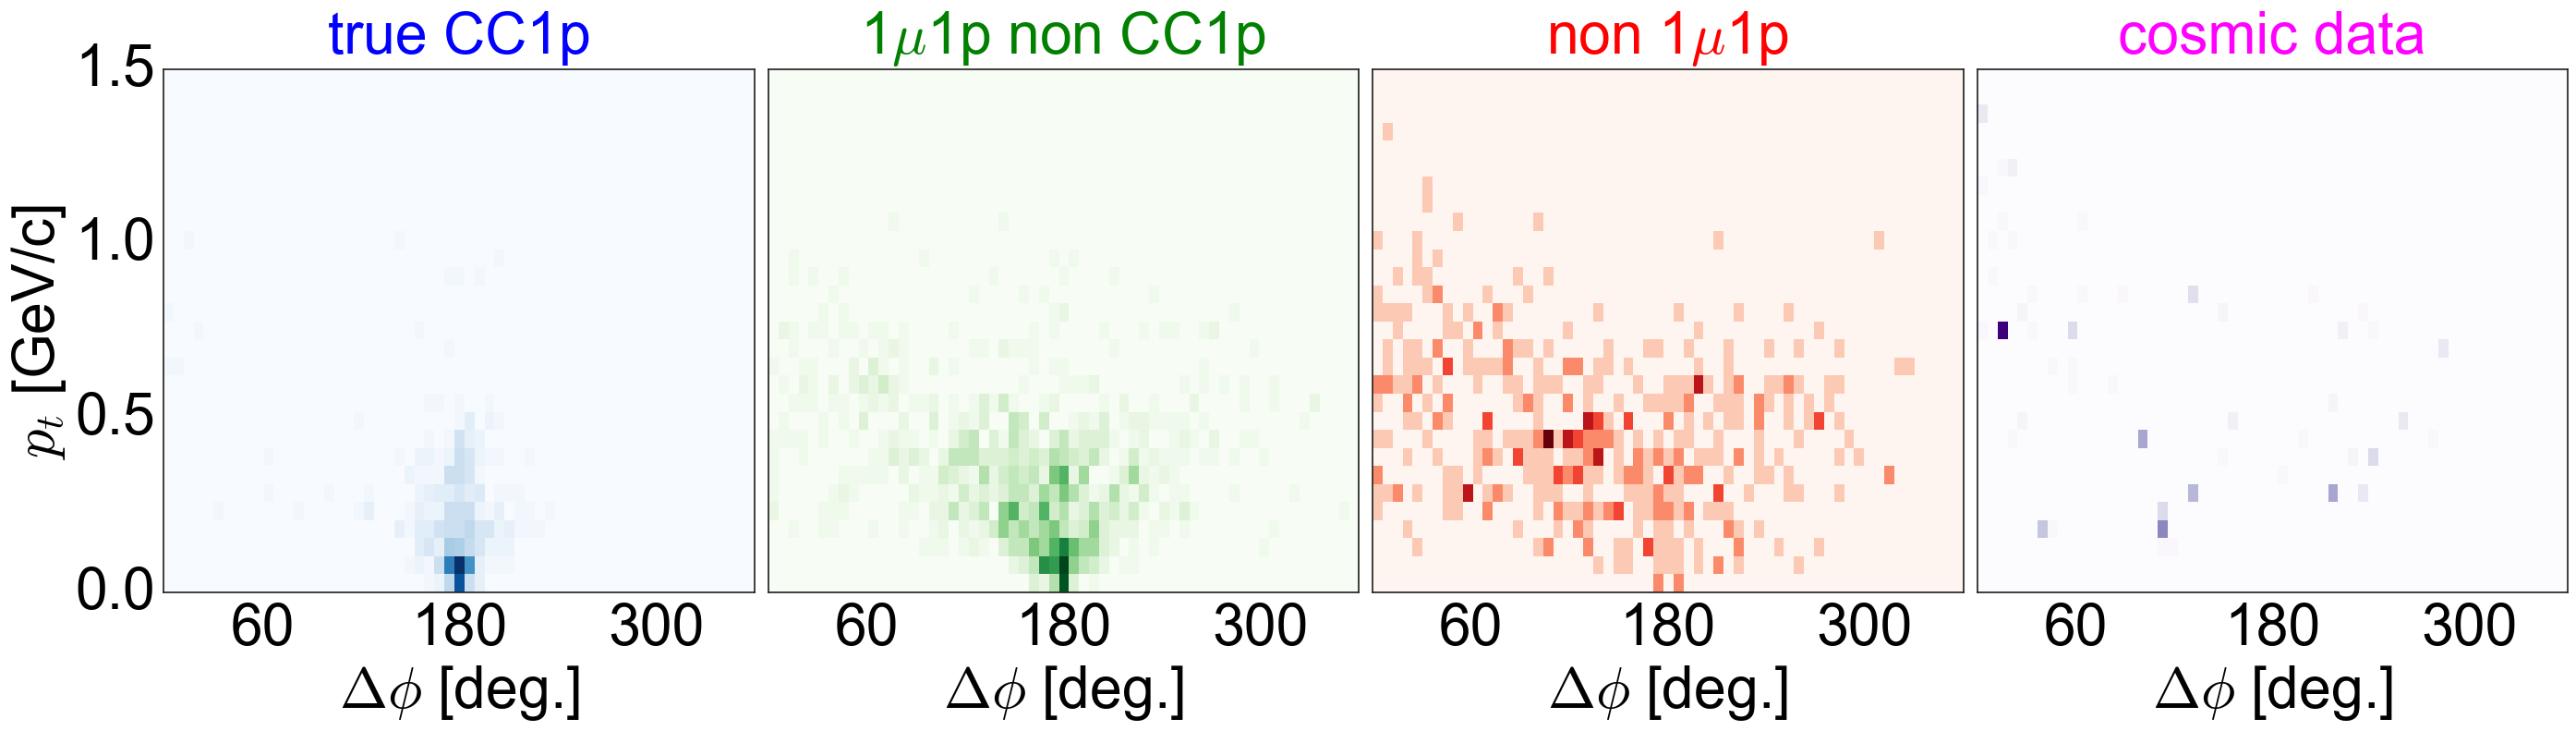


tab completion not implemented for this context


In [93]:
fig = plt.figure(figsize=(28,8))
bins=(np.linspace(0,360,60),np.linspace(0,1.5,30))
x_label,y_label='$\\Delta \\phi$ [deg.]','$p_{t}$ [GeV/c]'
for i,sample,label,cmap,color in zip(range(4),samples,labels,cmaps,colors):
    ax = fig.add_subplot(1,4,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    plot_2d_hist(sample['delta_phi'], 
                 sample['reco_CC1p_Pt'],
                 ax=ax,fontsize=figures_fontsize,ticks_color='black',bins=bins,cmap=cmap,norm='')            
    set_axes(ax,x_label=x_label, y_label=y_label if i==0 else '',ticks_color='black',fontsize=45)
    ax.xaxis.set_ticks([60,180,300])
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f') if i==0 else ticker.NullFormatter())    
plt.tight_layout()
fig.savefig(figures_path+'DeltaPhi_vs_Pt.pdf')


fig = plt.figure(figsize=(28,8))
for i,sample,label,cmap,color in zip(range(4),reduced_samples['cut 4'],labels,cmaps,colors):
    ax = fig.add_subplot(1,4,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    plot_2d_hist(sample['delta_phi'], 
                 sample['reco_CC1p_Pt'],
                 ax=ax,fontsize=figures_fontsize,ticks_color='black',bins=bins,cmap=cmap,norm='')            
    set_axes(ax,x_label=x_label, y_label=y_label if i==0 else '',ticks_color='black',fontsize=45)
    ax.xaxis.set_ticks([60,180,300])
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f') if i==0 else ticker.NullFormatter())    
plt.tight_layout()
fig.savefig(figures_path+'DeltaPhi_vs_Pt_after_cut_4.pdf')

### \theta_pq

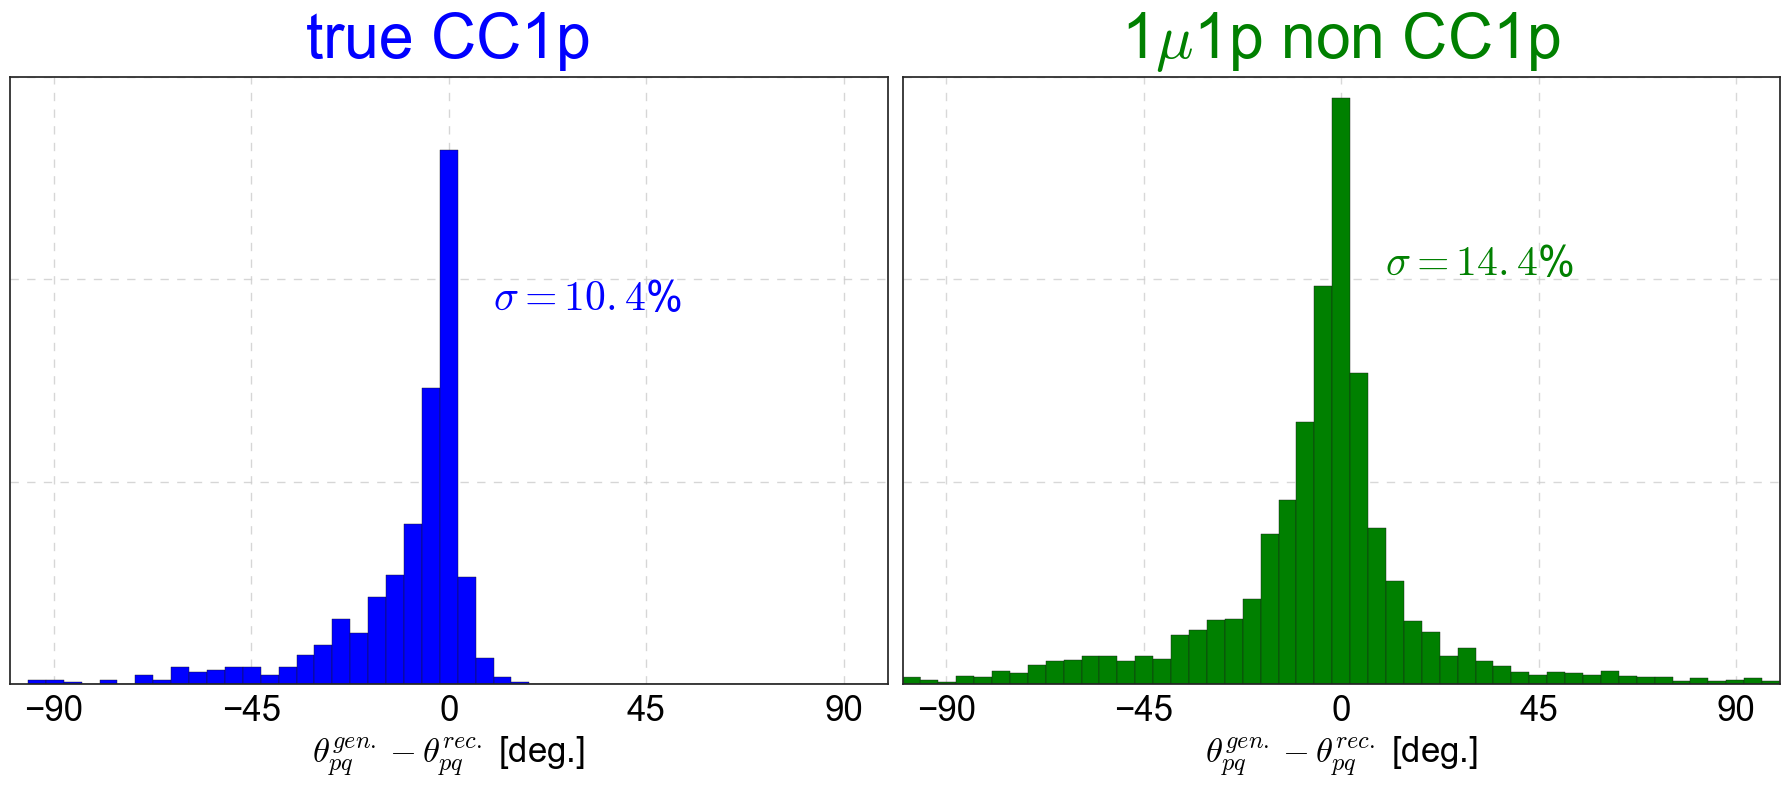

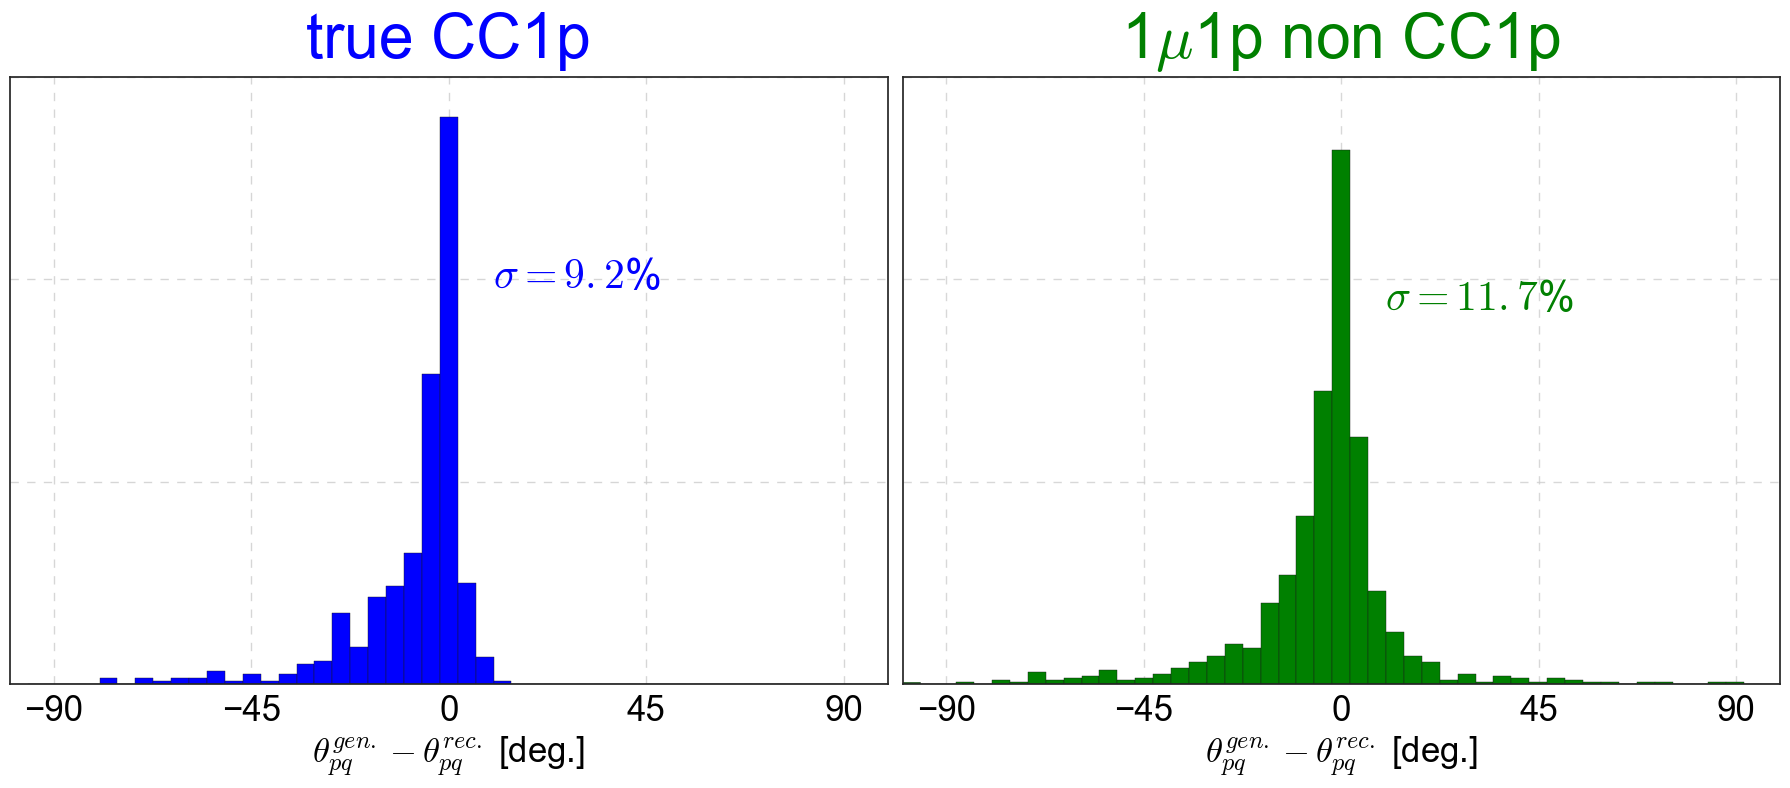

In [121]:
fig=plt.figure(figsize=(18,8))
for i,sample,label,cmap,color in zip(range(2),samples,labels,cmaps,colors):
    ax = fig.add_subplot(1,2,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    h,bins,_=ax.hist(sample['truth_theta_pq']-sample['reco_CC1p_theta_pq_fromE'],bins=np.linspace(-100,100,50),color=color);
    ax.yaxis.set_major_formatter(ticker.NullFormatter())    
    set_axes(ax,'$\\theta^{gen.}_{pq}-\\theta^{rec.}_{pq}$ [deg.]' , '', fontsize=25,do_add_grid=True
             ,xticks=[-90,-45,0,45,90])
    small_sample = sample[np.abs(sample['truth_theta_pq']-sample['reco_CC1p_theta_pq_fromE'])<45]
    sigma = np.std(small_sample['truth_theta_pq']-small_sample['reco_CC1p_theta_pq_fromE'])
    plt.text(10,0.7*np.max(h),'$\\sigma=%.1f$'%sigma+'%',color=color,fontsize=30)
ax.grid(linestyle='--',alpha=0.75)
plt.tight_layout()
plt.savefig(figures_path+'theta_pq_gen_reco.pdf')

fig=plt.figure(figsize=(18,8))
for i,sample,label,cmap,color in zip(range(2),reduced_samples['cut 4'],labels,cmaps,colors):
    ax = fig.add_subplot(1,2,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    h,bins,_=ax.hist(sample['truth_theta_pq']-sample['reco_CC1p_theta_pq_fromE'],bins=np.linspace(-100,100,50),color=color);
    ax.yaxis.set_major_formatter(ticker.NullFormatter())    
    set_axes(ax,'$\\theta^{gen.}_{pq}-\\theta^{rec.}_{pq}$ [deg.]' , '', fontsize=25,do_add_grid=True
             ,xticks=[-90,-45,0,45,90])
    small_sample = sample[np.abs(sample['truth_theta_pq']-sample['reco_CC1p_theta_pq_fromE'])<45]
    sigma = np.std(small_sample['truth_theta_pq']-small_sample['reco_CC1p_theta_pq_fromE'])
    plt.text(10,0.7*np.max(h),'$\\sigma=%.1f$'%sigma+'%',color=color,fontsize=30)
ax.grid(linestyle='--',alpha=0.75)
plt.tight_layout()
plt.savefig(figures_path+'theta_pq_gen_reco_after_cut_4.pdf')

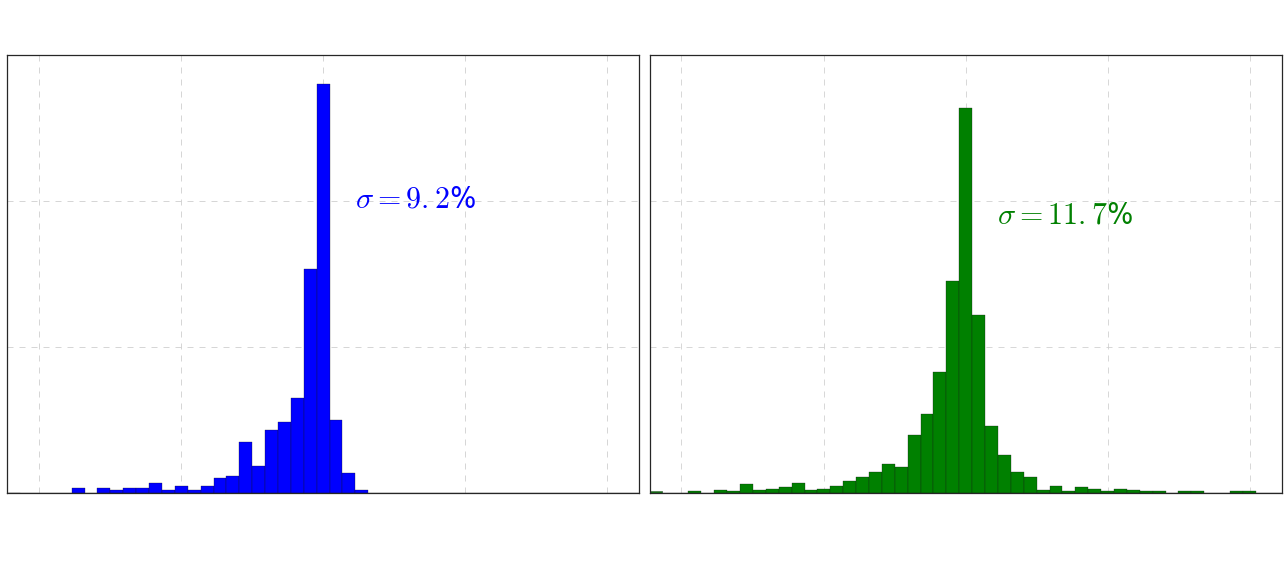

In [43]:
fig=plt.figure(figsize=(18,8))
for i,sample,label,cmap,color in zip(range(2),reduced_samples['cut 4'],labels,cmaps,colors):
    ax = fig.add_subplot(1,2,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color='white')
    h,bins,_=ax.hist(sample['truth_theta_pq']-sample['reco_CC1p_theta_pq_fromE'],bins=np.linspace(-100,100,50),color=color);
    ax.yaxis.set_major_formatter(ticker.NullFormatter())    
    set_axes(ax,'$\\theta^{gen.}_{pq}-\\theta^{rec.}_{pq}$ [deg.]' , '', fontsize=25,do_add_grid=True,ticks_color='white'
             ,xticks=[-90,-45,0,45,90])
    small_sample = sample[np.abs(sample['truth_theta_pq']-sample['reco_CC1p_theta_pq_fromE'])<45]
    sigma = np.std(small_sample['truth_theta_pq']-small_sample['reco_CC1p_theta_pq_fromE'])
    plt.text(10,0.7*np.max(h),'$\\sigma=%.1f$'%sigma+'%',color=color,fontsize=30)
ax.grid(linestyle='--',alpha=0.75)
plt.tight_layout()

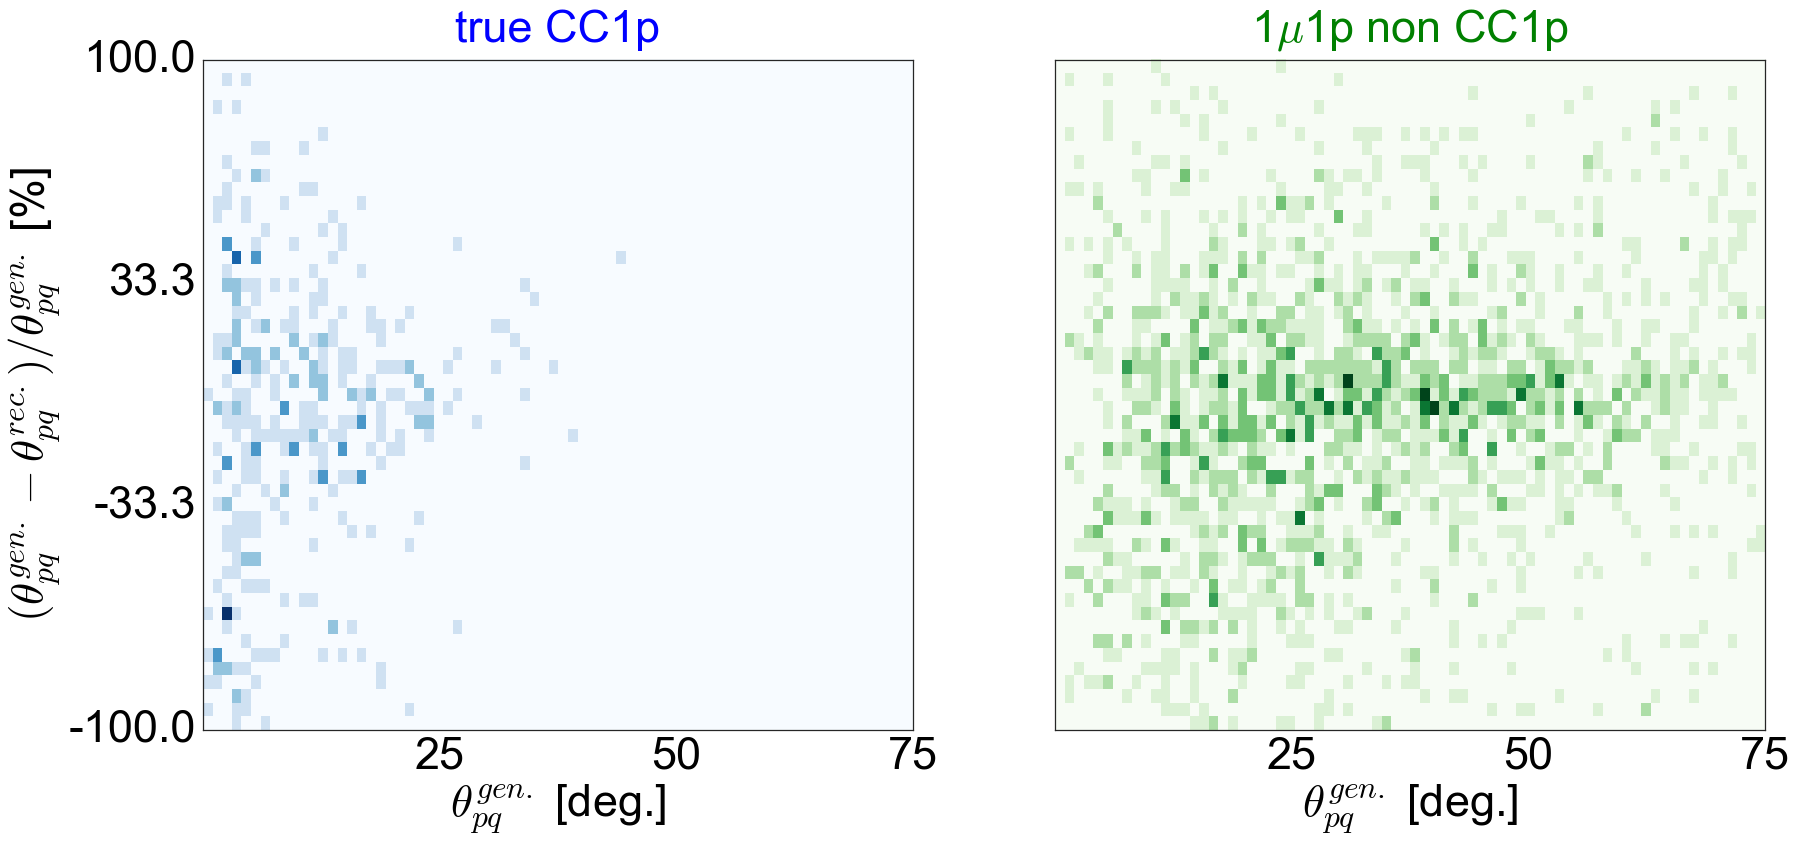

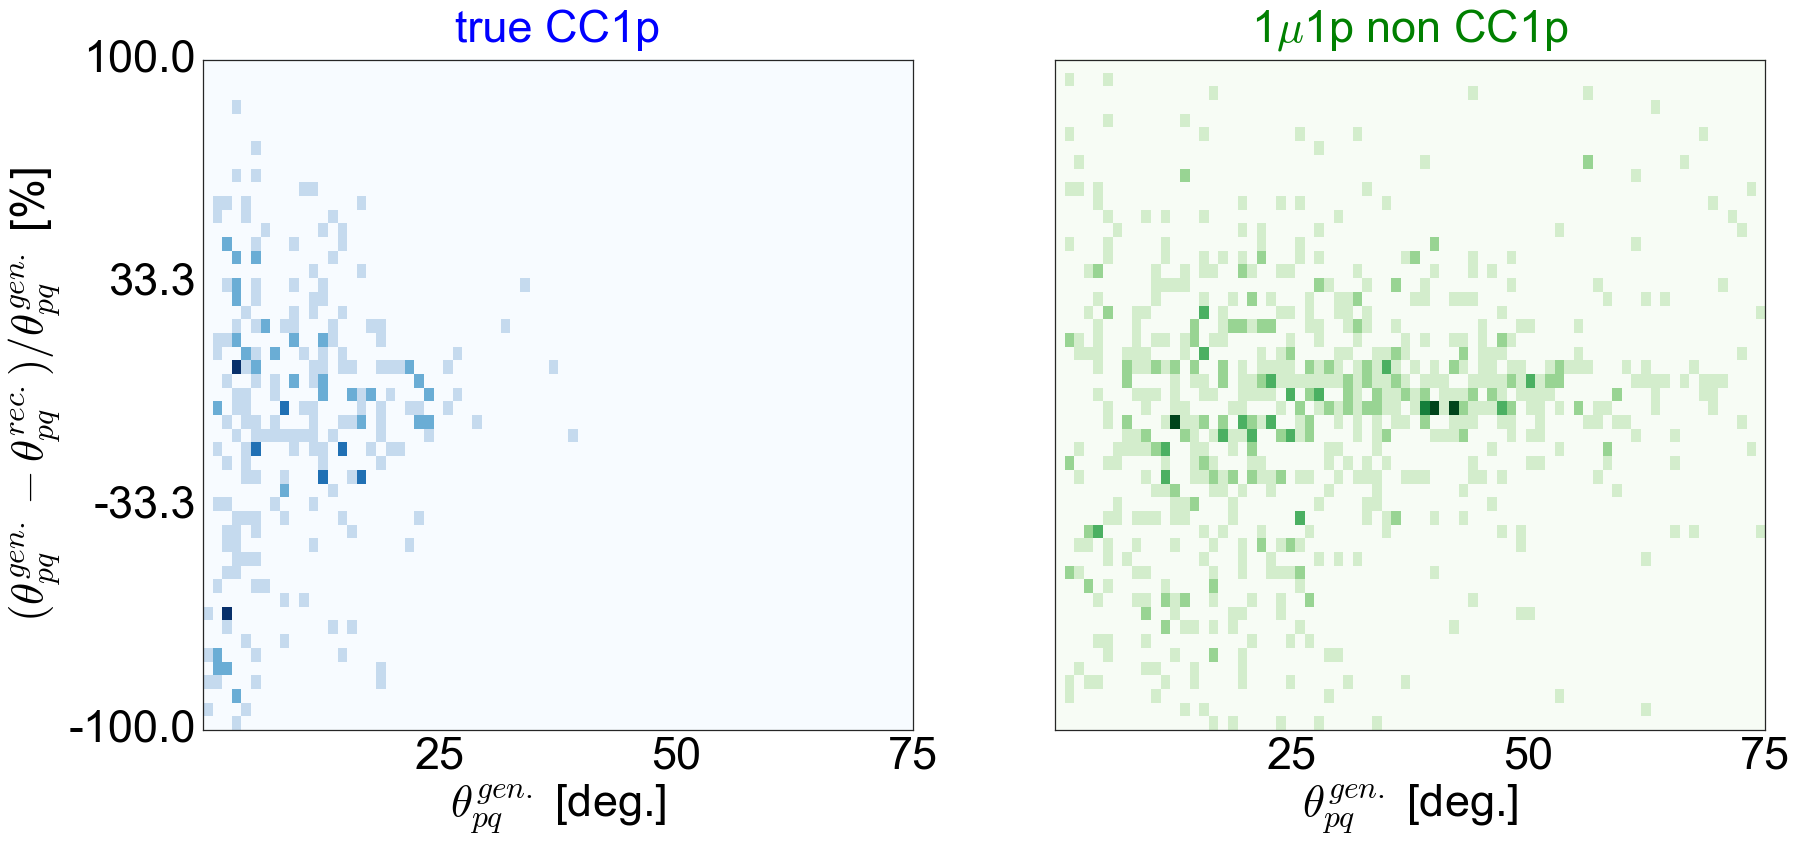

In [26]:
fig = plt.figure(figsize=(28,12))
bins=(np.linspace(0,75,75),np.linspace(-100,100,50))
    
for i,sample,label,cmap,color in zip(range(2),samples,labels,cmaps,colors):
    ax = fig.add_subplot(1,2,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    plot_2d_hist(sample['truth_theta_pq'], 
                 100.*(sample['truth_theta_pq']-sample['reco_CC1p_theta_pq_fromE'])/sample['truth_theta_pq'],
                 ax=ax,fontsize=figures_fontsize,ticks_color='black',bins=bins,cmap=cmap,norm='')            
    set_axes(ax,x_label='$\\theta^{gen.}_{pq}$ [deg.]', y_label='$(\\theta^{gen.}_{pq}-\\theta^{rec.}_{pq})/\\theta^{gen.}_{pq}$ [%]' if i==0 else '',ticks_color='black',fontsize=45)
    ax.xaxis.set_ticks([25,50,75])
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f') if i==0 else ticker.NullFormatter())    

fig.savefig(figures_path+'theta_pq_reconstruction.pdf')

fig = plt.figure(figsize=(28,12))
for i,sample,label,cmap,color in zip(range(2),reduced_samples['cut 4'],labels,cmaps,colors):
    ax = fig.add_subplot(1,2,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    plot_2d_hist(sample['truth_theta_pq'], 
                 100.*(sample['truth_theta_pq']-sample['reco_CC1p_theta_pq_fromE'])/sample['truth_theta_pq'],
                 ax=ax,fontsize=figures_fontsize,ticks_color='black',bins=bins,cmap=cmap,norm='')            
    set_axes(ax,x_label='$\\theta^{gen.}_{pq}$ [deg.]', y_label='$(\\theta^{gen.}_{pq}-\\theta^{rec.}_{pq})/\\theta^{gen.}_{pq}$ [%]' if i==0 else '',ticks_color='black',fontsize=45)
    ax.xaxis.set_ticks([25,50,75])
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f') if i==0 else ticker.NullFormatter())    
fig.savefig(figures_path+'theta_pq_reconstruction_after_cut_4.pdf')

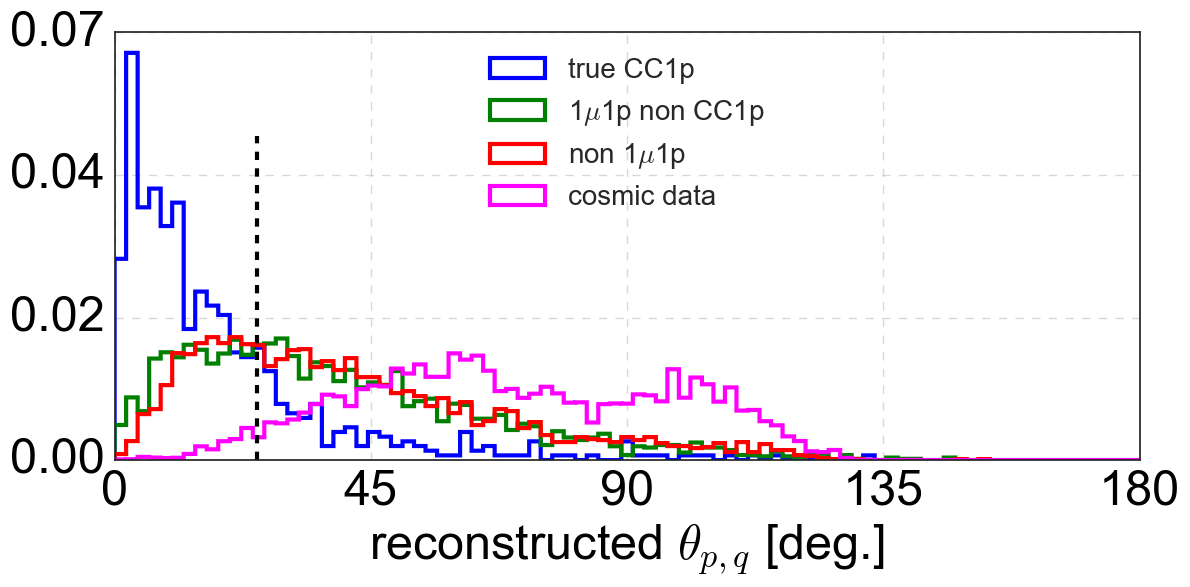

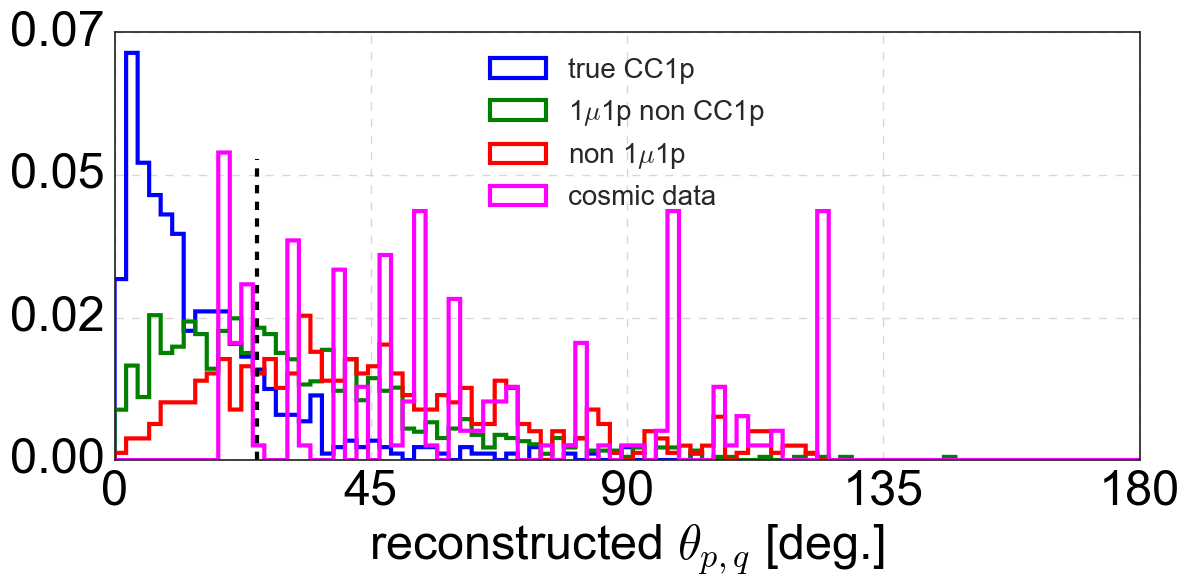

In [125]:
plot_feature_2tracks_clusters(samples=samples,labels=labels,colors=colors,var='reco_CC1p_theta_pq_fromE',x_label='reconstructed $\\theta_{p,q}$ [deg.]'
                              ,bins=np.linspace(0,180,90)
                              ,do_add_legend=True,figsize=(12,6),ticks_color='black',fontsize=35,legend_fontsize=20)
plt.plot([25,25],[0,0.05],'--',color='black',linewidth=3)
plt.savefig(figures_path+'theta_pq.pdf')

# after cut 4
plot_feature_2tracks_clusters(samples=reduced_samples['cut 4'],labels=labels,colors=colors,var='reco_CC1p_theta_pq_fromE',x_label='reconstructed $\\theta_{p,q}$ [deg.]'
                              ,bins=np.linspace(0,180,90)
                              ,do_add_legend=True,figsize=(12,6),ticks_color='black',fontsize=35,legend_fontsize=20)
plt.plot([25,25],[0,0.05],'--',color='black',linewidth=3)
plt.savefig(figures_path+'theta_pq_after_cut_4.pdf')

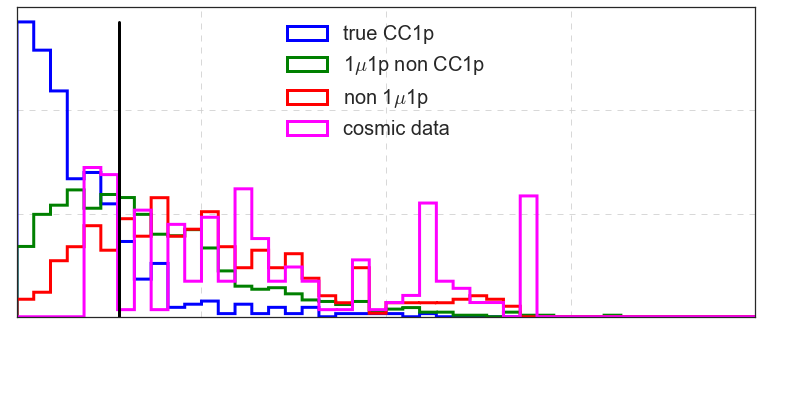

In [48]:
# after cut 4
ax=plot_feature_2tracks_clusters(samples=reduced_samples['cut 4'],labels=labels,colors=colors,var='reco_CC1p_theta_pq_fromE',x_label='reconstructed $\\theta_{p,q}$ [deg.]'
                              ,bins=np.linspace(0,180,45)
                              ,do_add_legend=True,figsize=(12,6),ticks_color='white',fontsize=35,legend_fontsize=20)
plt.plot([25,25],[0,0.05],'-',color='black',linewidth=3)
ax.yaxis.set_major_formatter(ticker.NullFormatter())

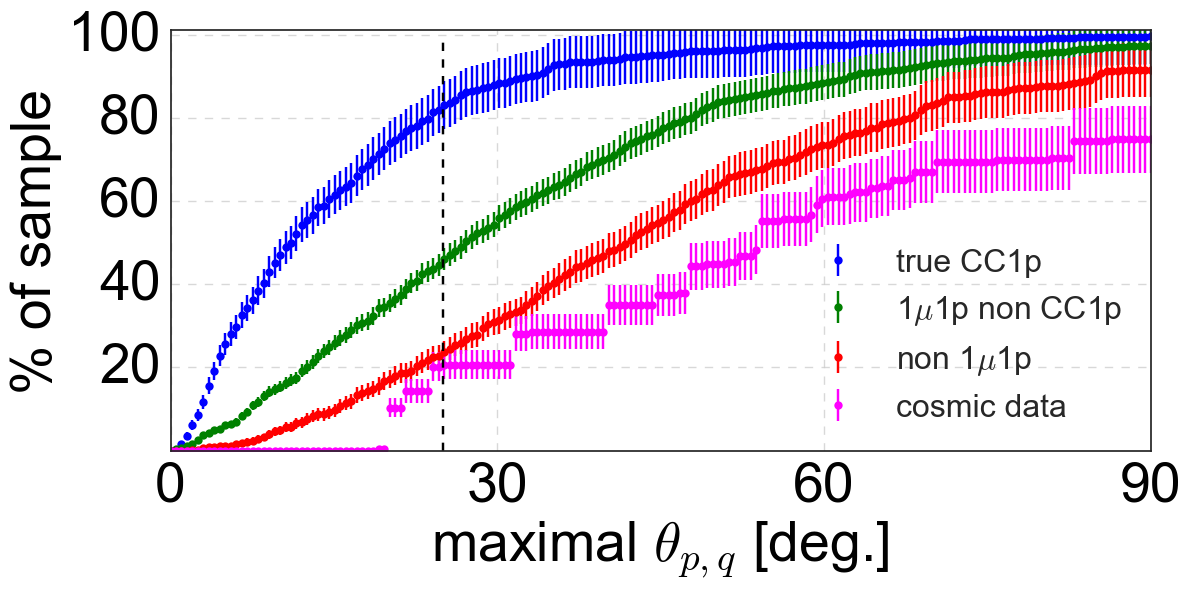

In [103]:
# fig=plot_cut_samples(samples=reduced_samples['cut 4'],labels=labels,do_add_legend=False
#                      ,cut_var ='delta_phi',cut_type= 'max',x_label = '$\\delta \\Delta \\phi$ around $\\pi$ [deg.]',ticks_color='black')

fig=plot_cut_samples(samples=reduced_samples['cut 4'],labels=labels,colors=colors,do_add_legend=True,legend_loc='lower right',legend_fontsize=23,mul=1
                 ,cut_var ='reco_CC1p_theta_pq_fromE', cut_type= 'max',ticks_color='black'                 
                 ,x_label = 'maximal $\\theta_{p,q}$ [deg.]'
                 ,xmin=0, xmax=90 , Nbins=180,fontsize=40,figsize=(12,6));
plt.plot([25,25],[0,100],'--',color='black')
plt.savefig(figures_path+'theta_pq_cuts.pdf')

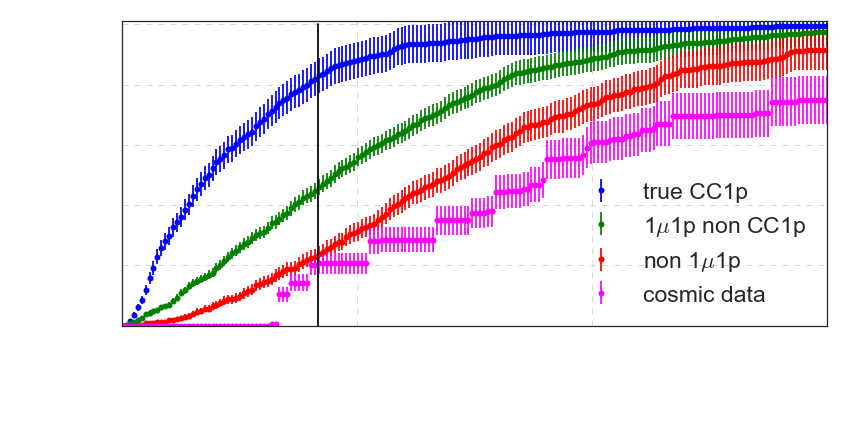

In [47]:
fig=plot_cut_samples(samples=reduced_samples['cut 4'],labels=labels,colors=colors,do_add_legend=True,legend_loc='lower right',legend_fontsize=23,mul=1
                 ,cut_var ='reco_CC1p_theta_pq_fromE', cut_type= 'max',ticks_color='white'                 
                 ,x_label = 'maximal $\\theta_{p,q}$ [deg.]'
                 ,xmin=0, xmax=90 , Nbins=180,fontsize=40,figsize=(12,6));
plt.plot([25,25],[0,100],'-',color='black')

### p_t

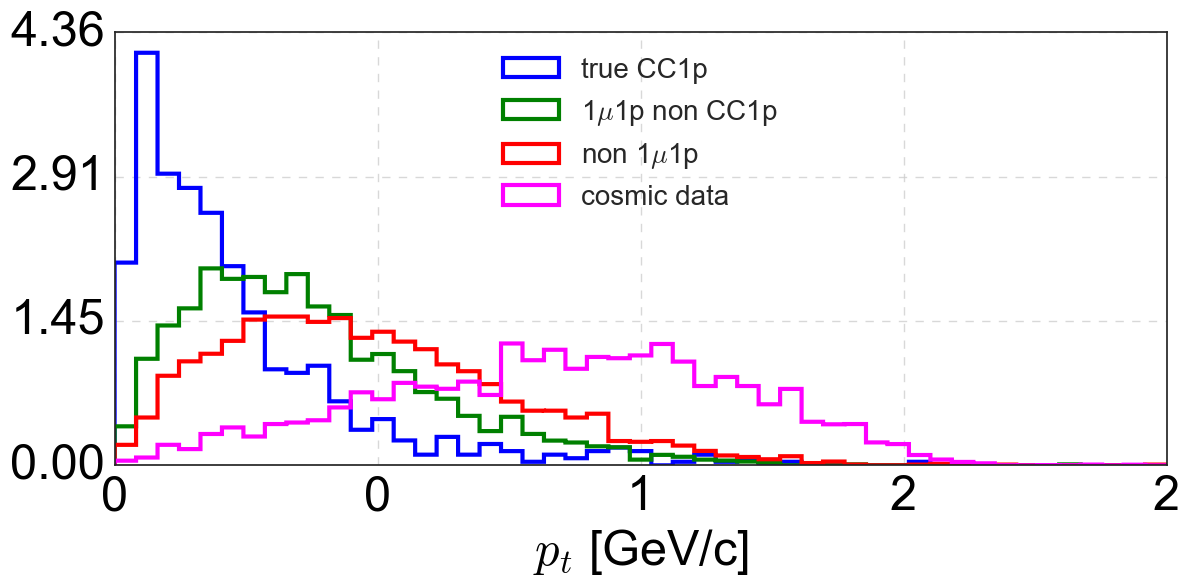

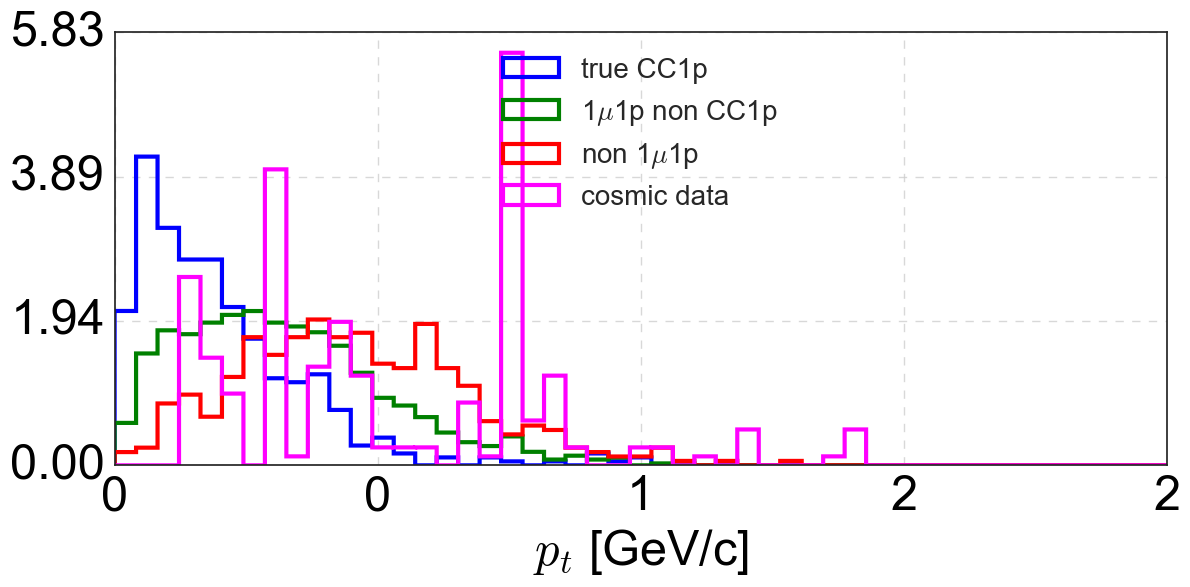

In [14]:
plot_feature_2tracks_clusters(samples=samples,labels=labels,colors=colors,var='reco_CC1p_Pt',x_label='$p_{t}$ [GeV/c]'
                              ,bins=np.linspace(0,2,50)
                              ,do_add_legend=True,figsize=(12,6),ticks_color='black',fontsize=35,legend_fontsize=20)
plt.savefig(figures_path+'Pt.pdf')

# after cut 4
plot_feature_2tracks_clusters(samples=reduced_samples['cut 4'],labels=labels,colors=colors,var='reco_CC1p_Pt',x_label='$p_{t}$ [GeV/c]'
                              ,bins=np.linspace(0,2,50)
                              ,do_add_legend=True,figsize=(12,6),ticks_color='black',fontsize=35,legend_fontsize=20)
plt.savefig(figures_path+'Pt_after_cut_4.pdf')

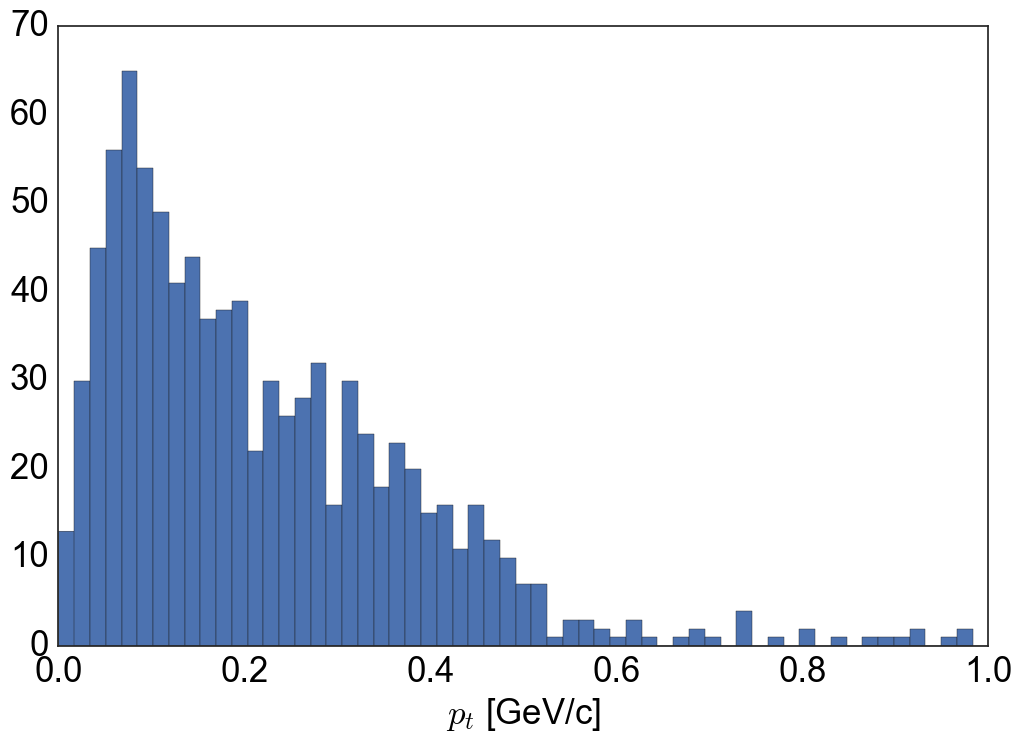

In [22]:
fig,ax=plt.subplots(figsize=(12,8))
ax.hist(pd.concat([reduced_samples['cut 5'][0],reduced_samples['cut 5'][1]])['reco_CC1p_Pt'],bins=np.linspace(0,1.,60));
set_axes(ax,'$p_t$ [GeV/c]')

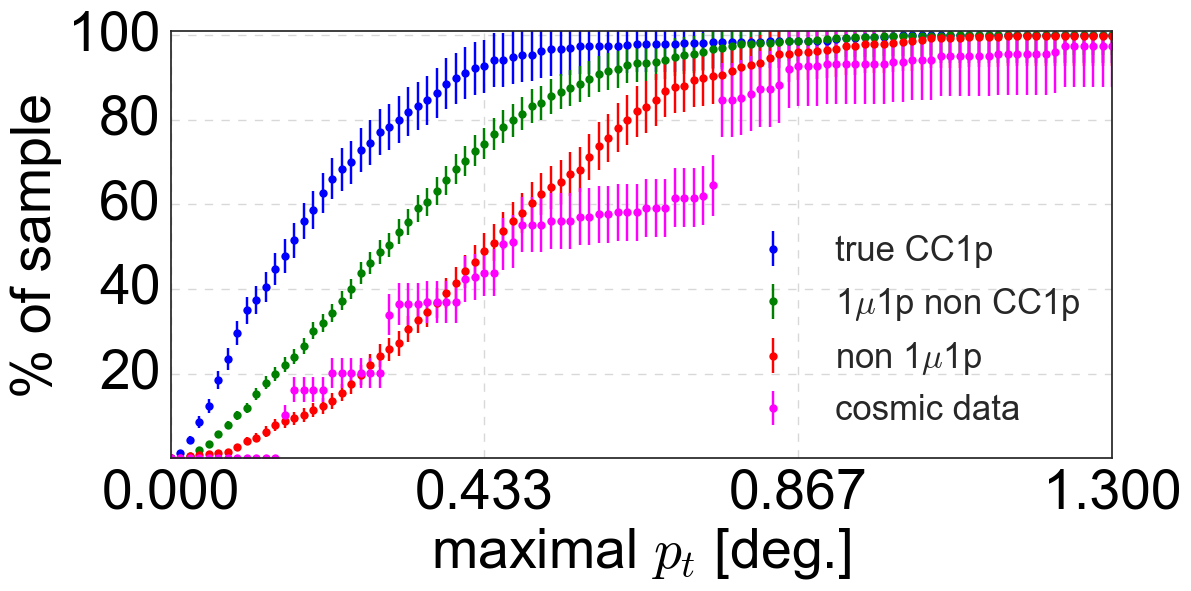

In [105]:
# fig=plot_cut_samples(samples=reduced_samples['cut 4'],labels=labels,do_add_legend=False
#                      ,cut_var ='delta_phi',cut_type= 'max',x_label = '$\\delta \\Delta \\phi$ around $\\pi$ [deg.]',ticks_color='black')

fig=plot_cut_samples(samples=reduced_samples['cut 4'],labels=labels,colors=colors,do_add_legend=True,legend_loc='lower right',legend_fontsize=25,mul=1
                 ,cut_var ='reco_CC1p_Pt', cut_type= 'max',ticks_color='black'                 
                 ,x_label = 'maximal $p_{t}$ [deg.]'
                 ,xmin=0, xmax=1.3 , Nbins=100,fontsize=40,figsize=(12,6));
plt.plot([25,25],[0,100],'--',color='black')
plt.savefig(figures_path+'Pt_cuts.pdf')

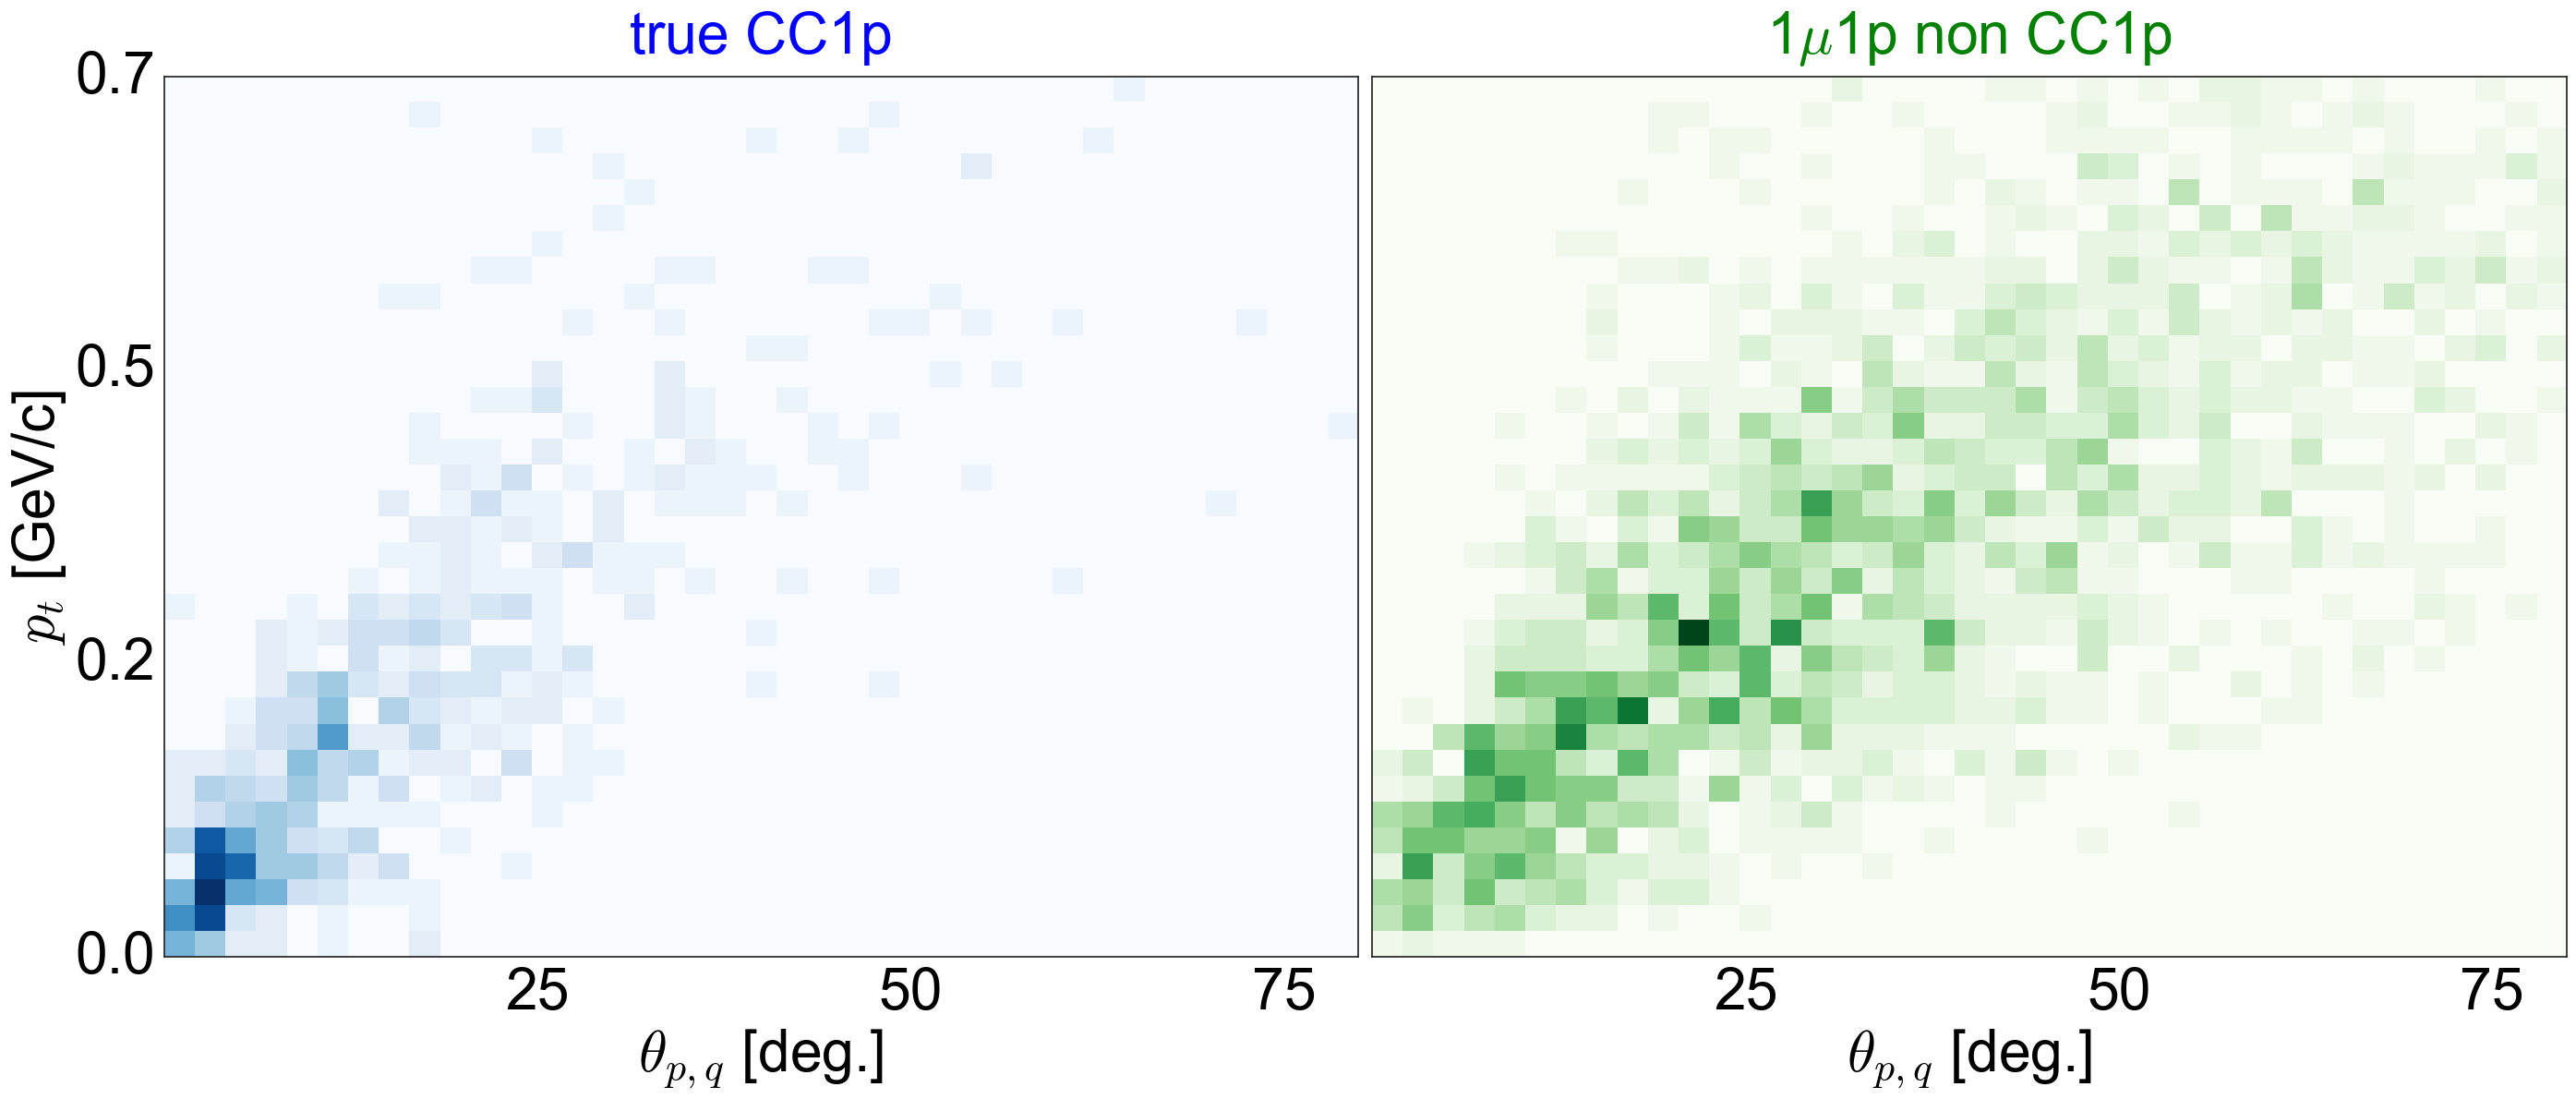

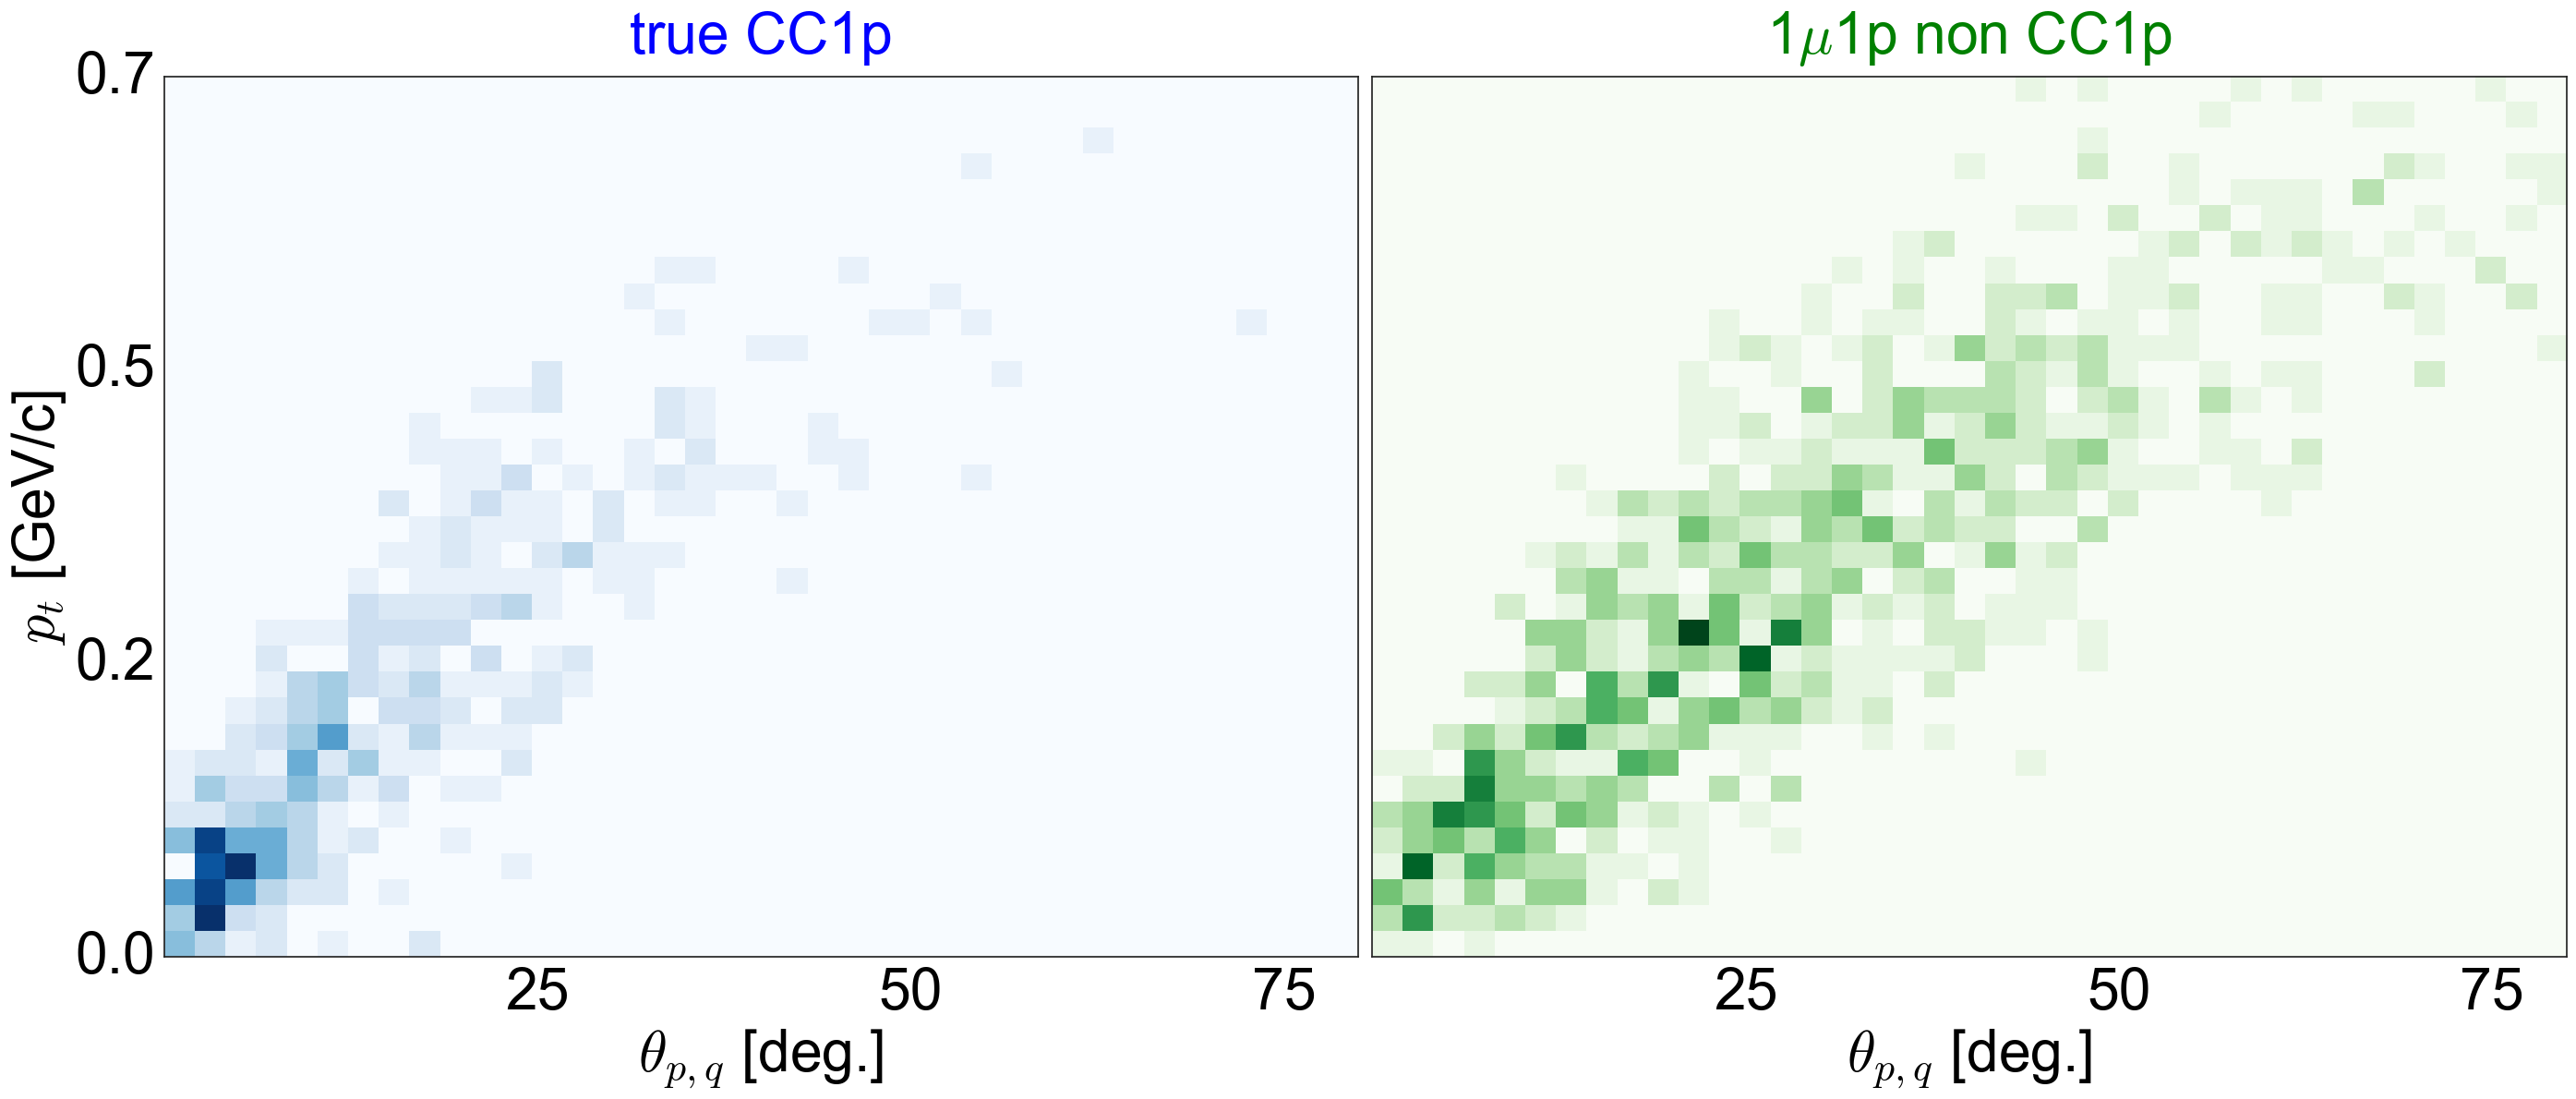


tab completion not implemented for this context

tab completion not implemented for this context


In [122]:
fig = plt.figure(figsize=(28,12))
bins=(np.linspace(0,80,40),np.linspace(0,0.7,35))
x_label,y_label='$\\theta_{p,q}$ [deg.]','$p_{t}$ [GeV/c]'
for i,sample,label,cmap,color in zip(range(2),samples,labels,cmaps,colors):
    ax = fig.add_subplot(1,2,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    plot_2d_hist(sample['reco_CC1p_theta_pq_fromE'], 
                 sample['reco_CC1p_Pt'],
                 ax=ax,fontsize=figures_fontsize,ticks_color='black',bins=bins,cmap=cmap,norm='')            
    set_axes(ax,x_label=x_label, y_label=y_label if i==0 else '',ticks_color='black',fontsize=45)
    ax.xaxis.set_ticks([25,50,75])
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f') if i==0 else ticker.NullFormatter())    
plt.tight_layout()
fig.savefig(figures_path+'theta_pq_vs_Pt.pdf')


fig = plt.figure(figsize=(28,12))
bins=(np.linspace(0,80,40),np.linspace(0,0.7,35))
x_label,y_label='$\\theta_{p,q}$ [deg.]','$p_{t}$ [GeV/c]'
for i,sample,label,cmap,color in zip(range(2),reduced_samples['cut 4'],labels,cmaps,colors):
    ax = fig.add_subplot(1,2,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    plot_2d_hist(sample['reco_CC1p_theta_pq_fromE'], 
                 sample['reco_CC1p_Pt'],
                 ax=ax,fontsize=figures_fontsize,ticks_color='black',bins=bins,cmap=cmap,norm='')            
    set_axes(ax,x_label=x_label, y_label=y_label if i==0 else '',ticks_color='black',fontsize=45)
    ax.xaxis.set_ticks([25,50,75])
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f') if i==0 else ticker.NullFormatter())    
plt.tight_layout()
fig.savefig(figures_path+'theta_pq_vs_Pt_after_cut_4.pdf')

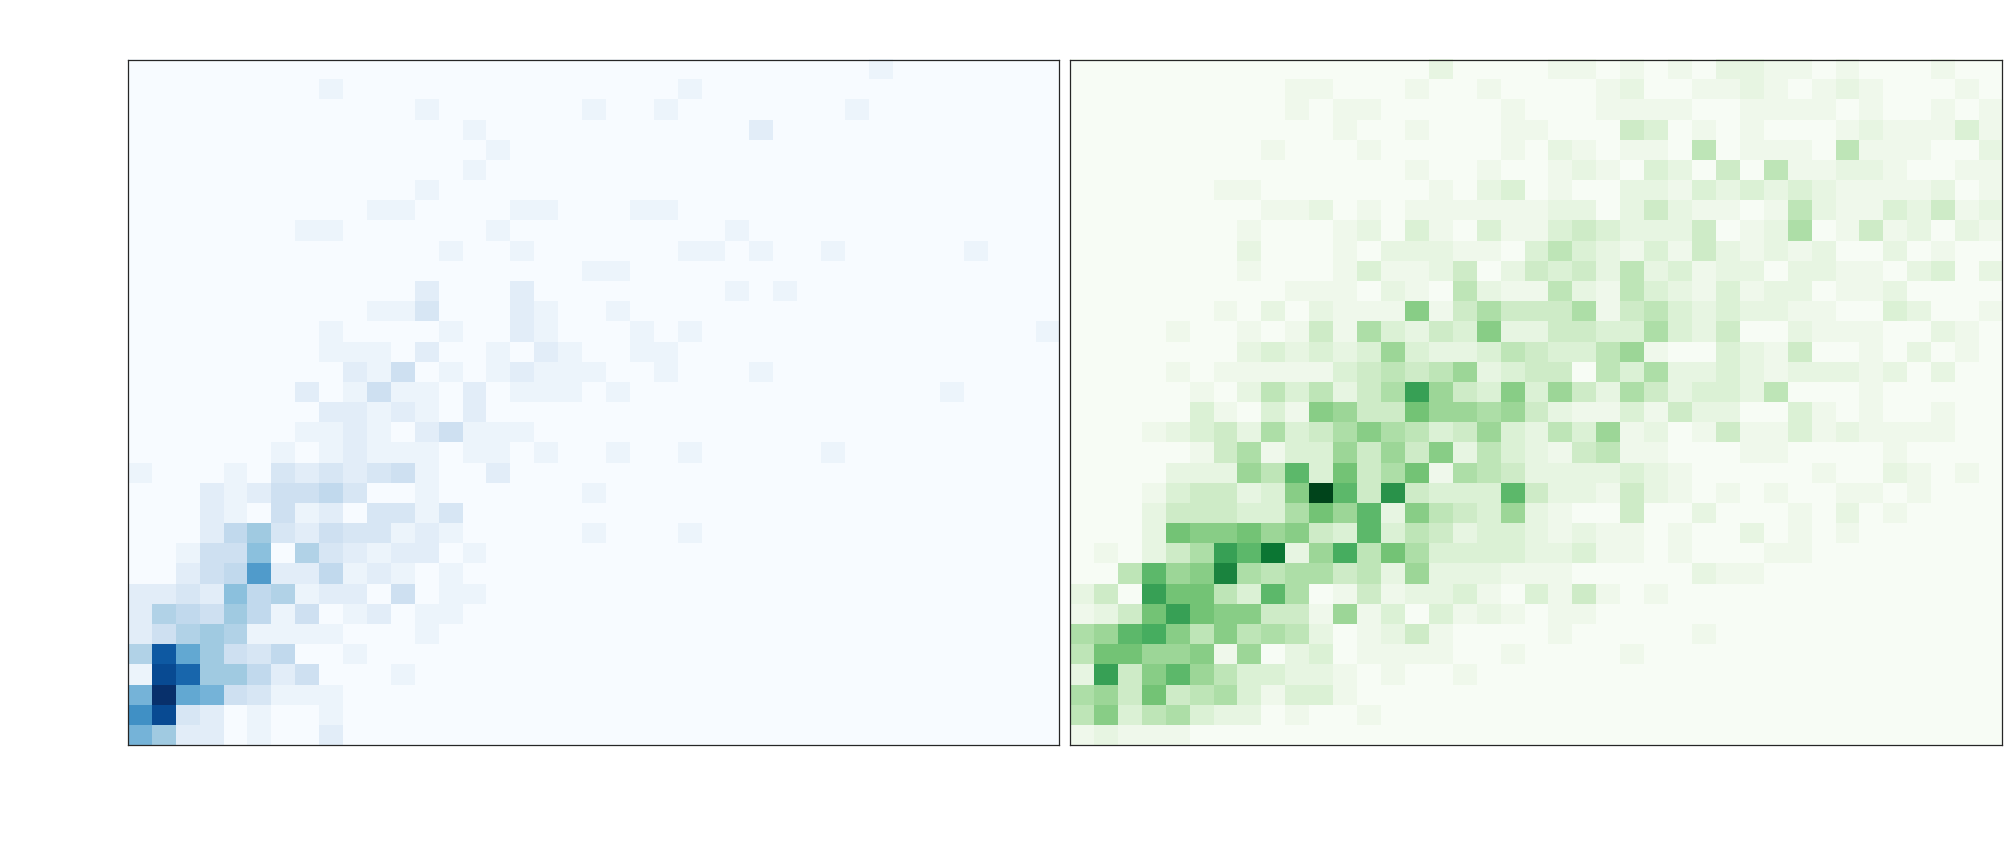

In [50]:
fig = plt.figure(figsize=(28,12))
bins=(np.linspace(0,80,40),np.linspace(0,0.7,35))
x_label,y_label='$\\theta_{p,q}$ [deg.]','$p_{t}$ [GeV/c]'
for i,sample,label,cmap,color in zip(range(2),samples,labels,cmaps,colors):
    ax = fig.add_subplot(1,2,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color='white')
    plot_2d_hist(sample['reco_CC1p_theta_pq_fromE'], 
                 sample['reco_CC1p_Pt'],
                 ax=ax,fontsize=figures_fontsize,ticks_color='black',bins=bins,cmap=cmap,norm='')            
    set_axes(ax,x_label=x_label, y_label=y_label if i==0 else '',ticks_color='white',fontsize=45)
    ax.xaxis.set_ticks([25,50,75])
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f') if i==0 else ticker.NullFormatter())    
plt.tight_layout()

314 in sample 0 , 84  %
233 in sample 1 , 67  %
32 in sample 2 , 67  %
1 in sample 3 , 100  %
efficiency: 84.0 %
purity: 54.1 %


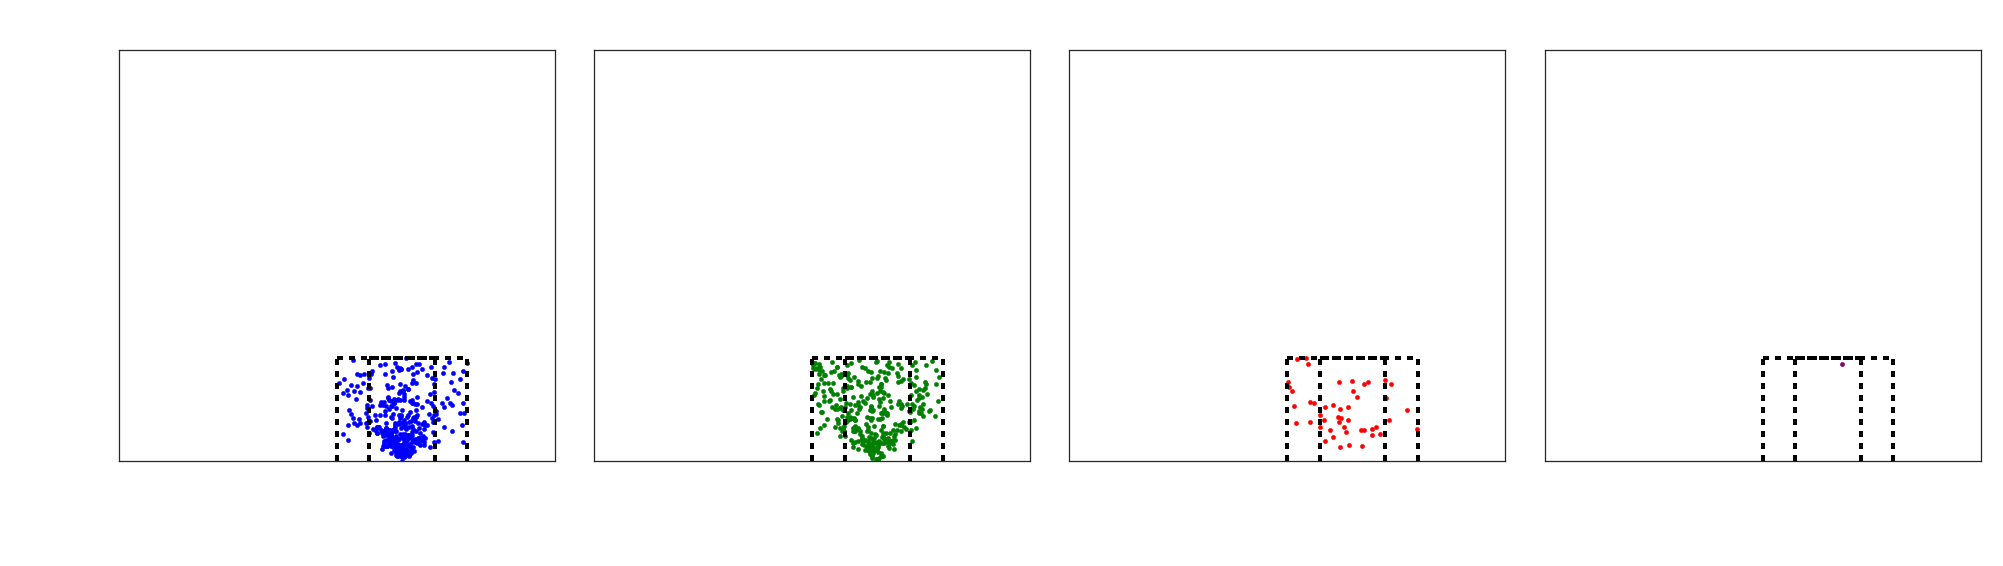

In [913]:
# theta_pq vs. \Delta \phi
# second plot - after applied cuts
reduced_this_cut,frac=[],[]
bins=(np.linspace(100,260,60),np.linspace(0,80,60))
fig = plt.figure(figsize=(28,8))
for i,sample,label,cmap,original_sample,color in zip(range(4),reduced_samples['cut 5'],labels,cmaps,samples,colors):
    ax = fig.add_subplot(1,4,i+1)
    ax.set_title(label,fontsize=40,y=1.02,color='white')
#     plot_2d_hist(sample['delta_phi'],sample['reco_CC1p_theta_pq_corrected'],ax=ax,fontsize=25,bins=bins,cmap=cmap,norm='')    
    plt.scatter(sample['delta_phi'],sample['reco_CC1p_theta_pq_fromE'],color=color)
    red = sample
    
    plt.plot([180-30,180+30],[25,25],'--',color='black',linewidth=4)
    red = red[red['reco_CC1p_theta_pq_fromE']<25]

    plt.plot([180-30,180-30],[0,25],'--',color='black',linewidth=4)
    red = red[red['delta_phi']>180-30]

    plt.plot([180+30,180+30],[0,25],'--',color='black',linewidth=4)
    red = red[red['delta_phi']<180+30]
    
    delta_phi_min , delta_phi_max , theta_pq_max = 165 , 195 , 25
    
    plt.plot([delta_phi_min , delta_phi_max],[theta_pq_max,theta_pq_max],'--',color='black',linewidth=4)
    red = red[red['reco_CC1p_theta_pq_fromE']<theta_pq_max]

    plt.plot([delta_phi_min,delta_phi_min],[0,theta_pq_max],'--',color='black',linewidth=4)
    red = red[red['delta_phi']>delta_phi_min]

    plt.plot([delta_phi_max,delta_phi_max],[0,theta_pq_max],'--',color='black',linewidth=4)
    red = red[red['delta_phi']<delta_phi_max]

    
    f = 100.*float(len(red))/len(sample)
    reduced_this_cut.append(red)
    frac.append(f)
    print len(red),'in sample',i,', %.f '%(100.*float(len(red))/len(sample)),'%'
    set_axes(ax,x_label='$\\Delta \\phi$ [deg.]', y_label='$\\theta_{p,q}$ [deg.]' if i==0 else '',ticks_color='white',fontsize=45)    
    if i>0: ax.yaxis.set_major_formatter(ticker.NullFormatter())    
    ax.xaxis.set_ticks([60,120,180,240]);ax.yaxis.set_ticks([0,25,50,75]);
    ax.set_xlim(50,250);ax.set_ylim(0,100);

plt.tight_layout()
purity = 100.*float(len(reduced_this_cut[0]))/(len(reduced_this_cut[0])+len(reduced_this_cut[1])+len(reduced_this_cut[2])+len(reduced_this_cut[3]))
print 'efficiency: %.1f'%frac[0],'%\n','purity: %.1f'%purity,'%'

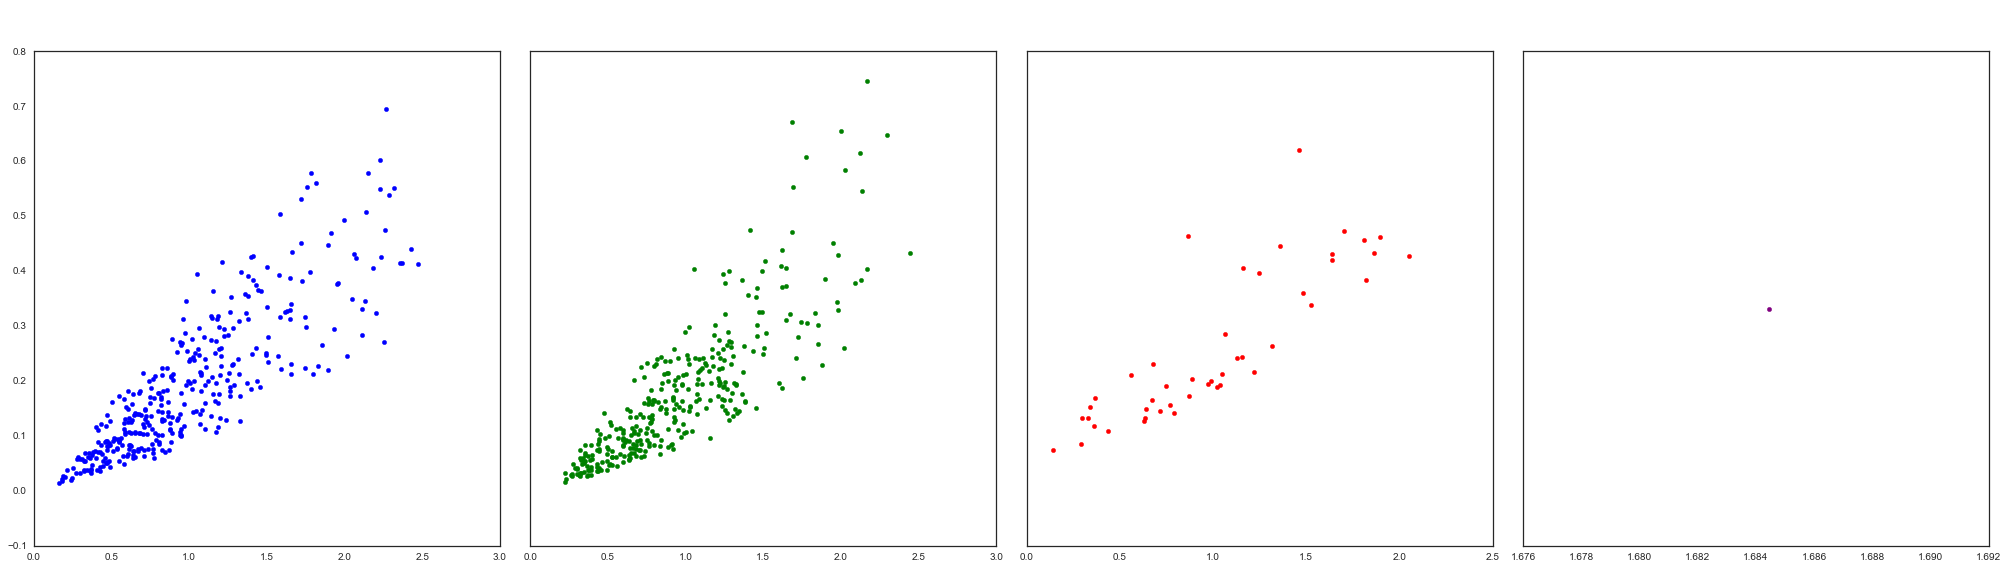

In [85]:
# x_B vs. W2
# second plot - after applied cuts
reduced_this_cut,frac=[],[]
bins=(np.linspace(100,260,60),np.linspace(0,80,60))
fig = plt.figure(figsize=(28,8))
for i,sample,label,cmap,original_sample,color in zip(range(4),reduced_samples['cut 5'],labels,cmaps,samples,colors):
    ax = fig.add_subplot(1,4,i+1)
    ax.set_title(label,fontsize=40,y=1.02,color='white')
    plt.scatter(sample['reco_CC1p_Pmu_theta'],sample['reco_CC1p_y_fromE']*sample['reco_CC1p_Xb_fromE'],color=color)
#     red = sample
#     delta_phi_min , delta_phi_max , theta_pq_max = 165 , 195 , 25
#     plt.plot([delta_phi_min , delta_phi_max],[theta_pq_max,theta_pq_max],'--',color='black',linewidth=4)
#     red = red[red['reco_CC1p_theta_pq_fromE']<theta_pq_max]
#     plt.plot([delta_phi_min,delta_phi_min],[0,theta_pq_max],'--',color='black',linewidth=4)
#     red = red[red['delta_phi']>delta_phi_min]
#     plt.plot([delta_phi_max,delta_phi_max],[0,theta_pq_max],'--',color='black',linewidth=4)
#     red = red[red['delta_phi']<delta_phi_max]
    
#     f = 100.*float(len(red))/len(sample)
#     reduced_this_cut.append(red)
#     frac.append(f)
#     print len(red),'in sample',i,', %.f '%(100.*float(len(red))/len(sample)),'%'
#     set_axes(ax,x_label='$\\Delta \\phi$ [deg.]', y_label='$\\theta_{p,q}$ [deg.]' if i==0 else '',ticks_color='white',fontsize=45)    
    if i>0: ax.yaxis.set_major_formatter(ticker.NullFormatter())    
#     ax.xaxis.set_ticks([60,120,180,240]);ax.yaxis.set_ticks([0,25,50,75]);
#     ax.set_xlim(50,250);ax.set_ylim(0,100);
plt.tight_layout()
# purity = 100.*float(len(reduced_this_cut[0]))/(len(reduced_this_cut[0])+len(reduced_this_cut[1])+len(reduced_this_cut[2])+len(reduced_this_cut[3]))
# print 'efficiency: %.1f'%frac[0],'%\n','purity: %.1f'%purity,'%'